In [ ]:
import numpy as np
from lib.models.diffusion_model import CategoricalDiffusionModel
from lib.config.config_mnist import get_config
import lib.optimizer.optimizer as optim
import lib.utils.bookkeeping as bookkeeping
import lib.datasets.datasets_utils as datasets_utils
from lib.datasets.datasets import get_dataloader
import lib.utils.utils as utils
import jax
import jax.numpy as jnp
from tqdm import tqdm
import os


In [ ]:
train_resume = False

if not train_resume:
    config = get_config()
    bookkeeping.save_config(config, config.save_dir)

else:
    path = 'SavedModels/MNIST'
    date = '2023-10-07'
    config_name = 'config_001.yaml'
    config_path = os.path.join(path, date, config_name)

    config = bookkeeping.load_config(config_path)

train_ds = datasets_utils.numpy_iter(get_dataloader(config, "train"))

#optimizer = optim.build_optimizer(config)
#fwd_model = build_utils.build_fwd_model(config)
#net = build_utils.build_network(config)
#backwd_model = build_utils.build_backwd_model(config, fwd_model, net)

model = CategoricalDiffusionModel(config)

global_key = jax.random.PRNGKey(1008)
train_key, model_key, sample_key = jax.random.split(global_key, 3)

# struct with step, params state, optimizer state, ema state
state = model.init_state(model_key)
print("Number of parameters:", sum(x.size for x in jax.tree_util.tree_leaves(state.params)))

if train_resume:
    load_dir = 'SavedModels/MNIST'
    date = '2023-10-07'
    model_name = 'checkpoint_600'
    checkpoint_path = os.path.join(path, date, model_name)
    state = bookkeeping.load_model(checkpoint_path, state)
    config.total_train_steps = 200
    config.sampling_steps = 1000 
    config.sample_freq = 5
    config.checkpoint_freq = 2
    bookkeeping.save_config(config, config.save_dir)

init_step = state.step
#state = flax.jax_utils.replicate(state)
print("Init Step", init_step)

# replicate state over several devices: if one nothing happens
# every device, process, got different rng key
process_rng_key = jax.random.fold_in(train_key, jax.process_index())
# functions over several devices
#
train_step_fn = model.training_step
# train_step_fn = jax.pmap(train_step_fn, axis_name="shard")
#train_step_fn = jax.jit(train_step_fn)
lr_schedule = optim.build_lr_schedule(config)

n_samples = 16



 10%|▉         | 193/2000 [1:05:52<11:34:31, 23.06s/it]

Iteration: 194


 10%|▉         | 194/2000 [1:06:41<15:28:02, 30.83s/it]

Iteration: 195


 10%|▉         | 195/2000 [1:07:15<15:59:53, 31.91s/it]

Iteration: 196


 10%|▉         | 196/2000 [1:07:43<15:23:18, 30.71s/it]

Iteration: 197


 10%|▉         | 197/2000 [1:08:06<14:11:18, 28.33s/it]

Iteration: 198


 10%|▉         | 198/2000 [1:08:29<13:18:03, 26.57s/it]

Iteration: 199


 10%|▉         | 199/2000 [1:08:52<12:53:01, 25.75s/it]

Iteration: 200


 10%|█         | 200/2000 [1:09:23<13:38:20, 27.28s/it]

Iteration: 201


 10%|█         | 201/2000 [1:09:50<13:33:01, 27.12s/it]

Iteration: 202


 10%|█         | 202/2000 [1:10:28<15:11:13, 30.41s/it]

Iteration: 203


 10%|█         | 203/2000 [1:11:11<17:07:17, 34.30s/it]

Iteration: 204


 10%|█         | 204/2000 [1:11:38<15:59:44, 32.06s/it]

Iteration: 205


 10%|█         | 205/2000 [1:12:14<16:33:38, 33.21s/it]

Iteration: 206


 10%|█         | 206/2000 [1:12:41<15:40:01, 31.44s/it]

Iteration: 207


 10%|█         | 207/2000 [1:13:09<15:08:59, 30.42s/it]

Iteration: 208


 10%|█         | 208/2000 [1:13:46<15:59:02, 32.11s/it]

Iteration: 209


 10%|█         | 209/2000 [1:14:15<15:36:55, 31.39s/it]

Iteration: 210


 10%|█         | 210/2000 [1:14:43<15:01:50, 30.23s/it]

Iteration: 211


 11%|█         | 211/2000 [1:15:07<14:05:59, 28.37s/it]

Iteration: 212


 11%|█         | 212/2000 [1:15:31<13:29:26, 27.16s/it]

Iteration: 213


 11%|█         | 213/2000 [1:15:57<13:16:04, 26.73s/it]

Iteration: 214


 11%|█         | 214/2000 [1:16:24<13:22:14, 26.95s/it]

Iteration: 215


 11%|█         | 215/2000 [1:16:48<12:51:56, 25.95s/it]

Iteration: 216


 11%|█         | 216/2000 [1:17:12<12:32:21, 25.30s/it]

Iteration: 217


 11%|█         | 217/2000 [1:17:37<12:27:14, 25.15s/it]

Iteration: 218


 11%|█         | 218/2000 [1:18:02<12:29:37, 25.24s/it]

Iteration: 219


 11%|█         | 219/2000 [1:18:26<12:15:28, 24.78s/it]

Iteration: 220


 11%|█         | 220/2000 [1:18:49<11:58:57, 24.23s/it]

Iteration: 221


 11%|█         | 221/2000 [1:19:12<11:49:20, 23.92s/it]

Iteration: 222


 11%|█         | 222/2000 [1:19:37<11:59:31, 24.28s/it]

Iteration: 223


 11%|█         | 223/2000 [1:20:00<11:47:51, 23.90s/it]

Iteration: 224


 11%|█         | 224/2000 [1:20:25<11:54:15, 24.13s/it]

Iteration: 225


 11%|█▏        | 225/2000 [1:20:48<11:45:58, 23.86s/it]

Iteration: 226


 11%|█▏        | 226/2000 [1:21:13<11:53:51, 24.14s/it]

Iteration: 227


 11%|█▏        | 227/2000 [1:21:36<11:44:08, 23.83s/it]

Iteration: 228


 11%|█▏        | 228/2000 [1:21:58<11:28:48, 23.32s/it]

Iteration: 229


 11%|█▏        | 229/2000 [1:22:22<11:39:00, 23.68s/it]

Iteration: 230


 12%|█▏        | 230/2000 [1:22:45<11:30:03, 23.39s/it]

Iteration: 231


 12%|█▏        | 231/2000 [1:23:08<11:24:07, 23.20s/it]

Iteration: 232


 12%|█▏        | 232/2000 [1:23:29<11:05:12, 22.57s/it]

Iteration: 233


 12%|█▏        | 233/2000 [1:23:56<11:45:40, 23.96s/it]

Iteration: 234


 12%|█▏        | 234/2000 [1:24:20<11:48:03, 24.06s/it]

Iteration: 235


 12%|█▏        | 235/2000 [1:24:43<11:36:55, 23.69s/it]

Iteration: 236


 12%|█▏        | 236/2000 [1:25:06<11:30:27, 23.48s/it]

Iteration: 237


 12%|█▏        | 237/2000 [1:25:28<11:14:09, 22.94s/it]

Iteration: 238


 12%|█▏        | 238/2000 [1:25:49<10:55:37, 22.33s/it]

Iteration: 239


 12%|█▏        | 239/2000 [1:26:11<10:54:28, 22.30s/it]

Iteration: 240


 12%|█▏        | 240/2000 [1:26:30<10:23:52, 21.27s/it]

Iteration: 241


 12%|█▏        | 241/2000 [1:26:49<10:06:49, 20.70s/it]

Iteration: 242


 12%|█▏        | 242/2000 [1:27:08<9:46:00, 20.00s/it] 

Iteration: 243


 12%|█▏        | 243/2000 [1:27:25<9:20:14, 19.13s/it]

Iteration: 244


 12%|█▏        | 244/2000 [1:27:42<9:00:04, 18.45s/it]

Iteration: 245


 12%|█▏        | 245/2000 [1:28:02<9:16:30, 19.03s/it]

Iteration: 246


 12%|█▏        | 246/2000 [1:28:21<9:14:53, 18.98s/it]

Iteration: 247


 12%|█▏        | 247/2000 [1:28:38<8:56:18, 18.36s/it]

Iteration: 248


 12%|█▏        | 248/2000 [1:28:54<8:40:43, 17.83s/it]

Iteration: 249


 12%|█▏        | 249/2000 [1:29:14<8:53:40, 18.29s/it]

Iteration: 250


 12%|█▎        | 250/2000 [1:29:30<8:37:30, 17.74s/it]

Iteration: 251


 13%|█▎        | 251/2000 [1:29:47<8:25:38, 17.35s/it]

Iteration: 252


 13%|█▎        | 252/2000 [1:30:04<8:26:03, 17.37s/it]

Iteration: 253


 13%|█▎        | 253/2000 [1:30:22<8:32:26, 17.60s/it]

Iteration: 254


 13%|█▎        | 254/2000 [1:30:43<8:56:14, 18.43s/it]

Iteration: 255


 13%|█▎        | 255/2000 [1:31:01<8:56:15, 18.44s/it]

Iteration: 256


 13%|█▎        | 256/2000 [1:31:18<8:44:26, 18.04s/it]

Iteration: 257


 13%|█▎        | 257/2000 [1:31:38<8:55:48, 18.44s/it]

Iteration: 258


 13%|█▎        | 258/2000 [1:31:55<8:43:30, 18.03s/it]

Iteration: 259


 13%|█▎        | 259/2000 [1:32:12<8:37:54, 17.85s/it]

Iteration: 260


 13%|█▎        | 260/2000 [1:32:31<8:49:59, 18.28s/it]

Iteration: 261


 13%|█▎        | 261/2000 [1:32:51<9:01:37, 18.69s/it]

Iteration: 262


 13%|█▎        | 262/2000 [1:33:11<9:12:24, 19.07s/it]

Iteration: 263


 13%|█▎        | 263/2000 [1:33:30<9:14:14, 19.14s/it]

Iteration: 264


 13%|█▎        | 264/2000 [1:33:47<8:55:49, 18.52s/it]

Iteration: 265


 13%|█▎        | 265/2000 [1:34:08<9:12:21, 19.10s/it]

Iteration: 266


 13%|█▎        | 266/2000 [1:34:26<9:07:17, 18.94s/it]

Iteration: 267


 13%|█▎        | 267/2000 [1:34:45<9:03:47, 18.83s/it]

Iteration: 268


 13%|█▎        | 268/2000 [1:35:03<8:59:06, 18.68s/it]

Iteration: 269


 13%|█▎        | 269/2000 [1:35:20<8:42:34, 18.11s/it]

Iteration: 270


 14%|█▎        | 270/2000 [1:35:39<8:46:30, 18.26s/it]

Iteration: 271


 14%|█▎        | 271/2000 [1:35:55<8:31:19, 17.74s/it]

Iteration: 272


 14%|█▎        | 272/2000 [1:36:13<8:30:53, 17.74s/it]

Iteration: 273


 14%|█▎        | 273/2000 [1:36:31<8:35:48, 17.92s/it]

Iteration: 274


 14%|█▎        | 274/2000 [1:36:48<8:21:50, 17.45s/it]

Iteration: 275


 14%|█▍        | 275/2000 [1:37:04<8:15:53, 17.25s/it]

Iteration: 276


 14%|█▍        | 276/2000 [1:37:24<8:39:07, 18.07s/it]

Iteration: 277


 14%|█▍        | 277/2000 [1:37:44<8:50:16, 18.47s/it]

Iteration: 278


 14%|█▍        | 278/2000 [1:38:03<8:56:10, 18.68s/it]

Iteration: 279


 14%|█▍        | 279/2000 [1:38:22<8:56:34, 18.71s/it]

Iteration: 280


 14%|█▍        | 280/2000 [1:38:40<8:49:16, 18.46s/it]

Iteration: 281


 14%|█▍        | 281/2000 [1:38:57<8:39:37, 18.14s/it]

Iteration: 282


 14%|█▍        | 282/2000 [1:39:14<8:25:55, 17.67s/it]

Iteration: 283


 14%|█▍        | 283/2000 [1:39:30<8:16:07, 17.34s/it]

Iteration: 284


 14%|█▍        | 284/2000 [1:39:50<8:33:30, 17.95s/it]

Iteration: 285


 14%|█▍        | 285/2000 [1:40:06<8:18:49, 17.45s/it]

Iteration: 286


 14%|█▍        | 286/2000 [1:40:22<8:09:06, 17.12s/it]

Iteration: 287


 14%|█▍        | 287/2000 [1:40:39<8:04:07, 16.96s/it]

Iteration: 288


 14%|█▍        | 288/2000 [1:40:57<8:13:56, 17.31s/it]

Iteration: 289


 14%|█▍        | 289/2000 [1:41:16<8:29:18, 17.86s/it]

Iteration: 290


 14%|█▍        | 290/2000 [1:41:35<8:37:57, 18.17s/it]

Iteration: 291


 15%|█▍        | 291/2000 [1:41:52<8:31:24, 17.95s/it]

Iteration: 292


 15%|█▍        | 292/2000 [1:42:12<8:46:44, 18.50s/it]

Iteration: 293


 15%|█▍        | 293/2000 [1:42:30<8:41:55, 18.35s/it]

Iteration: 294


 15%|█▍        | 294/2000 [1:42:49<8:46:44, 18.53s/it]

Iteration: 295


 15%|█▍        | 295/2000 [1:43:06<8:34:53, 18.12s/it]

Iteration: 296


 15%|█▍        | 296/2000 [1:43:26<8:45:49, 18.52s/it]

Iteration: 297


 15%|█▍        | 297/2000 [1:43:44<8:43:18, 18.44s/it]

Iteration: 298


 15%|█▍        | 298/2000 [1:44:01<8:32:22, 18.06s/it]

Iteration: 299


 15%|█▍        | 299/2000 [1:44:18<8:22:55, 17.74s/it]

Iteration: 300


 15%|█▌        | 300/2000 [1:44:36<8:27:40, 17.92s/it]

Iteration: 301


 15%|█▌        | 301/2000 [1:44:53<8:18:56, 17.62s/it]

Iteration: 302


 15%|█▌        | 302/2000 [1:45:11<8:16:05, 17.53s/it]

Iteration: 303


 15%|█▌        | 303/2000 [1:45:28<8:17:13, 17.58s/it]

Iteration: 304


 15%|█▌        | 304/2000 [1:45:46<8:20:41, 17.71s/it]

Iteration: 305


 15%|█▌        | 305/2000 [1:46:05<8:27:13, 17.96s/it]

Iteration: 306


 15%|█▌        | 306/2000 [1:46:23<8:25:46, 17.91s/it]

Iteration: 307


 15%|█▌        | 307/2000 [1:46:40<8:23:36, 17.85s/it]

Iteration: 308


 15%|█▌        | 308/2000 [1:46:58<8:20:00, 17.73s/it]

Iteration: 309


 15%|█▌        | 309/2000 [1:47:15<8:15:17, 17.57s/it]

Iteration: 310


 16%|█▌        | 310/2000 [1:47:34<8:25:51, 17.96s/it]

Iteration: 311


 16%|█▌        | 311/2000 [1:47:52<8:28:37, 18.07s/it]

Iteration: 312


 16%|█▌        | 312/2000 [1:48:10<8:29:24, 18.11s/it]

Iteration: 313


 16%|█▌        | 313/2000 [1:48:27<8:18:00, 17.71s/it]

Iteration: 314


 16%|█▌        | 314/2000 [1:48:44<8:09:50, 17.43s/it]

Iteration: 315


 16%|█▌        | 315/2000 [1:49:03<8:20:36, 17.83s/it]

Iteration: 316


 16%|█▌        | 316/2000 [1:49:19<8:07:05, 17.35s/it]

Iteration: 317


 16%|█▌        | 317/2000 [1:49:36<8:00:06, 17.12s/it]

Iteration: 318


 16%|█▌        | 318/2000 [1:49:52<7:54:45, 16.94s/it]

Iteration: 319


 16%|█▌        | 319/2000 [1:50:11<8:11:57, 17.56s/it]

Iteration: 320


 16%|█▌        | 320/2000 [1:50:27<7:59:55, 17.14s/it]

Iteration: 321


 16%|█▌        | 321/2000 [1:50:44<7:52:25, 16.88s/it]

Iteration: 322


 16%|█▌        | 322/2000 [1:51:00<7:49:28, 16.79s/it]

Iteration: 323


 16%|█▌        | 323/2000 [1:51:20<8:12:02, 17.60s/it]

Iteration: 324


 16%|█▌        | 324/2000 [1:51:36<8:03:42, 17.32s/it]

Iteration: 325


 16%|█▋        | 325/2000 [1:51:53<7:58:18, 17.13s/it]

Iteration: 326


 16%|█▋        | 326/2000 [1:52:09<7:51:44, 16.91s/it]

Iteration: 327


 16%|█▋        | 327/2000 [1:52:29<8:18:13, 17.87s/it]

Iteration: 328


 16%|█▋        | 328/2000 [1:52:47<8:15:56, 17.80s/it]

Iteration: 329


 16%|█▋        | 329/2000 [1:53:04<8:10:48, 17.62s/it]

Iteration: 330


 16%|█▋        | 330/2000 [1:53:21<8:00:56, 17.28s/it]

Iteration: 331


 17%|█▋        | 331/2000 [1:53:40<8:19:12, 17.95s/it]

Iteration: 332


 17%|█▋        | 332/2000 [1:53:57<8:06:06, 17.49s/it]

Iteration: 333


 17%|█▋        | 333/2000 [1:54:13<7:58:51, 17.24s/it]

Iteration: 334


 17%|█▋        | 334/2000 [1:54:31<7:59:33, 17.27s/it]

Iteration: 335


 17%|█▋        | 335/2000 [1:54:50<8:13:18, 17.78s/it]

Iteration: 336


 17%|█▋        | 336/2000 [1:55:07<8:10:03, 17.67s/it]

Iteration: 337


 17%|█▋        | 337/2000 [1:55:24<8:01:57, 17.39s/it]

Iteration: 338


 17%|█▋        | 338/2000 [1:55:40<7:52:22, 17.05s/it]

Iteration: 339


 17%|█▋        | 339/2000 [1:55:59<8:08:34, 17.65s/it]

Iteration: 340


 17%|█▋        | 340/2000 [1:56:16<8:03:40, 17.48s/it]

Iteration: 341


 17%|█▋        | 341/2000 [1:56:33<7:59:52, 17.36s/it]

Iteration: 342


 17%|█▋        | 342/2000 [1:56:50<7:55:44, 17.22s/it]

Iteration: 343


 17%|█▋        | 343/2000 [1:57:09<8:06:41, 17.62s/it]

Iteration: 344


 17%|█▋        | 344/2000 [1:57:27<8:08:22, 17.69s/it]

Iteration: 345


 17%|█▋        | 345/2000 [1:57:44<8:09:20, 17.74s/it]

Iteration: 346


 17%|█▋        | 346/2000 [1:58:02<8:10:35, 17.80s/it]

Iteration: 347


 17%|█▋        | 347/2000 [1:58:19<8:04:17, 17.58s/it]

Iteration: 348


 17%|█▋        | 348/2000 [1:58:36<7:57:51, 17.36s/it]

Iteration: 349


 17%|█▋        | 349/2000 [1:58:53<7:51:46, 17.15s/it]

Iteration: 350


 18%|█▊        | 350/2000 [1:59:10<7:51:29, 17.15s/it]

Iteration: 351


 18%|█▊        | 351/2000 [1:59:27<7:49:24, 17.08s/it]

Iteration: 352


 18%|█▊        | 352/2000 [1:59:44<7:51:57, 17.18s/it]

Iteration: 353


 18%|█▊        | 353/2000 [2:00:03<8:00:15, 17.50s/it]

Iteration: 354


 18%|█▊        | 354/2000 [2:00:20<7:57:49, 17.42s/it]

Iteration: 355


 18%|█▊        | 355/2000 [2:00:36<7:50:13, 17.15s/it]

Iteration: 356


 18%|█▊        | 356/2000 [2:00:55<8:02:07, 17.60s/it]

Iteration: 357


 18%|█▊        | 357/2000 [2:01:12<7:55:56, 17.38s/it]

Iteration: 358


 18%|█▊        | 358/2000 [2:01:31<8:11:20, 17.95s/it]

Iteration: 359


 18%|█▊        | 359/2000 [2:01:48<7:57:01, 17.44s/it]

Iteration: 360


 18%|█▊        | 360/2000 [2:02:04<7:48:02, 17.12s/it]

Iteration: 361


 18%|█▊        | 361/2000 [2:02:20<7:43:13, 16.96s/it]

Iteration: 362


 18%|█▊        | 362/2000 [2:02:40<8:04:26, 17.75s/it]

Iteration: 363


 18%|█▊        | 363/2000 [2:02:57<7:57:15, 17.49s/it]

Iteration: 364


 18%|█▊        | 364/2000 [2:03:14<7:50:46, 17.27s/it]

Iteration: 365


 18%|█▊        | 365/2000 [2:03:32<8:00:41, 17.64s/it]

Iteration: 366


 18%|█▊        | 366/2000 [2:03:51<8:10:03, 18.00s/it]

Iteration: 367


 18%|█▊        | 367/2000 [2:04:08<8:00:35, 17.66s/it]

Iteration: 368


 18%|█▊        | 368/2000 [2:04:24<7:51:10, 17.32s/it]

Iteration: 369


 18%|█▊        | 369/2000 [2:04:41<7:43:46, 17.06s/it]

Iteration: 370


 18%|█▊        | 370/2000 [2:04:59<7:50:52, 17.33s/it]

Iteration: 371


 19%|█▊        | 371/2000 [2:05:15<7:44:28, 17.11s/it]

Iteration: 372


 19%|█▊        | 372/2000 [2:05:32<7:42:28, 17.04s/it]

Iteration: 373


 19%|█▊        | 373/2000 [2:05:51<7:58:48, 17.66s/it]

Iteration: 374


 19%|█▊        | 374/2000 [2:06:08<7:51:27, 17.40s/it]

Iteration: 375


 19%|█▉        | 375/2000 [2:06:25<7:46:18, 17.22s/it]

Iteration: 376


 19%|█▉        | 376/2000 [2:06:42<7:42:00, 17.07s/it]

Iteration: 377


 19%|█▉        | 377/2000 [2:06:59<7:47:06, 17.27s/it]

Iteration: 378


 19%|█▉        | 378/2000 [2:07:17<7:48:31, 17.33s/it]

Iteration: 379


 19%|█▉        | 379/2000 [2:07:36<8:05:59, 17.99s/it]

Iteration: 380


 19%|█▉        | 380/2000 [2:07:54<8:03:24, 17.90s/it]

Iteration: 381


 19%|█▉        | 381/2000 [2:08:11<7:54:04, 17.57s/it]

Iteration: 382


 19%|█▉        | 382/2000 [2:08:29<7:54:02, 17.58s/it]

Iteration: 383


 19%|█▉        | 383/2000 [2:08:47<8:01:08, 17.85s/it]

Iteration: 384


 19%|█▉        | 384/2000 [2:09:03<7:47:59, 17.38s/it]

Iteration: 385


 19%|█▉        | 385/2000 [2:09:25<8:22:42, 18.68s/it]

Iteration: 386


 19%|█▉        | 386/2000 [2:09:42<8:10:21, 18.23s/it]

Iteration: 387


 19%|█▉        | 387/2000 [2:09:59<7:58:20, 17.79s/it]

Iteration: 388


 19%|█▉        | 388/2000 [2:10:16<7:49:29, 17.47s/it]

Iteration: 389


 19%|█▉        | 389/2000 [2:10:33<7:47:17, 17.40s/it]

Iteration: 390


 20%|█▉        | 390/2000 [2:10:52<8:01:45, 17.95s/it]

Iteration: 391


 20%|█▉        | 391/2000 [2:11:09<7:52:19, 17.61s/it]

Iteration: 392


 20%|█▉        | 392/2000 [2:11:26<7:43:27, 17.29s/it]

Iteration: 393


 20%|█▉        | 393/2000 [2:11:44<7:49:27, 17.53s/it]

Iteration: 394


 20%|█▉        | 394/2000 [2:12:00<7:43:23, 17.31s/it]

Iteration: 395


 20%|█▉        | 395/2000 [2:12:17<7:40:36, 17.22s/it]

Iteration: 396


 20%|█▉        | 396/2000 [2:12:37<7:59:38, 17.94s/it]

Iteration: 397


 20%|█▉        | 397/2000 [2:12:55<8:02:18, 18.05s/it]

Iteration: 398


 20%|█▉        | 398/2000 [2:13:13<8:00:22, 17.99s/it]

Iteration: 399


 20%|█▉        | 399/2000 [2:13:30<7:53:24, 17.74s/it]

Iteration: 400


 20%|██        | 400/2000 [2:13:47<7:45:21, 17.45s/it]

Iteration: 401


 20%|██        | 401/2000 [2:14:07<8:02:44, 18.11s/it]

Iteration: 402


 20%|██        | 402/2000 [2:14:23<7:50:55, 17.68s/it]

Iteration: 403


 20%|██        | 403/2000 [2:14:40<7:41:47, 17.35s/it]

Iteration: 404


 20%|██        | 404/2000 [2:14:56<7:33:35, 17.05s/it]

Iteration: 405


 20%|██        | 405/2000 [2:15:15<7:44:55, 17.49s/it]

Iteration: 406


 20%|██        | 406/2000 [2:15:31<7:36:55, 17.20s/it]

Iteration: 407


 20%|██        | 407/2000 [2:15:49<7:38:03, 17.25s/it]

Iteration: 408


 20%|██        | 408/2000 [2:16:08<7:49:31, 17.70s/it]

Iteration: 409


 20%|██        | 409/2000 [2:16:25<7:47:32, 17.63s/it]

Iteration: 410


 20%|██        | 410/2000 [2:16:43<7:48:19, 17.67s/it]

Iteration: 411


 21%|██        | 411/2000 [2:17:00<7:44:08, 17.53s/it]

Iteration: 412


 21%|██        | 412/2000 [2:17:19<7:52:08, 17.84s/it]

Iteration: 413


 21%|██        | 413/2000 [2:17:39<8:14:25, 18.69s/it]

Iteration: 414


 21%|██        | 414/2000 [2:17:59<8:20:10, 18.92s/it]

Iteration: 415


 21%|██        | 415/2000 [2:18:16<8:03:00, 18.28s/it]

Iteration: 416


 21%|██        | 416/2000 [2:18:33<7:52:49, 17.91s/it]

Iteration: 417


 21%|██        | 417/2000 [2:18:52<8:05:57, 18.42s/it]

Iteration: 418


 21%|██        | 418/2000 [2:19:09<7:52:36, 17.92s/it]

Iteration: 419


 21%|██        | 419/2000 [2:19:26<7:41:43, 17.52s/it]

Iteration: 420


 21%|██        | 420/2000 [2:19:42<7:33:16, 17.21s/it]

Iteration: 421


 21%|██        | 421/2000 [2:20:01<7:49:20, 17.83s/it]

Iteration: 422


 21%|██        | 422/2000 [2:20:18<7:40:43, 17.52s/it]

Iteration: 423


 21%|██        | 423/2000 [2:20:35<7:34:40, 17.30s/it]

Iteration: 424


 21%|██        | 424/2000 [2:20:54<7:52:55, 18.00s/it]

Iteration: 425


 21%|██▏       | 425/2000 [2:21:12<7:47:45, 17.82s/it]

Iteration: 426


 21%|██▏       | 426/2000 [2:21:29<7:40:53, 17.57s/it]

Iteration: 427


 21%|██▏       | 427/2000 [2:21:47<7:46:10, 17.78s/it]

Iteration: 428


 21%|██▏       | 428/2000 [2:22:05<7:44:38, 17.73s/it]

Iteration: 429


 21%|██▏       | 429/2000 [2:22:23<7:49:28, 17.93s/it]

Iteration: 430


 22%|██▏       | 430/2000 [2:22:42<7:56:34, 18.21s/it]

Iteration: 431


 22%|██▏       | 431/2000 [2:23:00<7:56:39, 18.23s/it]

Iteration: 432


 22%|██▏       | 432/2000 [2:23:19<7:58:47, 18.32s/it]

Iteration: 433


 22%|██▏       | 433/2000 [2:23:39<8:15:24, 18.97s/it]

Iteration: 434


 22%|██▏       | 434/2000 [2:24:00<8:29:11, 19.51s/it]

Iteration: 435


 22%|██▏       | 435/2000 [2:24:19<8:27:22, 19.45s/it]

Iteration: 436


 22%|██▏       | 436/2000 [2:24:40<8:35:34, 19.78s/it]

Iteration: 437


 22%|██▏       | 437/2000 [2:24:57<8:13:06, 18.93s/it]

Iteration: 438


 22%|██▏       | 438/2000 [2:25:14<7:59:59, 18.44s/it]

Iteration: 439


 22%|██▏       | 439/2000 [2:25:32<7:57:47, 18.36s/it]

Iteration: 440


 22%|██▏       | 440/2000 [2:25:49<7:47:36, 17.99s/it]

Iteration: 441


 22%|██▏       | 441/2000 [2:26:08<7:54:02, 18.24s/it]

Iteration: 442


 22%|██▏       | 442/2000 [2:26:25<7:41:27, 17.77s/it]

Iteration: 443


 22%|██▏       | 443/2000 [2:26:41<7:31:06, 17.38s/it]

Iteration: 444


 22%|██▏       | 444/2000 [2:27:00<7:43:04, 17.86s/it]

Iteration: 445


 22%|██▏       | 445/2000 [2:27:17<7:31:45, 17.43s/it]

Iteration: 446


 22%|██▏       | 446/2000 [2:27:33<7:24:34, 17.16s/it]

Iteration: 447


 22%|██▏       | 447/2000 [2:27:52<7:36:53, 17.65s/it]

Iteration: 448


 22%|██▏       | 448/2000 [2:28:11<7:42:23, 17.88s/it]

Iteration: 449


 22%|██▏       | 449/2000 [2:28:29<7:43:01, 17.91s/it]

Iteration: 450


 22%|██▎       | 450/2000 [2:28:46<7:36:57, 17.69s/it]

Iteration: 451


 23%|██▎       | 451/2000 [2:29:03<7:31:02, 17.47s/it]

Iteration: 452


 23%|██▎       | 452/2000 [2:29:22<7:44:48, 18.02s/it]

Iteration: 453


 23%|██▎       | 453/2000 [2:29:39<7:32:44, 17.56s/it]

Iteration: 454


 23%|██▎       | 454/2000 [2:29:55<7:27:40, 17.37s/it]

Iteration: 455


 23%|██▎       | 455/2000 [2:30:14<7:35:02, 17.67s/it]

Iteration: 456


 23%|██▎       | 456/2000 [2:30:31<7:31:25, 17.54s/it]

Iteration: 457


 23%|██▎       | 457/2000 [2:30:48<7:24:32, 17.29s/it]

Iteration: 458


 23%|██▎       | 458/2000 [2:31:05<7:21:17, 17.17s/it]

Iteration: 459


 23%|██▎       | 459/2000 [2:31:24<7:41:37, 17.97s/it]

Iteration: 460


 23%|██▎       | 460/2000 [2:31:44<7:51:05, 18.35s/it]

Iteration: 461


 23%|██▎       | 461/2000 [2:32:02<7:52:50, 18.43s/it]

Iteration: 462


 23%|██▎       | 462/2000 [2:32:20<7:42:50, 18.06s/it]

Iteration: 463


 23%|██▎       | 463/2000 [2:32:39<7:50:40, 18.37s/it]

Iteration: 464


 23%|██▎       | 464/2000 [2:32:58<8:00:57, 18.79s/it]

Iteration: 465


 23%|██▎       | 465/2000 [2:33:16<7:53:47, 18.52s/it]

Iteration: 466


 23%|██▎       | 466/2000 [2:33:35<7:58:22, 18.71s/it]

Iteration: 467


 23%|██▎       | 467/2000 [2:33:54<7:53:42, 18.54s/it]

Iteration: 468


 23%|██▎       | 468/2000 [2:34:12<7:51:13, 18.46s/it]

Iteration: 469


 23%|██▎       | 469/2000 [2:34:30<7:46:00, 18.26s/it]

Iteration: 470


 24%|██▎       | 470/2000 [2:34:46<7:34:20, 17.82s/it]

Iteration: 471


 24%|██▎       | 471/2000 [2:35:06<7:46:47, 18.32s/it]

Iteration: 472


 24%|██▎       | 472/2000 [2:35:23<7:40:23, 18.08s/it]

Iteration: 473


 24%|██▎       | 473/2000 [2:35:40<7:27:28, 17.58s/it]

Iteration: 474


 24%|██▎       | 474/2000 [2:35:57<7:20:15, 17.31s/it]

Iteration: 475


 24%|██▍       | 475/2000 [2:36:16<7:33:36, 17.85s/it]

Iteration: 476


 24%|██▍       | 476/2000 [2:36:32<7:22:21, 17.42s/it]

Iteration: 477


 24%|██▍       | 477/2000 [2:36:49<7:15:06, 17.14s/it]

Iteration: 478


 24%|██▍       | 478/2000 [2:37:05<7:11:48, 17.02s/it]

Iteration: 479


 24%|██▍       | 479/2000 [2:37:25<7:33:41, 17.90s/it]

Iteration: 480


 24%|██▍       | 480/2000 [2:37:43<7:31:14, 17.81s/it]

Iteration: 481


 24%|██▍       | 481/2000 [2:38:02<7:38:03, 18.09s/it]

Iteration: 482


 24%|██▍       | 482/2000 [2:38:19<7:29:53, 17.78s/it]

Iteration: 483


 24%|██▍       | 483/2000 [2:38:38<7:41:52, 18.27s/it]

Iteration: 484


 24%|██▍       | 484/2000 [2:38:54<7:27:09, 17.70s/it]

Iteration: 485


 24%|██▍       | 485/2000 [2:39:11<7:21:39, 17.49s/it]

Iteration: 486


 24%|██▍       | 486/2000 [2:39:30<7:31:18, 17.89s/it]

Iteration: 487


 24%|██▍       | 487/2000 [2:39:48<7:29:00, 17.81s/it]

Iteration: 488


 24%|██▍       | 488/2000 [2:40:05<7:22:16, 17.55s/it]

Iteration: 489


 24%|██▍       | 489/2000 [2:40:22<7:15:55, 17.31s/it]

Iteration: 490


 24%|██▍       | 490/2000 [2:40:39<7:14:02, 17.25s/it]

Iteration: 491


 25%|██▍       | 491/2000 [2:40:57<7:21:58, 17.57s/it]

Iteration: 492


 25%|██▍       | 492/2000 [2:41:13<7:13:32, 17.25s/it]

Iteration: 493


 25%|██▍       | 493/2000 [2:41:30<7:08:05, 17.04s/it]

Iteration: 494


 25%|██▍       | 494/2000 [2:41:46<7:02:59, 16.85s/it]

Iteration: 495


 25%|██▍       | 495/2000 [2:42:06<7:24:35, 17.72s/it]

Iteration: 496


 25%|██▍       | 496/2000 [2:42:23<7:16:29, 17.41s/it]

Iteration: 497


 25%|██▍       | 497/2000 [2:42:41<7:24:12, 17.73s/it]

Iteration: 498


 25%|██▍       | 498/2000 [2:42:58<7:18:03, 17.50s/it]

Iteration: 499


 25%|██▍       | 499/2000 [2:43:18<7:35:36, 18.21s/it]

Iteration: 500


 25%|██▌       | 500/2000 [2:43:36<7:34:12, 18.17s/it]

Iteration: 501


 25%|██▌       | 501/2000 [2:43:56<7:42:44, 18.52s/it]

Iteration: 502


 25%|██▌       | 502/2000 [2:44:16<7:54:46, 19.02s/it]

Iteration: 503


 25%|██▌       | 503/2000 [2:44:33<7:38:44, 18.39s/it]

Iteration: 504


 25%|██▌       | 504/2000 [2:44:50<7:29:08, 18.01s/it]

Iteration: 505


 25%|██▌       | 505/2000 [2:45:08<7:26:25, 17.92s/it]

Iteration: 506


 25%|██▌       | 506/2000 [2:45:26<7:27:59, 17.99s/it]

Iteration: 507


 25%|██▌       | 507/2000 [2:45:44<7:29:52, 18.08s/it]

Iteration: 508


 25%|██▌       | 508/2000 [2:46:01<7:24:28, 17.87s/it]

Iteration: 509


 25%|██▌       | 509/2000 [2:46:18<7:14:16, 17.48s/it]

Iteration: 510


 26%|██▌       | 510/2000 [2:46:37<7:25:12, 17.93s/it]

Iteration: 511


 26%|██▌       | 511/2000 [2:46:55<7:29:39, 18.12s/it]

Iteration: 512


 26%|██▌       | 512/2000 [2:47:13<7:24:47, 17.94s/it]

Iteration: 513


 26%|██▌       | 513/2000 [2:47:31<7:27:23, 18.05s/it]

Iteration: 514


 26%|██▌       | 514/2000 [2:47:50<7:28:36, 18.11s/it]

Iteration: 515


 26%|██▌       | 515/2000 [2:48:08<7:29:43, 18.17s/it]

Iteration: 516


 26%|██▌       | 516/2000 [2:48:24<7:16:09, 17.63s/it]

Iteration: 517


 26%|██▌       | 517/2000 [2:48:44<7:27:47, 18.12s/it]

Iteration: 518


 26%|██▌       | 518/2000 [2:49:02<7:26:55, 18.09s/it]

Iteration: 519


 26%|██▌       | 519/2000 [2:49:20<7:30:27, 18.25s/it]

Iteration: 520


 26%|██▌       | 520/2000 [2:49:37<7:21:10, 17.89s/it]

Iteration: 521


 26%|██▌       | 521/2000 [2:49:56<7:27:02, 18.14s/it]

Iteration: 522


 26%|██▌       | 522/2000 [2:50:15<7:30:28, 18.29s/it]

Iteration: 523


 26%|██▌       | 523/2000 [2:50:33<7:33:52, 18.44s/it]

Iteration: 524


 26%|██▌       | 524/2000 [2:50:50<7:22:23, 17.98s/it]

Iteration: 525


 26%|██▋       | 525/2000 [2:51:07<7:12:14, 17.58s/it]

Iteration: 526


 26%|██▋       | 526/2000 [2:51:25<7:17:58, 17.83s/it]

Iteration: 527


 26%|██▋       | 527/2000 [2:51:42<7:07:34, 17.42s/it]

Iteration: 528


 26%|██▋       | 528/2000 [2:51:59<7:02:28, 17.22s/it]

Iteration: 529


 26%|██▋       | 529/2000 [2:52:16<7:07:08, 17.42s/it]

Iteration: 530


 26%|██▋       | 530/2000 [2:52:37<7:31:16, 18.42s/it]

Iteration: 531


 27%|██▋       | 531/2000 [2:52:55<7:26:24, 18.23s/it]

Iteration: 532


 27%|██▋       | 532/2000 [2:53:14<7:29:20, 18.37s/it]

Iteration: 533


 27%|██▋       | 533/2000 [2:53:32<7:27:17, 18.29s/it]

Iteration: 534


 27%|██▋       | 534/2000 [2:53:49<7:22:26, 18.11s/it]

Iteration: 535


 27%|██▋       | 535/2000 [2:54:08<7:24:23, 18.20s/it]

Iteration: 536


 27%|██▋       | 536/2000 [2:54:25<7:14:15, 17.80s/it]

Iteration: 537


 27%|██▋       | 537/2000 [2:54:43<7:14:45, 17.83s/it]

Iteration: 538


 27%|██▋       | 538/2000 [2:55:01<7:20:56, 18.10s/it]

Iteration: 539


 27%|██▋       | 539/2000 [2:55:18<7:09:57, 17.66s/it]

Iteration: 540


 27%|██▋       | 540/2000 [2:55:35<7:02:18, 17.35s/it]

Iteration: 541


 27%|██▋       | 541/2000 [2:55:53<7:10:18, 17.70s/it]

Iteration: 542


 27%|██▋       | 542/2000 [2:56:10<7:01:34, 17.35s/it]

Iteration: 543


 27%|██▋       | 543/2000 [2:56:27<7:00:04, 17.30s/it]

Iteration: 544


 27%|██▋       | 544/2000 [2:56:44<7:01:02, 17.35s/it]

Iteration: 545


 27%|██▋       | 545/2000 [2:57:02<7:02:51, 17.44s/it]

Iteration: 546


 27%|██▋       | 546/2000 [2:57:20<7:06:35, 17.60s/it]

Iteration: 547


 27%|██▋       | 547/2000 [2:57:37<7:00:24, 17.36s/it]

Iteration: 548


 27%|██▋       | 548/2000 [2:57:56<7:13:30, 17.91s/it]

Iteration: 549


 27%|██▋       | 549/2000 [2:58:14<7:17:28, 18.09s/it]

Iteration: 550


 28%|██▊       | 550/2000 [2:58:31<7:07:42, 17.70s/it]

Iteration: 551


 28%|██▊       | 551/2000 [2:58:48<7:01:09, 17.44s/it]

Iteration: 552


 28%|██▊       | 552/2000 [2:59:06<7:06:48, 17.69s/it]

Iteration: 553


 28%|██▊       | 553/2000 [2:59:23<6:58:35, 17.36s/it]

Iteration: 554


 28%|██▊       | 554/2000 [2:59:40<6:58:21, 17.36s/it]

Iteration: 555


 28%|██▊       | 555/2000 [2:59:59<7:04:38, 17.63s/it]

Iteration: 556


 28%|██▊       | 556/2000 [3:00:16<7:05:33, 17.68s/it]

Iteration: 557


 28%|██▊       | 557/2000 [3:00:36<7:16:27, 18.15s/it]

Iteration: 558


 28%|██▊       | 558/2000 [3:00:52<7:06:20, 17.74s/it]

Iteration: 559


 28%|██▊       | 559/2000 [3:01:11<7:13:17, 18.04s/it]

Iteration: 560


 28%|██▊       | 560/2000 [3:01:28<7:07:59, 17.83s/it]

Iteration: 561


 28%|██▊       | 561/2000 [3:01:49<7:29:19, 18.73s/it]

Iteration: 562


 28%|██▊       | 562/2000 [3:02:06<7:14:04, 18.11s/it]

Iteration: 563


 28%|██▊       | 563/2000 [3:02:22<7:02:18, 17.63s/it]

Iteration: 564


 28%|██▊       | 564/2000 [3:02:39<6:56:13, 17.39s/it]

Iteration: 565


 28%|██▊       | 565/2000 [3:02:59<7:16:03, 18.23s/it]

Iteration: 566


 28%|██▊       | 566/2000 [3:03:17<7:07:05, 17.87s/it]

Iteration: 567


 28%|██▊       | 567/2000 [3:03:35<7:13:23, 18.15s/it]

Iteration: 568


 28%|██▊       | 568/2000 [3:03:53<7:12:48, 18.13s/it]

Iteration: 569


 28%|██▊       | 569/2000 [3:04:12<7:16:20, 18.30s/it]

Iteration: 570


 28%|██▊       | 570/2000 [3:04:29<7:04:00, 17.79s/it]

Iteration: 571


 29%|██▊       | 571/2000 [3:04:45<6:54:13, 17.39s/it]

Iteration: 572


 29%|██▊       | 572/2000 [3:05:03<6:54:54, 17.43s/it]

Iteration: 573


 29%|██▊       | 573/2000 [3:05:21<6:59:52, 17.65s/it]

Iteration: 574


 29%|██▊       | 574/2000 [3:05:37<6:51:18, 17.31s/it]

Iteration: 575


 29%|██▉       | 575/2000 [3:05:54<6:45:06, 17.06s/it]

Iteration: 576


 29%|██▉       | 576/2000 [3:06:12<6:56:03, 17.53s/it]

Iteration: 577


 29%|██▉       | 577/2000 [3:06:32<7:12:36, 18.24s/it]

Iteration: 578


 29%|██▉       | 578/2000 [3:06:49<7:01:50, 17.80s/it]

Iteration: 579


 29%|██▉       | 579/2000 [3:07:06<6:55:22, 17.54s/it]

Iteration: 580


 29%|██▉       | 580/2000 [3:07:25<7:01:48, 17.82s/it]

Iteration: 581


 29%|██▉       | 581/2000 [3:07:42<6:58:31, 17.70s/it]

Iteration: 582


 29%|██▉       | 582/2000 [3:08:02<7:15:20, 18.42s/it]

Iteration: 583


 29%|██▉       | 583/2000 [3:08:20<7:08:29, 18.14s/it]

Iteration: 584


 29%|██▉       | 584/2000 [3:08:37<7:05:55, 18.05s/it]

Iteration: 585


 29%|██▉       | 585/2000 [3:08:55<7:00:42, 17.84s/it]

Iteration: 586


 29%|██▉       | 586/2000 [3:09:13<7:04:38, 18.02s/it]

Iteration: 587


 29%|██▉       | 587/2000 [3:09:30<6:53:59, 17.58s/it]

Iteration: 588


 29%|██▉       | 588/2000 [3:09:48<6:56:23, 17.69s/it]

Iteration: 589


 29%|██▉       | 589/2000 [3:10:06<6:58:59, 17.82s/it]

Iteration: 590


 30%|██▉       | 590/2000 [3:10:22<6:50:02, 17.45s/it]

Iteration: 591


 30%|██▉       | 591/2000 [3:10:39<6:43:23, 17.18s/it]

Iteration: 592


 30%|██▉       | 592/2000 [3:10:58<6:55:41, 17.71s/it]

Iteration: 593


 30%|██▉       | 593/2000 [3:11:15<6:53:35, 17.64s/it]

Iteration: 594


 30%|██▉       | 594/2000 [3:11:35<7:04:35, 18.12s/it]

Iteration: 595


 30%|██▉       | 595/2000 [3:11:51<6:53:54, 17.68s/it]

Iteration: 596


 30%|██▉       | 596/2000 [3:12:10<7:02:03, 18.04s/it]

Iteration: 597


 30%|██▉       | 597/2000 [3:12:27<6:51:20, 17.59s/it]

Iteration: 598


 30%|██▉       | 598/2000 [3:12:44<6:49:53, 17.54s/it]

Iteration: 599


 30%|██▉       | 599/2000 [3:13:03<7:01:08, 18.04s/it]

Iteration: 600


 30%|███       | 600/2000 [3:13:23<7:11:03, 18.47s/it]

Iteration: 601


 30%|███       | 601/2000 [3:13:43<7:23:18, 19.01s/it]

Iteration: 602


 30%|███       | 602/2000 [3:14:00<7:05:17, 18.25s/it]

Iteration: 603


 30%|███       | 603/2000 [3:14:16<6:54:24, 17.80s/it]

Iteration: 604


 30%|███       | 604/2000 [3:14:36<7:06:12, 18.32s/it]

Iteration: 605


 30%|███       | 605/2000 [3:14:52<6:52:59, 17.76s/it]

Iteration: 606


 30%|███       | 606/2000 [3:15:09<6:47:34, 17.54s/it]

Iteration: 607


 30%|███       | 607/2000 [3:15:28<6:52:17, 17.76s/it]

Iteration: 608


 30%|███       | 608/2000 [3:15:46<6:54:26, 17.86s/it]

Iteration: 609


 30%|███       | 609/2000 [3:16:04<6:59:23, 18.09s/it]

Iteration: 610


 30%|███       | 610/2000 [3:16:22<6:54:39, 17.90s/it]

Iteration: 611


 31%|███       | 611/2000 [3:16:40<6:54:41, 17.91s/it]

Iteration: 612


 31%|███       | 612/2000 [3:17:01<7:19:42, 19.01s/it]

Iteration: 613


 31%|███       | 613/2000 [3:17:21<7:22:43, 19.15s/it]

Iteration: 614


 31%|███       | 614/2000 [3:17:38<7:06:05, 18.45s/it]

Iteration: 615


 31%|███       | 615/2000 [3:17:57<7:10:13, 18.64s/it]

Iteration: 616


 31%|███       | 616/2000 [3:18:15<7:07:31, 18.53s/it]

Iteration: 617


 31%|███       | 617/2000 [3:18:33<7:04:35, 18.42s/it]

Iteration: 618


 31%|███       | 618/2000 [3:18:50<6:55:08, 18.02s/it]

Iteration: 619


 31%|███       | 619/2000 [3:19:09<6:59:46, 18.24s/it]

Iteration: 620


 31%|███       | 620/2000 [3:19:26<6:50:52, 17.86s/it]

Iteration: 621


 31%|███       | 621/2000 [3:19:44<6:52:08, 17.93s/it]

Iteration: 622


 31%|███       | 622/2000 [3:20:00<6:41:46, 17.49s/it]

Iteration: 623


 31%|███       | 623/2000 [3:20:18<6:42:33, 17.54s/it]

Iteration: 624


 31%|███       | 624/2000 [3:20:35<6:35:12, 17.23s/it]

Iteration: 625


 31%|███▏      | 625/2000 [3:20:51<6:30:18, 17.03s/it]

Iteration: 626


 31%|███▏      | 626/2000 [3:21:08<6:27:28, 16.92s/it]

Iteration: 627


 31%|███▏      | 627/2000 [3:21:25<6:26:40, 16.90s/it]

Iteration: 628


 31%|███▏      | 628/2000 [3:21:43<6:39:09, 17.46s/it]

Iteration: 629


 31%|███▏      | 629/2000 [3:22:00<6:34:32, 17.27s/it]

Iteration: 630


 32%|███▏      | 630/2000 [3:22:17<6:29:36, 17.06s/it]

Iteration: 631


 32%|███▏      | 631/2000 [3:22:36<6:41:53, 17.61s/it]

Iteration: 632


 32%|███▏      | 632/2000 [3:22:53<6:36:41, 17.40s/it]

Iteration: 633


 32%|███▏      | 633/2000 [3:23:10<6:35:10, 17.34s/it]

Iteration: 634


 32%|███▏      | 634/2000 [3:23:26<6:29:20, 17.10s/it]

Iteration: 635


 32%|███▏      | 635/2000 [3:23:49<7:04:45, 18.67s/it]

Iteration: 636


 32%|███▏      | 636/2000 [3:24:08<7:11:36, 18.99s/it]

Iteration: 637


 32%|███▏      | 637/2000 [3:24:26<7:04:40, 18.69s/it]

Iteration: 638


 32%|███▏      | 638/2000 [3:24:43<6:51:06, 18.11s/it]

Iteration: 639


 32%|███▏      | 639/2000 [3:25:02<6:55:43, 18.33s/it]

Iteration: 640


 32%|███▏      | 640/2000 [3:25:19<6:44:43, 17.86s/it]

Iteration: 641


 32%|███▏      | 641/2000 [3:25:35<6:35:56, 17.48s/it]

Iteration: 642


 32%|███▏      | 642/2000 [3:25:52<6:27:34, 17.12s/it]

Iteration: 643


 32%|███▏      | 643/2000 [3:26:09<6:28:23, 17.17s/it]

Iteration: 644


 32%|███▏      | 644/2000 [3:26:26<6:25:06, 17.04s/it]

Iteration: 645


 32%|███▏      | 645/2000 [3:26:44<6:35:41, 17.52s/it]

Iteration: 646


 32%|███▏      | 646/2000 [3:27:01<6:30:52, 17.32s/it]

Iteration: 647


 32%|███▏      | 647/2000 [3:27:19<6:30:34, 17.32s/it]

Iteration: 648


 32%|███▏      | 648/2000 [3:27:36<6:27:48, 17.21s/it]

Iteration: 649


 32%|███▏      | 649/2000 [3:27:54<6:35:24, 17.56s/it]

Iteration: 650


 32%|███▎      | 650/2000 [3:28:11<6:34:02, 17.51s/it]

Iteration: 651


 33%|███▎      | 651/2000 [3:28:30<6:44:37, 18.00s/it]

Iteration: 652


 33%|███▎      | 652/2000 [3:28:48<6:38:51, 17.75s/it]

Iteration: 653


 33%|███▎      | 653/2000 [3:29:04<6:29:38, 17.36s/it]

Iteration: 654


 33%|███▎      | 654/2000 [3:29:21<6:28:06, 17.30s/it]

Iteration: 655


 33%|███▎      | 655/2000 [3:29:38<6:22:31, 17.06s/it]

Iteration: 656


 33%|███▎      | 656/2000 [3:29:56<6:31:02, 17.46s/it]

Iteration: 657


 33%|███▎      | 657/2000 [3:30:13<6:25:20, 17.22s/it]

Iteration: 658


 33%|███▎      | 658/2000 [3:30:31<6:30:23, 17.45s/it]

Iteration: 659


 33%|███▎      | 659/2000 [3:30:47<6:24:07, 17.19s/it]

Iteration: 660


 33%|███▎      | 660/2000 [3:31:04<6:20:31, 17.04s/it]

Iteration: 661


 33%|███▎      | 661/2000 [3:31:20<6:16:33, 16.87s/it]

Iteration: 662


 33%|███▎      | 662/2000 [3:31:40<6:30:52, 17.53s/it]

Iteration: 663


 33%|███▎      | 663/2000 [3:31:56<6:24:24, 17.25s/it]

Iteration: 664


 33%|███▎      | 664/2000 [3:32:13<6:22:42, 17.19s/it]

Iteration: 665


 33%|███▎      | 665/2000 [3:32:30<6:21:30, 17.15s/it]

Iteration: 666


 33%|███▎      | 666/2000 [3:32:50<6:38:50, 17.94s/it]

Iteration: 667


 33%|███▎      | 667/2000 [3:33:08<6:38:49, 17.95s/it]

Iteration: 668


 33%|███▎      | 668/2000 [3:33:25<6:35:04, 17.80s/it]

Iteration: 669


 33%|███▎      | 669/2000 [3:33:44<6:37:21, 17.91s/it]

Iteration: 670


 34%|███▎      | 670/2000 [3:34:02<6:41:36, 18.12s/it]

Iteration: 671


 34%|███▎      | 671/2000 [3:34:20<6:38:13, 17.98s/it]

Iteration: 672


 34%|███▎      | 672/2000 [3:34:38<6:41:33, 18.14s/it]

Iteration: 673


 34%|███▎      | 673/2000 [3:34:58<6:53:10, 18.68s/it]

Iteration: 674


 34%|███▎      | 674/2000 [3:35:16<6:48:49, 18.50s/it]

Iteration: 675


 34%|███▍      | 675/2000 [3:35:33<6:38:06, 18.03s/it]

Iteration: 676


 34%|███▍      | 676/2000 [3:35:51<6:37:51, 18.03s/it]

Iteration: 677


 34%|███▍      | 677/2000 [3:36:10<6:38:19, 18.06s/it]

Iteration: 678


 34%|███▍      | 678/2000 [3:36:26<6:30:44, 17.73s/it]

Iteration: 679


 34%|███▍      | 679/2000 [3:36:43<6:22:40, 17.38s/it]

Iteration: 680


 34%|███▍      | 680/2000 [3:37:00<6:17:17, 17.15s/it]

Iteration: 681


 34%|███▍      | 681/2000 [3:37:16<6:14:54, 17.05s/it]

Iteration: 682


 34%|███▍      | 682/2000 [3:37:33<6:13:05, 16.98s/it]

Iteration: 683


 34%|███▍      | 683/2000 [3:37:50<6:10:54, 16.90s/it]

Iteration: 684


 34%|███▍      | 684/2000 [3:38:09<6:26:29, 17.62s/it]

Iteration: 685


 34%|███▍      | 685/2000 [3:38:27<6:25:12, 17.58s/it]

Iteration: 686


 34%|███▍      | 686/2000 [3:38:46<6:32:45, 17.93s/it]

Iteration: 687


 34%|███▍      | 687/2000 [3:39:02<6:23:41, 17.53s/it]

Iteration: 688


 34%|███▍      | 688/2000 [3:39:21<6:32:17, 17.94s/it]

Iteration: 689


 34%|███▍      | 689/2000 [3:39:39<6:30:23, 17.87s/it]

Iteration: 690


 34%|███▍      | 690/2000 [3:39:56<6:25:18, 17.65s/it]

Iteration: 691


 35%|███▍      | 691/2000 [3:40:14<6:29:20, 17.85s/it]

Iteration: 692


 35%|███▍      | 692/2000 [3:40:31<6:24:53, 17.66s/it]

Iteration: 693


 35%|███▍      | 693/2000 [3:40:48<6:20:51, 17.48s/it]

Iteration: 694


 35%|███▍      | 694/2000 [3:41:07<6:29:36, 17.90s/it]

Iteration: 695


 35%|███▍      | 695/2000 [3:41:24<6:22:52, 17.60s/it]

Iteration: 696


 35%|███▍      | 696/2000 [3:41:41<6:16:00, 17.30s/it]

Iteration: 697


 35%|███▍      | 697/2000 [3:41:59<6:23:59, 17.68s/it]

Iteration: 698


 35%|███▍      | 698/2000 [3:42:16<6:15:30, 17.30s/it]

Iteration: 699


 35%|███▍      | 699/2000 [3:42:32<6:10:37, 17.09s/it]

Iteration: 700


 35%|███▌      | 700/2000 [3:42:49<6:07:26, 16.96s/it]

Iteration: 701


 35%|███▌      | 701/2000 [3:43:09<6:26:09, 17.84s/it]

Iteration: 702


 35%|███▌      | 702/2000 [3:43:26<6:18:16, 17.49s/it]

Iteration: 703


 35%|███▌      | 703/2000 [3:43:42<6:10:39, 17.15s/it]

Iteration: 704


 35%|███▌      | 704/2000 [3:43:59<6:06:21, 16.96s/it]

Iteration: 705


 35%|███▌      | 705/2000 [3:44:19<6:29:13, 18.03s/it]

Iteration: 706


 35%|███▌      | 706/2000 [3:44:36<6:23:41, 17.79s/it]

Iteration: 707


 35%|███▌      | 707/2000 [3:44:52<6:12:57, 17.31s/it]

Iteration: 708


 35%|███▌      | 708/2000 [3:45:09<6:05:40, 16.98s/it]

Iteration: 709


 35%|███▌      | 709/2000 [3:45:26<6:08:04, 17.11s/it]

Iteration: 710


 36%|███▌      | 710/2000 [3:45:43<6:03:55, 16.93s/it]

Iteration: 711


 36%|███▌      | 711/2000 [3:45:59<6:01:09, 16.81s/it]

Iteration: 712


 36%|███▌      | 712/2000 [3:46:19<6:17:29, 17.59s/it]

Iteration: 713


 36%|███▌      | 713/2000 [3:46:36<6:16:14, 17.54s/it]

Iteration: 714


 36%|███▌      | 714/2000 [3:46:53<6:10:02, 17.26s/it]

Iteration: 715


 36%|███▌      | 715/2000 [3:47:10<6:11:10, 17.33s/it]

Iteration: 716


 36%|███▌      | 716/2000 [3:47:26<6:04:58, 17.06s/it]

Iteration: 717


 36%|███▌      | 717/2000 [3:47:45<6:16:11, 17.59s/it]

Iteration: 718


 36%|███▌      | 718/2000 [3:48:02<6:12:00, 17.41s/it]

Iteration: 719


 36%|███▌      | 719/2000 [3:48:19<6:06:44, 17.18s/it]

Iteration: 720


 36%|███▌      | 720/2000 [3:48:38<6:15:42, 17.61s/it]

Iteration: 721


 36%|███▌      | 721/2000 [3:48:56<6:20:46, 17.86s/it]

Iteration: 722


 36%|███▌      | 722/2000 [3:49:14<6:22:56, 17.98s/it]

Iteration: 723


 36%|███▌      | 723/2000 [3:49:31<6:17:15, 17.73s/it]

Iteration: 724


 36%|███▌      | 724/2000 [3:49:48<6:07:37, 17.29s/it]

Iteration: 725


 36%|███▋      | 725/2000 [3:50:05<6:09:37, 17.39s/it]

Iteration: 726


 36%|███▋      | 726/2000 [3:50:23<6:11:56, 17.52s/it]

Iteration: 727


 36%|███▋      | 727/2000 [3:50:40<6:06:35, 17.28s/it]

Iteration: 728


 36%|███▋      | 728/2000 [3:50:59<6:15:27, 17.71s/it]

Iteration: 729


 36%|███▋      | 729/2000 [3:51:15<6:07:38, 17.36s/it]

Iteration: 730


 36%|███▋      | 730/2000 [3:51:33<6:12:12, 17.58s/it]

Iteration: 731


 37%|███▋      | 731/2000 [3:51:50<6:04:20, 17.23s/it]

Iteration: 732


 37%|███▋      | 732/2000 [3:52:07<6:04:58, 17.27s/it]

Iteration: 733


 37%|███▋      | 733/2000 [3:52:23<5:58:34, 16.98s/it]

Iteration: 734


 37%|███▋      | 734/2000 [3:52:40<5:57:06, 16.92s/it]

Iteration: 735


 37%|███▋      | 735/2000 [3:53:00<6:14:32, 17.76s/it]

Iteration: 736


 37%|███▋      | 736/2000 [3:53:20<6:30:30, 18.54s/it]

Iteration: 737


 37%|███▋      | 737/2000 [3:53:37<6:19:18, 18.02s/it]

Iteration: 738


 37%|███▋      | 738/2000 [3:53:54<6:10:19, 17.61s/it]

Iteration: 739


 37%|███▋      | 739/2000 [3:54:10<6:03:12, 17.28s/it]

Iteration: 740


 37%|███▋      | 740/2000 [3:54:29<6:14:16, 17.82s/it]

Iteration: 741


 37%|███▋      | 741/2000 [3:54:46<6:06:03, 17.45s/it]

Iteration: 742


 37%|███▋      | 742/2000 [3:55:02<5:58:34, 17.10s/it]

Iteration: 743


 37%|███▋      | 743/2000 [3:55:18<5:54:10, 16.91s/it]

Iteration: 744


 37%|███▋      | 744/2000 [3:55:36<5:59:23, 17.17s/it]

Iteration: 745


 37%|███▋      | 745/2000 [3:55:54<6:05:24, 17.47s/it]

Iteration: 746


 37%|███▋      | 746/2000 [3:56:13<6:12:26, 17.82s/it]

Iteration: 747


 37%|███▋      | 747/2000 [3:56:30<6:06:55, 17.57s/it]

Iteration: 748


 37%|███▋      | 748/2000 [3:56:48<6:11:56, 17.82s/it]

Iteration: 749


 37%|███▋      | 749/2000 [3:57:05<6:04:15, 17.47s/it]

Iteration: 750


 38%|███▊      | 750/2000 [3:57:22<6:01:42, 17.36s/it]

Iteration: 751


 38%|███▊      | 751/2000 [3:57:39<5:56:32, 17.13s/it]

Iteration: 752


 38%|███▊      | 752/2000 [3:57:56<5:59:31, 17.28s/it]

Iteration: 753


 38%|███▊      | 753/2000 [3:58:16<6:13:11, 17.96s/it]

Iteration: 754


 38%|███▊      | 754/2000 [3:58:33<6:08:34, 17.75s/it]

Iteration: 755


 38%|███▊      | 755/2000 [3:58:50<5:59:35, 17.33s/it]

Iteration: 756


 38%|███▊      | 756/2000 [3:59:07<6:00:19, 17.38s/it]

Iteration: 757


 38%|███▊      | 757/2000 [3:59:24<5:54:57, 17.13s/it]

Iteration: 758


 38%|███▊      | 758/2000 [3:59:40<5:52:27, 17.03s/it]

Iteration: 759


 38%|███▊      | 759/2000 [3:59:57<5:48:59, 16.87s/it]

Iteration: 760


 38%|███▊      | 760/2000 [4:00:16<5:59:20, 17.39s/it]

Iteration: 761


 38%|███▊      | 761/2000 [4:00:32<5:54:58, 17.19s/it]

Iteration: 762


 38%|███▊      | 762/2000 [4:00:49<5:49:35, 16.94s/it]

Iteration: 763


 38%|███▊      | 763/2000 [4:01:06<5:49:48, 16.97s/it]

Iteration: 764


 38%|███▊      | 764/2000 [4:01:25<6:01:35, 17.55s/it]

Iteration: 765


 38%|███▊      | 765/2000 [4:01:42<6:02:15, 17.60s/it]

Iteration: 766


 38%|███▊      | 766/2000 [4:01:59<5:54:18, 17.23s/it]

Iteration: 767


 38%|███▊      | 767/2000 [4:02:16<5:55:16, 17.29s/it]

Iteration: 768


 38%|███▊      | 768/2000 [4:02:34<6:00:25, 17.55s/it]

Iteration: 769


 38%|███▊      | 769/2000 [4:02:51<5:55:14, 17.32s/it]

Iteration: 770


 38%|███▊      | 770/2000 [4:03:08<5:53:21, 17.24s/it]

Iteration: 771


 39%|███▊      | 771/2000 [4:03:27<6:01:00, 17.62s/it]

Iteration: 772


 39%|███▊      | 772/2000 [4:03:45<6:06:42, 17.92s/it]

Iteration: 773


 39%|███▊      | 773/2000 [4:04:03<6:07:09, 17.95s/it]

Iteration: 774


 39%|███▊      | 774/2000 [4:04:20<5:59:05, 17.57s/it]

Iteration: 775


 39%|███▉      | 775/2000 [4:04:38<6:01:18, 17.70s/it]

Iteration: 776


 39%|███▉      | 776/2000 [4:04:55<5:56:24, 17.47s/it]

Iteration: 777


 39%|███▉      | 777/2000 [4:05:12<5:51:08, 17.23s/it]

Iteration: 778


 39%|███▉      | 778/2000 [4:05:30<6:00:08, 17.68s/it]

Iteration: 779


 39%|███▉      | 779/2000 [4:05:48<6:01:37, 17.77s/it]

Iteration: 780


 39%|███▉      | 780/2000 [4:06:05<5:56:11, 17.52s/it]

Iteration: 781


 39%|███▉      | 781/2000 [4:06:22<5:52:00, 17.33s/it]

Iteration: 782


 39%|███▉      | 782/2000 [4:06:39<5:49:28, 17.22s/it]

Iteration: 783


 39%|███▉      | 783/2000 [4:06:56<5:49:42, 17.24s/it]

Iteration: 784


 39%|███▉      | 784/2000 [4:07:14<5:54:25, 17.49s/it]

Iteration: 785


 39%|███▉      | 785/2000 [4:07:31<5:51:49, 17.37s/it]

Iteration: 786


 39%|███▉      | 786/2000 [4:07:50<5:56:48, 17.63s/it]

Iteration: 787


 39%|███▉      | 787/2000 [4:08:07<5:56:08, 17.62s/it]

Iteration: 788


 39%|███▉      | 788/2000 [4:08:26<6:00:46, 17.86s/it]

Iteration: 789


 39%|███▉      | 789/2000 [4:08:42<5:51:16, 17.40s/it]

Iteration: 790


 40%|███▉      | 790/2000 [4:09:00<5:51:38, 17.44s/it]

Iteration: 791


 40%|███▉      | 791/2000 [4:09:19<6:01:09, 17.92s/it]

Iteration: 792


 40%|███▉      | 792/2000 [4:09:35<5:52:44, 17.52s/it]

Iteration: 793


 40%|███▉      | 793/2000 [4:09:52<5:47:17, 17.26s/it]

Iteration: 794


 40%|███▉      | 794/2000 [4:10:10<5:50:47, 17.45s/it]

Iteration: 795


 40%|███▉      | 795/2000 [4:10:28<5:52:21, 17.54s/it]

Iteration: 796


 40%|███▉      | 796/2000 [4:10:47<6:01:38, 18.02s/it]

Iteration: 797


 40%|███▉      | 797/2000 [4:11:03<5:53:08, 17.61s/it]

Iteration: 798


 40%|███▉      | 798/2000 [4:11:20<5:46:00, 17.27s/it]

Iteration: 799


 40%|███▉      | 799/2000 [4:11:39<5:56:25, 17.81s/it]

Iteration: 800


 40%|████      | 800/2000 [4:11:55<5:48:49, 17.44s/it]

Iteration: 801


 40%|████      | 801/2000 [4:12:12<5:43:39, 17.20s/it]

Iteration: 802


 40%|████      | 802/2000 [4:12:29<5:40:11, 17.04s/it]

Iteration: 803


 40%|████      | 803/2000 [4:12:47<5:47:39, 17.43s/it]

Iteration: 804


 40%|████      | 804/2000 [4:13:03<5:40:12, 17.07s/it]

Iteration: 805


 40%|████      | 805/2000 [4:13:23<5:54:54, 17.82s/it]

Iteration: 806


 40%|████      | 806/2000 [4:13:41<5:56:22, 17.91s/it]

Iteration: 807


 40%|████      | 807/2000 [4:13:58<5:48:01, 17.50s/it]

Iteration: 808


 40%|████      | 808/2000 [4:14:14<5:43:00, 17.27s/it]

Iteration: 809


 40%|████      | 809/2000 [4:14:31<5:38:46, 17.07s/it]

Iteration: 810


 40%|████      | 810/2000 [4:14:48<5:38:30, 17.07s/it]

Iteration: 811


 41%|████      | 811/2000 [4:15:06<5:43:22, 17.33s/it]

Iteration: 812


 41%|████      | 812/2000 [4:15:23<5:39:22, 17.14s/it]

Iteration: 813


 41%|████      | 813/2000 [4:15:42<5:49:57, 17.69s/it]

Iteration: 814


 41%|████      | 814/2000 [4:15:59<5:49:02, 17.66s/it]

Iteration: 815


 41%|████      | 815/2000 [4:16:16<5:43:44, 17.40s/it]

Iteration: 816


 41%|████      | 816/2000 [4:16:34<5:48:00, 17.64s/it]

Iteration: 817


 41%|████      | 817/2000 [4:16:51<5:44:10, 17.46s/it]

Iteration: 818


 41%|████      | 818/2000 [4:17:10<5:49:35, 17.75s/it]

Iteration: 819


 41%|████      | 819/2000 [4:17:27<5:47:59, 17.68s/it]

Iteration: 820


 41%|████      | 820/2000 [4:17:44<5:41:35, 17.37s/it]

Iteration: 821


 41%|████      | 821/2000 [4:18:00<5:36:27, 17.12s/it]

Iteration: 822


 41%|████      | 822/2000 [4:18:21<5:54:24, 18.05s/it]

Iteration: 823


 41%|████      | 823/2000 [4:18:38<5:48:07, 17.75s/it]

Iteration: 824


 41%|████      | 824/2000 [4:18:54<5:41:05, 17.40s/it]

Iteration: 825


 41%|████▏     | 825/2000 [4:19:11<5:35:52, 17.15s/it]

Iteration: 826


 41%|████▏     | 826/2000 [4:19:30<5:47:01, 17.74s/it]

Iteration: 827


 41%|████▏     | 827/2000 [4:19:47<5:41:12, 17.45s/it]

Iteration: 828


 41%|████▏     | 828/2000 [4:20:04<5:39:43, 17.39s/it]

Iteration: 829


 41%|████▏     | 829/2000 [4:20:20<5:33:42, 17.10s/it]

Iteration: 830


 42%|████▏     | 830/2000 [4:20:39<5:44:24, 17.66s/it]

Iteration: 831


 42%|████▏     | 831/2000 [4:20:57<5:43:34, 17.63s/it]

Iteration: 832


 42%|████▏     | 832/2000 [4:21:13<5:36:57, 17.31s/it]

Iteration: 833


 42%|████▏     | 833/2000 [4:21:30<5:32:25, 17.09s/it]

Iteration: 834


 42%|████▏     | 834/2000 [4:21:48<5:39:21, 17.46s/it]

Iteration: 835


 42%|████▏     | 835/2000 [4:22:05<5:35:14, 17.27s/it]

Iteration: 836


 42%|████▏     | 836/2000 [4:22:22<5:31:53, 17.11s/it]

Iteration: 837


 42%|████▏     | 837/2000 [4:22:40<5:38:36, 17.47s/it]

Iteration: 838


 42%|████▏     | 838/2000 [4:22:58<5:41:25, 17.63s/it]

Iteration: 839


 42%|████▏     | 839/2000 [4:23:16<5:44:41, 17.81s/it]

Iteration: 840


 42%|████▏     | 840/2000 [4:23:34<5:44:20, 17.81s/it]

Iteration: 841


 42%|████▏     | 841/2000 [4:23:55<6:00:17, 18.65s/it]

Iteration: 842


 42%|████▏     | 842/2000 [4:24:14<6:00:53, 18.70s/it]

Iteration: 843


 42%|████▏     | 843/2000 [4:24:31<5:50:42, 18.19s/it]

Iteration: 844


 42%|████▏     | 844/2000 [4:24:49<5:51:16, 18.23s/it]

Iteration: 845


 42%|████▏     | 845/2000 [4:25:07<5:48:34, 18.11s/it]

Iteration: 846


 42%|████▏     | 846/2000 [4:25:23<5:39:01, 17.63s/it]

Iteration: 847


 42%|████▏     | 847/2000 [4:25:40<5:33:23, 17.35s/it]

Iteration: 848


 42%|████▏     | 848/2000 [4:25:57<5:29:54, 17.18s/it]

Iteration: 849


 42%|████▏     | 849/2000 [4:26:15<5:37:02, 17.57s/it]

Iteration: 850


 42%|████▎     | 850/2000 [4:26:33<5:35:15, 17.49s/it]

Iteration: 851


 43%|████▎     | 851/2000 [4:26:49<5:29:55, 17.23s/it]

Iteration: 852


 43%|████▎     | 852/2000 [4:27:06<5:25:14, 17.00s/it]

Iteration: 853


 43%|████▎     | 853/2000 [4:27:25<5:36:02, 17.58s/it]

Iteration: 854


 43%|████▎     | 854/2000 [4:27:41<5:31:05, 17.33s/it]

Iteration: 855


 43%|████▎     | 855/2000 [4:27:58<5:27:01, 17.14s/it]

Iteration: 856


 43%|████▎     | 856/2000 [4:28:16<5:31:18, 17.38s/it]

Iteration: 857


 43%|████▎     | 857/2000 [4:28:36<5:48:23, 18.29s/it]

Iteration: 858


 43%|████▎     | 858/2000 [4:28:53<5:40:27, 17.89s/it]

Iteration: 859


 43%|████▎     | 859/2000 [4:29:10<5:32:52, 17.50s/it]

Iteration: 860


 43%|████▎     | 860/2000 [4:29:27<5:27:37, 17.24s/it]

Iteration: 861


 43%|████▎     | 861/2000 [4:29:46<5:37:45, 17.79s/it]

Iteration: 862


 43%|████▎     | 862/2000 [4:30:02<5:28:17, 17.31s/it]

Iteration: 863


 43%|████▎     | 863/2000 [4:30:18<5:23:20, 17.06s/it]

Iteration: 864


 43%|████▎     | 864/2000 [4:30:35<5:19:27, 16.87s/it]

Iteration: 865


 43%|████▎     | 865/2000 [4:30:52<5:21:04, 16.97s/it]

Iteration: 866


 43%|████▎     | 866/2000 [4:31:09<5:19:27, 16.90s/it]

Iteration: 867


 43%|████▎     | 867/2000 [4:31:28<5:30:35, 17.51s/it]

Iteration: 868


 43%|████▎     | 868/2000 [4:31:44<5:26:16, 17.29s/it]

Iteration: 869


 43%|████▎     | 869/2000 [4:32:04<5:39:34, 18.01s/it]

Iteration: 870


 44%|████▎     | 870/2000 [4:32:21<5:32:49, 17.67s/it]

Iteration: 871


 44%|████▎     | 871/2000 [4:32:37<5:26:05, 17.33s/it]

Iteration: 872


 44%|████▎     | 872/2000 [4:32:54<5:19:20, 16.99s/it]

Iteration: 873


 44%|████▎     | 873/2000 [4:33:11<5:21:47, 17.13s/it]

Iteration: 874


 44%|████▎     | 874/2000 [4:33:31<5:36:15, 17.92s/it]

Iteration: 875


 44%|████▍     | 875/2000 [4:33:48<5:32:07, 17.71s/it]

Iteration: 876


 44%|████▍     | 876/2000 [4:34:07<5:37:01, 17.99s/it]

Iteration: 877


 44%|████▍     | 877/2000 [4:34:24<5:33:31, 17.82s/it]

Iteration: 878


 44%|████▍     | 878/2000 [4:34:42<5:31:29, 17.73s/it]

Iteration: 879


 44%|████▍     | 879/2000 [4:35:00<5:35:41, 17.97s/it]

Iteration: 880


 44%|████▍     | 880/2000 [4:35:17<5:31:33, 17.76s/it]

Iteration: 881


 44%|████▍     | 881/2000 [4:35:36<5:35:01, 17.96s/it]

Iteration: 882


 44%|████▍     | 882/2000 [4:35:53<5:30:36, 17.74s/it]

Iteration: 883


 44%|████▍     | 883/2000 [4:36:12<5:33:42, 17.93s/it]

Iteration: 884


 44%|████▍     | 884/2000 [4:36:29<5:30:45, 17.78s/it]

Iteration: 885


 44%|████▍     | 885/2000 [4:36:46<5:23:34, 17.41s/it]

Iteration: 886


 44%|████▍     | 886/2000 [4:37:02<5:19:39, 17.22s/it]

Iteration: 887


 44%|████▍     | 887/2000 [4:37:21<5:26:35, 17.61s/it]

Iteration: 888


 44%|████▍     | 888/2000 [4:37:38<5:24:16, 17.50s/it]

Iteration: 889


 44%|████▍     | 889/2000 [4:37:55<5:18:44, 17.21s/it]

Iteration: 890


 44%|████▍     | 890/2000 [4:38:12<5:18:04, 17.19s/it]

Iteration: 891


 45%|████▍     | 891/2000 [4:38:31<5:30:07, 17.86s/it]

Iteration: 892


 45%|████▍     | 892/2000 [4:38:49<5:29:04, 17.82s/it]

Iteration: 893


 45%|████▍     | 893/2000 [4:39:06<5:24:22, 17.58s/it]

Iteration: 894


 45%|████▍     | 894/2000 [4:39:22<5:17:51, 17.24s/it]

Iteration: 895


 45%|████▍     | 895/2000 [4:39:39<5:13:19, 17.01s/it]

Iteration: 896


 45%|████▍     | 896/2000 [4:39:57<5:20:22, 17.41s/it]

Iteration: 897


 45%|████▍     | 897/2000 [4:40:16<5:28:41, 17.88s/it]

Iteration: 898


 45%|████▍     | 898/2000 [4:40:34<5:25:43, 17.73s/it]

Iteration: 899


 45%|████▍     | 899/2000 [4:40:50<5:19:10, 17.39s/it]

Iteration: 900


 45%|████▌     | 900/2000 [4:41:09<5:28:31, 17.92s/it]

Iteration: 901


 45%|████▌     | 901/2000 [4:41:26<5:23:36, 17.67s/it]

Iteration: 902


 45%|████▌     | 902/2000 [4:41:44<5:25:15, 17.77s/it]

Iteration: 903


 45%|████▌     | 903/2000 [4:42:01<5:19:04, 17.45s/it]

Iteration: 904


 45%|████▌     | 904/2000 [4:42:19<5:19:04, 17.47s/it]

Iteration: 905


 45%|████▌     | 905/2000 [4:42:37<5:23:23, 17.72s/it]

Iteration: 906


 45%|████▌     | 906/2000 [4:42:54<5:17:56, 17.44s/it]

Iteration: 907


 45%|████▌     | 907/2000 [4:43:10<5:12:16, 17.14s/it]

Iteration: 908


 45%|████▌     | 908/2000 [4:43:29<5:19:34, 17.56s/it]

Iteration: 909


 45%|████▌     | 909/2000 [4:43:47<5:22:52, 17.76s/it]

Iteration: 910


 46%|████▌     | 910/2000 [4:44:07<5:33:32, 18.36s/it]

Iteration: 911


 46%|████▌     | 911/2000 [4:44:25<5:33:15, 18.36s/it]

Iteration: 912


 46%|████▌     | 912/2000 [4:44:45<5:40:53, 18.80s/it]

Iteration: 913


 46%|████▌     | 913/2000 [4:45:01<5:28:55, 18.16s/it]

Iteration: 914


 46%|████▌     | 914/2000 [4:45:18<5:18:23, 17.59s/it]

Iteration: 915


 46%|████▌     | 915/2000 [4:45:34<5:12:01, 17.25s/it]

Iteration: 916


 46%|████▌     | 916/2000 [4:45:53<5:21:37, 17.80s/it]

Iteration: 917


 46%|████▌     | 917/2000 [4:46:10<5:14:16, 17.41s/it]

Iteration: 918


 46%|████▌     | 918/2000 [4:46:27<5:15:10, 17.48s/it]

Iteration: 919


 46%|████▌     | 919/2000 [4:46:44<5:11:53, 17.31s/it]

Iteration: 920


 46%|████▌     | 920/2000 [4:47:03<5:18:43, 17.71s/it]

Iteration: 921


 46%|████▌     | 921/2000 [4:47:20<5:17:19, 17.65s/it]

Iteration: 922


 46%|████▌     | 922/2000 [4:47:37<5:12:02, 17.37s/it]

Iteration: 923


 46%|████▌     | 923/2000 [4:47:56<5:17:04, 17.66s/it]

Iteration: 924


 46%|████▌     | 924/2000 [4:48:12<5:12:42, 17.44s/it]

Iteration: 925


 46%|████▋     | 925/2000 [4:48:32<5:24:32, 18.11s/it]

Iteration: 926


 46%|████▋     | 926/2000 [4:48:49<5:19:14, 17.84s/it]

Iteration: 927


 46%|████▋     | 927/2000 [4:49:08<5:22:51, 18.05s/it]

Iteration: 928


 46%|████▋     | 928/2000 [4:49:25<5:17:21, 17.76s/it]

Iteration: 929


 46%|████▋     | 929/2000 [4:49:42<5:11:46, 17.47s/it]

Iteration: 930


 46%|████▋     | 930/2000 [4:49:58<5:06:38, 17.19s/it]

Iteration: 931


 47%|████▋     | 931/2000 [4:50:15<5:05:20, 17.14s/it]

Iteration: 932


 47%|████▋     | 932/2000 [4:50:34<5:11:01, 17.47s/it]

Iteration: 933


 47%|████▋     | 933/2000 [4:50:50<5:05:48, 17.20s/it]

Iteration: 934


 47%|████▋     | 934/2000 [4:51:07<5:04:35, 17.14s/it]

Iteration: 935


 47%|████▋     | 935/2000 [4:51:26<5:13:20, 17.65s/it]

Iteration: 936


 47%|████▋     | 936/2000 [4:51:44<5:16:55, 17.87s/it]

Iteration: 937


 47%|████▋     | 937/2000 [4:52:01<5:10:37, 17.53s/it]

Iteration: 938


 47%|████▋     | 938/2000 [4:52:18<5:04:48, 17.22s/it]

Iteration: 939


 47%|████▋     | 939/2000 [4:52:37<5:13:56, 17.75s/it]

Iteration: 940


 47%|████▋     | 940/2000 [4:52:53<5:08:46, 17.48s/it]

Iteration: 941


 47%|████▋     | 941/2000 [4:53:10<5:04:29, 17.25s/it]

Iteration: 942


 47%|████▋     | 942/2000 [4:53:30<5:15:31, 17.89s/it]

Iteration: 943


 47%|████▋     | 943/2000 [4:53:48<5:17:03, 18.00s/it]

Iteration: 944


 47%|████▋     | 944/2000 [4:54:06<5:19:05, 18.13s/it]

Iteration: 945


 47%|████▋     | 945/2000 [4:54:23<5:12:36, 17.78s/it]

Iteration: 946


 47%|████▋     | 946/2000 [4:54:40<5:05:04, 17.37s/it]

Iteration: 947


 47%|████▋     | 947/2000 [4:54:57<5:05:37, 17.41s/it]

Iteration: 948


 47%|████▋     | 948/2000 [4:55:15<5:07:33, 17.54s/it]

Iteration: 949


 47%|████▋     | 949/2000 [4:55:33<5:10:05, 17.70s/it]

Iteration: 950


 48%|████▊     | 950/2000 [4:55:50<5:03:32, 17.35s/it]

Iteration: 951


 48%|████▊     | 951/2000 [4:56:07<5:05:47, 17.49s/it]

Iteration: 952


 48%|████▊     | 952/2000 [4:56:26<5:11:25, 17.83s/it]

Iteration: 953


 48%|████▊     | 953/2000 [4:56:44<5:11:59, 17.88s/it]

Iteration: 954


 48%|████▊     | 954/2000 [4:57:01<5:05:30, 17.52s/it]

Iteration: 955


 48%|████▊     | 955/2000 [4:57:20<5:16:05, 18.15s/it]

Iteration: 956


 48%|████▊     | 956/2000 [4:57:37<5:07:44, 17.69s/it]

Iteration: 957


 48%|████▊     | 957/2000 [4:57:53<5:01:08, 17.32s/it]

Iteration: 958


 48%|████▊     | 958/2000 [4:58:10<4:56:09, 17.05s/it]

Iteration: 959


 48%|████▊     | 959/2000 [4:58:27<4:58:34, 17.21s/it]

Iteration: 960


 48%|████▊     | 960/2000 [4:58:46<5:05:07, 17.60s/it]

Iteration: 961


 48%|████▊     | 961/2000 [4:59:04<5:05:50, 17.66s/it]

Iteration: 962


 48%|████▊     | 962/2000 [4:59:21<5:05:15, 17.64s/it]

Iteration: 963


 48%|████▊     | 963/2000 [4:59:39<5:05:17, 17.66s/it]

Iteration: 964


 48%|████▊     | 964/2000 [4:59:56<4:59:19, 17.34s/it]

Iteration: 965


 48%|████▊     | 965/2000 [5:00:12<4:54:20, 17.06s/it]

Iteration: 966


 48%|████▊     | 966/2000 [5:00:29<4:55:43, 17.16s/it]

Iteration: 967


 48%|████▊     | 967/2000 [5:00:48<5:02:27, 17.57s/it]

Iteration: 968


 48%|████▊     | 968/2000 [5:01:05<4:58:53, 17.38s/it]

Iteration: 969


 48%|████▊     | 969/2000 [5:01:21<4:54:40, 17.15s/it]

Iteration: 970


 48%|████▊     | 970/2000 [5:01:41<5:04:32, 17.74s/it]

Iteration: 971


 49%|████▊     | 971/2000 [5:01:58<5:04:09, 17.74s/it]

Iteration: 972


 49%|████▊     | 972/2000 [5:02:15<4:58:21, 17.41s/it]

Iteration: 973


 49%|████▊     | 973/2000 [5:02:32<4:54:36, 17.21s/it]

Iteration: 974


 49%|████▊     | 974/2000 [5:02:51<5:03:57, 17.78s/it]

Iteration: 975


 49%|████▉     | 975/2000 [5:03:09<5:04:27, 17.82s/it]

Iteration: 976


 49%|████▉     | 976/2000 [5:03:26<5:00:00, 17.58s/it]

Iteration: 977


 49%|████▉     | 977/2000 [5:03:43<4:55:32, 17.33s/it]

Iteration: 978


 49%|████▉     | 978/2000 [5:04:02<5:06:57, 18.02s/it]

Iteration: 979


 49%|████▉     | 979/2000 [5:04:20<5:03:49, 17.85s/it]

Iteration: 980


 49%|████▉     | 980/2000 [5:04:38<5:08:35, 18.15s/it]

Iteration: 981


 49%|████▉     | 981/2000 [5:04:55<4:57:56, 17.54s/it]

Iteration: 982


 49%|████▉     | 982/2000 [5:05:13<4:59:39, 17.66s/it]

Iteration: 983


 49%|████▉     | 983/2000 [5:05:29<4:53:27, 17.31s/it]

Iteration: 984


 49%|████▉     | 984/2000 [5:05:46<4:49:00, 17.07s/it]

Iteration: 985


 49%|████▉     | 985/2000 [5:06:02<4:47:12, 16.98s/it]

Iteration: 986


 49%|████▉     | 986/2000 [5:06:20<4:52:47, 17.33s/it]

Iteration: 987


 49%|████▉     | 987/2000 [5:06:38<4:51:56, 17.29s/it]

Iteration: 988


 49%|████▉     | 988/2000 [5:06:56<4:58:36, 17.70s/it]

Iteration: 989


 49%|████▉     | 989/2000 [5:07:13<4:54:23, 17.47s/it]

Iteration: 990


 50%|████▉     | 990/2000 [5:07:33<5:04:40, 18.10s/it]

Iteration: 991


 50%|████▉     | 991/2000 [5:07:50<5:00:06, 17.85s/it]

Iteration: 992


 50%|████▉     | 992/2000 [5:08:08<5:02:36, 18.01s/it]

Iteration: 993


 50%|████▉     | 993/2000 [5:08:25<4:53:32, 17.49s/it]

Iteration: 994


 50%|████▉     | 994/2000 [5:08:44<5:02:44, 18.06s/it]

Iteration: 995


 50%|████▉     | 995/2000 [5:09:01<4:57:46, 17.78s/it]

Iteration: 996


 50%|████▉     | 996/2000 [5:09:18<4:51:27, 17.42s/it]

Iteration: 997


 50%|████▉     | 997/2000 [5:09:34<4:47:27, 17.20s/it]

Iteration: 998


 50%|████▉     | 998/2000 [5:09:52<4:48:14, 17.26s/it]

Iteration: 999


 50%|████▉     | 999/2000 [5:10:08<4:43:00, 16.96s/it]

Iteration: 1000


 50%|█████     | 1000/2000 [5:10:28<4:56:28, 17.79s/it]

Iteration: 1001


 50%|█████     | 1001/2000 [5:10:46<4:58:46, 17.94s/it]

Iteration: 1002


 50%|█████     | 1002/2000 [5:11:04<4:56:37, 17.83s/it]

Iteration: 1003


 50%|█████     | 1003/2000 [5:11:22<5:00:30, 18.08s/it]

Iteration: 1004


 50%|█████     | 1004/2000 [5:11:39<4:52:33, 17.62s/it]

Iteration: 1005


 50%|█████     | 1005/2000 [5:11:56<4:50:48, 17.54s/it]

Iteration: 1006


 50%|█████     | 1006/2000 [5:12:14<4:51:24, 17.59s/it]

Iteration: 1007


 50%|█████     | 1007/2000 [5:12:31<4:48:14, 17.42s/it]

Iteration: 1008


 50%|█████     | 1008/2000 [5:12:47<4:42:50, 17.11s/it]

Iteration: 1009


 50%|█████     | 1009/2000 [5:13:07<4:54:49, 17.85s/it]

Iteration: 1010


 50%|█████     | 1010/2000 [5:13:24<4:52:06, 17.70s/it]

Iteration: 1011


 51%|█████     | 1011/2000 [5:13:45<5:06:47, 18.61s/it]

Iteration: 1012


 51%|█████     | 1012/2000 [5:14:02<4:59:02, 18.16s/it]

Iteration: 1013


 51%|█████     | 1013/2000 [5:14:20<4:55:06, 17.94s/it]

Iteration: 1014


 51%|█████     | 1014/2000 [5:14:38<4:57:38, 18.11s/it]

Iteration: 1015


 51%|█████     | 1015/2000 [5:14:55<4:51:13, 17.74s/it]

Iteration: 1016


 51%|█████     | 1016/2000 [5:15:12<4:45:34, 17.41s/it]

Iteration: 1017


 51%|█████     | 1017/2000 [5:15:29<4:44:10, 17.35s/it]

Iteration: 1018


 51%|█████     | 1018/2000 [5:15:47<4:48:48, 17.65s/it]

Iteration: 1019


 51%|█████     | 1019/2000 [5:16:05<4:47:10, 17.56s/it]

Iteration: 1020


 51%|█████     | 1020/2000 [5:16:21<4:43:38, 17.37s/it]

Iteration: 1021


 51%|█████     | 1021/2000 [5:16:40<4:50:11, 17.79s/it]

Iteration: 1022


 51%|█████     | 1022/2000 [5:16:59<4:54:09, 18.05s/it]

Iteration: 1023


 51%|█████     | 1023/2000 [5:17:18<4:58:50, 18.35s/it]

Iteration: 1024


 51%|█████     | 1024/2000 [5:17:35<4:50:07, 17.84s/it]

Iteration: 1025


 51%|█████▏    | 1025/2000 [5:17:53<4:52:03, 17.97s/it]

Iteration: 1026


 51%|█████▏    | 1026/2000 [5:18:12<4:56:26, 18.26s/it]

Iteration: 1027


 51%|█████▏    | 1027/2000 [5:18:30<4:53:30, 18.10s/it]

Iteration: 1028


 51%|█████▏    | 1028/2000 [5:18:49<4:57:25, 18.36s/it]

Iteration: 1029


 51%|█████▏    | 1029/2000 [5:19:07<4:57:10, 18.36s/it]

Iteration: 1030


 52%|█████▏    | 1030/2000 [5:19:25<4:55:07, 18.26s/it]

Iteration: 1031


 52%|█████▏    | 1031/2000 [5:19:43<4:52:19, 18.10s/it]

Iteration: 1032


 52%|█████▏    | 1032/2000 [5:20:01<4:53:30, 18.19s/it]

Iteration: 1033


 52%|█████▏    | 1033/2000 [5:20:19<4:51:15, 18.07s/it]

Iteration: 1034


 52%|█████▏    | 1034/2000 [5:20:36<4:45:35, 17.74s/it]

Iteration: 1035


 52%|█████▏    | 1035/2000 [5:20:54<4:47:37, 17.88s/it]

Iteration: 1036


 52%|█████▏    | 1036/2000 [5:21:11<4:43:26, 17.64s/it]

Iteration: 1037


 52%|█████▏    | 1037/2000 [5:21:30<4:50:23, 18.09s/it]

Iteration: 1038


 52%|█████▏    | 1038/2000 [5:21:47<4:41:54, 17.58s/it]

Iteration: 1039


 52%|█████▏    | 1039/2000 [5:22:04<4:39:35, 17.46s/it]

Iteration: 1040


 52%|█████▏    | 1040/2000 [5:22:20<4:34:31, 17.16s/it]

Iteration: 1041


 52%|█████▏    | 1041/2000 [5:22:39<4:43:46, 17.75s/it]

Iteration: 1042


 52%|█████▏    | 1042/2000 [5:22:56<4:40:09, 17.55s/it]

Iteration: 1043


 52%|█████▏    | 1043/2000 [5:23:13<4:35:45, 17.29s/it]

Iteration: 1044


 52%|█████▏    | 1044/2000 [5:23:30<4:32:26, 17.10s/it]

Iteration: 1045


 52%|█████▏    | 1045/2000 [5:23:54<5:05:46, 19.21s/it]

Iteration: 1046


 52%|█████▏    | 1046/2000 [5:24:14<5:10:50, 19.55s/it]

Iteration: 1047


 52%|█████▏    | 1047/2000 [5:24:31<4:57:42, 18.74s/it]

Iteration: 1048


 52%|█████▏    | 1048/2000 [5:24:48<4:46:06, 18.03s/it]

Iteration: 1049


 52%|█████▏    | 1049/2000 [5:25:05<4:44:58, 17.98s/it]

Iteration: 1050


 52%|█████▎    | 1050/2000 [5:25:22<4:39:17, 17.64s/it]

Iteration: 1051


 53%|█████▎    | 1051/2000 [5:25:39<4:35:12, 17.40s/it]

Iteration: 1052


 53%|█████▎    | 1052/2000 [5:25:58<4:40:32, 17.76s/it]

Iteration: 1053


 53%|█████▎    | 1053/2000 [5:26:15<4:38:26, 17.64s/it]

Iteration: 1054


 53%|█████▎    | 1054/2000 [5:26:32<4:33:01, 17.32s/it]

Iteration: 1055


 53%|█████▎    | 1055/2000 [5:26:48<4:28:55, 17.07s/it]

Iteration: 1056


 53%|█████▎    | 1056/2000 [5:27:07<4:35:13, 17.49s/it]

Iteration: 1057


 53%|█████▎    | 1057/2000 [5:27:24<4:33:09, 17.38s/it]

Iteration: 1058


 53%|█████▎    | 1058/2000 [5:27:41<4:31:13, 17.28s/it]

Iteration: 1059


 53%|█████▎    | 1059/2000 [5:27:59<4:35:24, 17.56s/it]

Iteration: 1060


 53%|█████▎    | 1060/2000 [5:28:17<4:39:06, 17.82s/it]

Iteration: 1061


 53%|█████▎    | 1061/2000 [5:28:35<4:39:08, 17.84s/it]

Iteration: 1062


 53%|█████▎    | 1062/2000 [5:28:53<4:36:28, 17.69s/it]

Iteration: 1063


 53%|█████▎    | 1063/2000 [5:29:10<4:33:36, 17.52s/it]

Iteration: 1064


 53%|█████▎    | 1064/2000 [5:29:28<4:36:50, 17.75s/it]

Iteration: 1065


 53%|█████▎    | 1065/2000 [5:29:47<4:42:54, 18.15s/it]

Iteration: 1066


 53%|█████▎    | 1066/2000 [5:30:04<4:37:00, 17.79s/it]

Iteration: 1067


 53%|█████▎    | 1067/2000 [5:30:21<4:31:49, 17.48s/it]

Iteration: 1068


 53%|█████▎    | 1068/2000 [5:30:40<4:39:37, 18.00s/it]

Iteration: 1069


 53%|█████▎    | 1069/2000 [5:30:57<4:36:46, 17.84s/it]

Iteration: 1070


 54%|█████▎    | 1070/2000 [5:31:14<4:32:47, 17.60s/it]

Iteration: 1071


 54%|█████▎    | 1071/2000 [5:31:33<4:35:38, 17.80s/it]

Iteration: 1072


 54%|█████▎    | 1072/2000 [5:31:51<4:36:45, 17.89s/it]

Iteration: 1073


 54%|█████▎    | 1073/2000 [5:32:09<4:35:40, 17.84s/it]

Iteration: 1074


 54%|█████▎    | 1074/2000 [5:32:27<4:37:49, 18.00s/it]

Iteration: 1075


 54%|█████▍    | 1075/2000 [5:32:44<4:31:57, 17.64s/it]

Iteration: 1076


 54%|█████▍    | 1076/2000 [5:33:02<4:36:28, 17.95s/it]

Iteration: 1077


 54%|█████▍    | 1077/2000 [5:33:21<4:40:40, 18.25s/it]

Iteration: 1078


 54%|█████▍    | 1078/2000 [5:33:39<4:37:16, 18.04s/it]

Iteration: 1079


 54%|█████▍    | 1079/2000 [5:33:57<4:36:51, 18.04s/it]

Iteration: 1080


 54%|█████▍    | 1080/2000 [5:34:18<4:50:58, 18.98s/it]

Iteration: 1081


 54%|█████▍    | 1081/2000 [5:34:38<4:53:42, 19.18s/it]

Iteration: 1082


 54%|█████▍    | 1082/2000 [5:34:55<4:42:49, 18.49s/it]

Iteration: 1083


 54%|█████▍    | 1083/2000 [5:35:13<4:40:21, 18.34s/it]

Iteration: 1084


 54%|█████▍    | 1084/2000 [5:35:31<4:39:11, 18.29s/it]

Iteration: 1085


 54%|█████▍    | 1085/2000 [5:35:48<4:32:39, 17.88s/it]

Iteration: 1086


 54%|█████▍    | 1086/2000 [5:36:04<4:27:08, 17.54s/it]

Iteration: 1087


 54%|█████▍    | 1087/2000 [5:36:23<4:32:23, 17.90s/it]

Iteration: 1088


 54%|█████▍    | 1088/2000 [5:36:41<4:29:23, 17.72s/it]

Iteration: 1089


 54%|█████▍    | 1089/2000 [5:36:57<4:23:27, 17.35s/it]

Iteration: 1090


 55%|█████▍    | 1090/2000 [5:37:16<4:28:44, 17.72s/it]

Iteration: 1091


 55%|█████▍    | 1091/2000 [5:37:33<4:26:57, 17.62s/it]

Iteration: 1092


 55%|█████▍    | 1092/2000 [5:37:52<4:33:38, 18.08s/it]

Iteration: 1093


 55%|█████▍    | 1093/2000 [5:38:09<4:27:40, 17.71s/it]

Iteration: 1094


 55%|█████▍    | 1094/2000 [5:38:26<4:23:10, 17.43s/it]

Iteration: 1095


 55%|█████▍    | 1095/2000 [5:38:43<4:23:52, 17.49s/it]

Iteration: 1096


 55%|█████▍    | 1096/2000 [5:39:03<4:32:25, 18.08s/it]

Iteration: 1097


 55%|█████▍    | 1097/2000 [5:39:22<4:35:26, 18.30s/it]

Iteration: 1098


 55%|█████▍    | 1098/2000 [5:39:40<4:33:18, 18.18s/it]

Iteration: 1099


 55%|█████▍    | 1099/2000 [5:39:58<4:32:31, 18.15s/it]

Iteration: 1100


 55%|█████▌    | 1100/2000 [5:40:17<4:35:26, 18.36s/it]

Iteration: 1101


 55%|█████▌    | 1101/2000 [5:40:35<4:35:01, 18.36s/it]

Iteration: 1102


 55%|█████▌    | 1102/2000 [5:40:52<4:30:46, 18.09s/it]

Iteration: 1103


 55%|█████▌    | 1103/2000 [5:41:09<4:23:24, 17.62s/it]

Iteration: 1104


 55%|█████▌    | 1104/2000 [5:41:28<4:29:35, 18.05s/it]

Iteration: 1105


 55%|█████▌    | 1105/2000 [5:41:45<4:23:57, 17.70s/it]

Iteration: 1106


 55%|█████▌    | 1106/2000 [5:42:04<4:31:26, 18.22s/it]

Iteration: 1107


 55%|█████▌    | 1107/2000 [5:42:21<4:25:23, 17.83s/it]

Iteration: 1108


 55%|█████▌    | 1108/2000 [5:42:40<4:29:50, 18.15s/it]

Iteration: 1109


 55%|█████▌    | 1109/2000 [5:42:57<4:25:01, 17.85s/it]

Iteration: 1110


 56%|█████▌    | 1110/2000 [5:43:14<4:18:48, 17.45s/it]

Iteration: 1111


 56%|█████▌    | 1111/2000 [5:43:30<4:13:32, 17.11s/it]

Iteration: 1112


 56%|█████▌    | 1112/2000 [5:43:51<4:30:32, 18.28s/it]

Iteration: 1113


 56%|█████▌    | 1113/2000 [5:44:09<4:27:50, 18.12s/it]

Iteration: 1114


 56%|█████▌    | 1114/2000 [5:44:28<4:34:35, 18.60s/it]

Iteration: 1115


 56%|█████▌    | 1115/2000 [5:44:45<4:26:43, 18.08s/it]

Iteration: 1116


 56%|█████▌    | 1116/2000 [5:45:03<4:26:32, 18.09s/it]

Iteration: 1117


 56%|█████▌    | 1117/2000 [5:45:22<4:29:38, 18.32s/it]

Iteration: 1118


 56%|█████▌    | 1118/2000 [5:45:39<4:23:34, 17.93s/it]

Iteration: 1119


 56%|█████▌    | 1119/2000 [5:45:57<4:22:35, 17.88s/it]

Iteration: 1120


 56%|█████▌    | 1120/2000 [5:46:15<4:21:28, 17.83s/it]

Iteration: 1121


 56%|█████▌    | 1121/2000 [5:46:31<4:16:04, 17.48s/it]

Iteration: 1122


 56%|█████▌    | 1122/2000 [5:46:48<4:11:51, 17.21s/it]

Iteration: 1123


 56%|█████▌    | 1123/2000 [5:47:07<4:20:09, 17.80s/it]

Iteration: 1124


 56%|█████▌    | 1124/2000 [5:47:25<4:19:47, 17.79s/it]

Iteration: 1125


 56%|█████▋    | 1125/2000 [5:47:43<4:20:18, 17.85s/it]

Iteration: 1126


 56%|█████▋    | 1126/2000 [5:48:00<4:16:40, 17.62s/it]

Iteration: 1127


 56%|█████▋    | 1127/2000 [5:48:17<4:14:07, 17.47s/it]

Iteration: 1128


 56%|█████▋    | 1128/2000 [5:48:34<4:10:43, 17.25s/it]

Iteration: 1129


 56%|█████▋    | 1129/2000 [5:48:53<4:18:45, 17.83s/it]

Iteration: 1130


 56%|█████▋    | 1130/2000 [5:49:10<4:15:17, 17.61s/it]

Iteration: 1131


 57%|█████▋    | 1131/2000 [5:49:28<4:16:06, 17.68s/it]

Iteration: 1132


 57%|█████▋    | 1132/2000 [5:49:46<4:15:43, 17.68s/it]

Iteration: 1133


 57%|█████▋    | 1133/2000 [5:50:04<4:18:34, 17.89s/it]

Iteration: 1134


 57%|█████▋    | 1134/2000 [5:50:21<4:12:34, 17.50s/it]

Iteration: 1135


 57%|█████▋    | 1135/2000 [5:50:38<4:09:57, 17.34s/it]

Iteration: 1136


 57%|█████▋    | 1136/2000 [5:50:56<4:12:28, 17.53s/it]

Iteration: 1137


 57%|█████▋    | 1137/2000 [5:51:13<4:12:12, 17.53s/it]

Iteration: 1138


 57%|█████▋    | 1138/2000 [5:51:31<4:14:22, 17.71s/it]

Iteration: 1139


 57%|█████▋    | 1139/2000 [5:51:49<4:15:06, 17.78s/it]

Iteration: 1140


 57%|█████▋    | 1140/2000 [5:52:06<4:11:48, 17.57s/it]

Iteration: 1141


 57%|█████▋    | 1141/2000 [5:52:23<4:08:34, 17.36s/it]

Iteration: 1142


 57%|█████▋    | 1142/2000 [5:52:41<4:11:16, 17.57s/it]

Iteration: 1143


 57%|█████▋    | 1143/2000 [5:53:01<4:18:57, 18.13s/it]

Iteration: 1144


 57%|█████▋    | 1144/2000 [5:53:19<4:17:34, 18.05s/it]

Iteration: 1145


 57%|█████▋    | 1145/2000 [5:53:35<4:10:55, 17.61s/it]

Iteration: 1146


 57%|█████▋    | 1146/2000 [5:53:54<4:17:40, 18.10s/it]

Iteration: 1147


 57%|█████▋    | 1147/2000 [5:54:13<4:17:22, 18.10s/it]

Iteration: 1148


 57%|█████▋    | 1148/2000 [5:54:31<4:19:52, 18.30s/it]

Iteration: 1149


 57%|█████▋    | 1149/2000 [5:54:48<4:13:07, 17.85s/it]

Iteration: 1150


 57%|█████▊    | 1150/2000 [5:55:04<4:06:28, 17.40s/it]

Iteration: 1151


 58%|█████▊    | 1151/2000 [5:55:22<4:07:30, 17.49s/it]

Iteration: 1152


 58%|█████▊    | 1152/2000 [5:55:40<4:10:38, 17.73s/it]

Iteration: 1153


 58%|█████▊    | 1153/2000 [5:55:58<4:07:35, 17.54s/it]

Iteration: 1154


 58%|█████▊    | 1154/2000 [5:56:14<4:03:11, 17.25s/it]

Iteration: 1155


 58%|█████▊    | 1155/2000 [5:56:34<4:12:12, 17.91s/it]

Iteration: 1156


 58%|█████▊    | 1156/2000 [5:56:51<4:08:10, 17.64s/it]

Iteration: 1157


 58%|█████▊    | 1157/2000 [5:57:07<4:04:32, 17.40s/it]

Iteration: 1158


 58%|█████▊    | 1158/2000 [5:57:24<4:00:49, 17.16s/it]

Iteration: 1159


 58%|█████▊    | 1159/2000 [5:57:44<4:10:55, 17.90s/it]

Iteration: 1160


 58%|█████▊    | 1160/2000 [5:58:01<4:09:12, 17.80s/it]

Iteration: 1161


 58%|█████▊    | 1161/2000 [5:58:20<4:11:16, 17.97s/it]

Iteration: 1162


 58%|█████▊    | 1162/2000 [5:58:36<4:03:21, 17.42s/it]

Iteration: 1163


 58%|█████▊    | 1163/2000 [5:58:56<4:14:01, 18.21s/it]

Iteration: 1164


 58%|█████▊    | 1164/2000 [5:59:13<4:09:05, 17.88s/it]

Iteration: 1165


 58%|█████▊    | 1165/2000 [5:59:31<4:10:57, 18.03s/it]

Iteration: 1166


 58%|█████▊    | 1166/2000 [5:59:48<4:05:09, 17.64s/it]

Iteration: 1167


 58%|█████▊    | 1167/2000 [6:00:07<4:10:47, 18.06s/it]

Iteration: 1168


 58%|█████▊    | 1168/2000 [6:00:24<4:04:43, 17.65s/it]

Iteration: 1169


 58%|█████▊    | 1169/2000 [6:00:42<4:09:00, 17.98s/it]

Iteration: 1170


 58%|█████▊    | 1170/2000 [6:00:59<4:02:43, 17.55s/it]

Iteration: 1171


 59%|█████▊    | 1171/2000 [6:01:18<4:08:17, 17.97s/it]

Iteration: 1172


 59%|█████▊    | 1172/2000 [6:01:34<4:02:01, 17.54s/it]

Iteration: 1173


 59%|█████▊    | 1173/2000 [6:01:52<4:00:32, 17.45s/it]

Iteration: 1174


 59%|█████▊    | 1174/2000 [6:02:10<4:04:30, 17.76s/it]

Iteration: 1175


 59%|█████▉    | 1175/2000 [6:02:28<4:06:02, 17.89s/it]

Iteration: 1176


 59%|█████▉    | 1176/2000 [6:02:45<4:00:41, 17.53s/it]

Iteration: 1177


 59%|█████▉    | 1177/2000 [6:03:02<3:58:03, 17.36s/it]

Iteration: 1178


 59%|█████▉    | 1178/2000 [6:03:20<3:59:45, 17.50s/it]

Iteration: 1179


 59%|█████▉    | 1179/2000 [6:03:39<4:04:37, 17.88s/it]

Iteration: 1180


 59%|█████▉    | 1180/2000 [6:03:57<4:08:10, 18.16s/it]

Iteration: 1181


 59%|█████▉    | 1181/2000 [6:04:14<4:02:41, 17.78s/it]

Iteration: 1182


 59%|█████▉    | 1182/2000 [6:04:33<4:04:24, 17.93s/it]

Iteration: 1183


 59%|█████▉    | 1183/2000 [6:04:51<4:04:52, 17.98s/it]

Iteration: 1184


 59%|█████▉    | 1184/2000 [6:05:10<4:08:23, 18.26s/it]

Iteration: 1185


 59%|█████▉    | 1185/2000 [6:05:26<4:02:17, 17.84s/it]

Iteration: 1186


 59%|█████▉    | 1186/2000 [6:05:45<4:02:46, 17.89s/it]

Iteration: 1187


 59%|█████▉    | 1187/2000 [6:06:01<3:58:30, 17.60s/it]

Iteration: 1188


 59%|█████▉    | 1188/2000 [6:06:19<3:58:07, 17.60s/it]

Iteration: 1189


 59%|█████▉    | 1189/2000 [6:06:38<4:02:21, 17.93s/it]

Iteration: 1190


 60%|█████▉    | 1190/2000 [6:06:56<4:03:43, 18.05s/it]

Iteration: 1191


 60%|█████▉    | 1191/2000 [6:07:14<4:04:37, 18.14s/it]

Iteration: 1192


 60%|█████▉    | 1192/2000 [6:07:32<4:01:44, 17.95s/it]

Iteration: 1193


 60%|█████▉    | 1193/2000 [6:07:50<4:00:43, 17.90s/it]

Iteration: 1194


 60%|█████▉    | 1194/2000 [6:08:07<3:57:42, 17.70s/it]

Iteration: 1195


 60%|█████▉    | 1195/2000 [6:08:25<4:00:28, 17.92s/it]

Iteration: 1196


 60%|█████▉    | 1196/2000 [6:08:42<3:56:22, 17.64s/it]

Iteration: 1197


 60%|█████▉    | 1197/2000 [6:09:01<4:00:08, 17.94s/it]

Iteration: 1198


 60%|█████▉    | 1198/2000 [6:09:19<4:01:01, 18.03s/it]

Iteration: 1199


 60%|█████▉    | 1199/2000 [6:09:37<4:00:10, 17.99s/it]

Iteration: 1200


 60%|██████    | 1200/2000 [6:09:54<3:57:17, 17.80s/it]

Iteration: 1201


 60%|██████    | 1201/2000 [6:10:13<3:58:43, 17.93s/it]

Iteration: 1202


 60%|██████    | 1202/2000 [6:10:31<4:01:53, 18.19s/it]

Iteration: 1203


 60%|██████    | 1203/2000 [6:10:50<4:02:00, 18.22s/it]

Iteration: 1204


 60%|██████    | 1204/2000 [6:11:07<3:57:01, 17.87s/it]

Iteration: 1205


 60%|██████    | 1205/2000 [6:11:26<4:00:23, 18.14s/it]

Iteration: 1206


 60%|██████    | 1206/2000 [6:11:44<4:00:10, 18.15s/it]

Iteration: 1207


 60%|██████    | 1207/2000 [6:12:02<3:59:04, 18.09s/it]

Iteration: 1208


 60%|██████    | 1208/2000 [6:12:19<3:55:43, 17.86s/it]

Iteration: 1209


 60%|██████    | 1209/2000 [6:12:38<3:58:03, 18.06s/it]

Iteration: 1210


 60%|██████    | 1210/2000 [6:12:55<3:55:50, 17.91s/it]

Iteration: 1211


 61%|██████    | 1211/2000 [6:13:14<3:58:01, 18.10s/it]

Iteration: 1212


 61%|██████    | 1212/2000 [6:13:31<3:54:55, 17.89s/it]

Iteration: 1213


 61%|██████    | 1213/2000 [6:13:49<3:55:46, 17.98s/it]

Iteration: 1214


 61%|██████    | 1214/2000 [6:14:08<3:58:35, 18.21s/it]

Iteration: 1215


 61%|██████    | 1215/2000 [6:14:26<3:57:00, 18.12s/it]

Iteration: 1216


 61%|██████    | 1216/2000 [6:14:43<3:52:06, 17.76s/it]

Iteration: 1217


 61%|██████    | 1217/2000 [6:15:02<3:56:53, 18.15s/it]

Iteration: 1218


 61%|██████    | 1218/2000 [6:15:19<3:53:49, 17.94s/it]

Iteration: 1219


 61%|██████    | 1219/2000 [6:15:36<3:49:07, 17.60s/it]

Iteration: 1220


 61%|██████    | 1220/2000 [6:15:55<3:51:48, 17.83s/it]

Iteration: 1221


 61%|██████    | 1221/2000 [6:16:12<3:50:27, 17.75s/it]

Iteration: 1222


 61%|██████    | 1222/2000 [6:16:31<3:53:06, 17.98s/it]

Iteration: 1223


 61%|██████    | 1223/2000 [6:16:49<3:55:40, 18.20s/it]

Iteration: 1224


 61%|██████    | 1224/2000 [6:17:07<3:51:38, 17.91s/it]

Iteration: 1225


 61%|██████▏   | 1225/2000 [6:17:23<3:46:46, 17.56s/it]

Iteration: 1226


 61%|██████▏   | 1226/2000 [6:17:42<3:51:33, 17.95s/it]

Iteration: 1227


 61%|██████▏   | 1227/2000 [6:18:01<3:54:15, 18.18s/it]

Iteration: 1228


 61%|██████▏   | 1228/2000 [6:18:18<3:47:56, 17.72s/it]

Iteration: 1229


 61%|██████▏   | 1229/2000 [6:18:36<3:51:23, 18.01s/it]

Iteration: 1230


 62%|██████▏   | 1230/2000 [6:18:56<3:56:12, 18.41s/it]

Iteration: 1231


 62%|██████▏   | 1231/2000 [6:19:14<3:56:58, 18.49s/it]

Iteration: 1232


 62%|██████▏   | 1232/2000 [6:19:31<3:50:33, 18.01s/it]

Iteration: 1233


 62%|██████▏   | 1233/2000 [6:19:48<3:45:18, 17.63s/it]

Iteration: 1234


 62%|██████▏   | 1234/2000 [6:20:08<3:53:03, 18.26s/it]

Iteration: 1235


 62%|██████▏   | 1235/2000 [6:20:25<3:50:11, 18.05s/it]

Iteration: 1236


 62%|██████▏   | 1236/2000 [6:20:42<3:44:54, 17.66s/it]

Iteration: 1237


 62%|██████▏   | 1237/2000 [6:21:01<3:49:33, 18.05s/it]

Iteration: 1238


 62%|██████▏   | 1238/2000 [6:21:19<3:49:57, 18.11s/it]

Iteration: 1239


 62%|██████▏   | 1239/2000 [6:21:37<3:48:35, 18.02s/it]

Iteration: 1240


 62%|██████▏   | 1240/2000 [6:21:54<3:44:42, 17.74s/it]

Iteration: 1241


 62%|██████▏   | 1241/2000 [6:22:11<3:40:07, 17.40s/it]

Iteration: 1242


 62%|██████▏   | 1242/2000 [6:22:30<3:47:47, 18.03s/it]

Iteration: 1243


 62%|██████▏   | 1243/2000 [6:22:50<3:55:33, 18.67s/it]

Iteration: 1244


 62%|██████▏   | 1244/2000 [6:23:07<3:49:20, 18.20s/it]

Iteration: 1245


 62%|██████▏   | 1245/2000 [6:23:24<3:42:53, 17.71s/it]

Iteration: 1246


 62%|██████▏   | 1246/2000 [6:23:44<3:52:42, 18.52s/it]

Iteration: 1247


 62%|██████▏   | 1247/2000 [6:24:05<3:59:48, 19.11s/it]

Iteration: 1248


 62%|██████▏   | 1248/2000 [6:24:22<3:52:35, 18.56s/it]

Iteration: 1249


 62%|██████▏   | 1249/2000 [6:24:40<3:49:21, 18.32s/it]

Iteration: 1250


 62%|██████▎   | 1250/2000 [6:24:59<3:50:15, 18.42s/it]

Iteration: 1251


 63%|██████▎   | 1251/2000 [6:25:17<3:51:34, 18.55s/it]

Iteration: 1252


 63%|██████▎   | 1252/2000 [6:25:34<3:45:05, 18.06s/it]

Iteration: 1253


 63%|██████▎   | 1253/2000 [6:25:53<3:46:50, 18.22s/it]

Iteration: 1254


 63%|██████▎   | 1254/2000 [6:26:11<3:45:50, 18.16s/it]

Iteration: 1255


 63%|██████▎   | 1255/2000 [6:26:28<3:42:44, 17.94s/it]

Iteration: 1256


 63%|██████▎   | 1256/2000 [6:26:48<3:47:43, 18.37s/it]

Iteration: 1257


 63%|██████▎   | 1257/2000 [6:27:05<3:44:45, 18.15s/it]

Iteration: 1258


 63%|██████▎   | 1258/2000 [6:27:24<3:44:48, 18.18s/it]

Iteration: 1259


 63%|██████▎   | 1259/2000 [6:27:41<3:40:57, 17.89s/it]

Iteration: 1260


 63%|██████▎   | 1260/2000 [6:27:58<3:37:21, 17.62s/it]

Iteration: 1261


 63%|██████▎   | 1261/2000 [6:28:17<3:41:02, 17.95s/it]

Iteration: 1262


 63%|██████▎   | 1262/2000 [6:28:34<3:39:52, 17.88s/it]

Iteration: 1263


 63%|██████▎   | 1263/2000 [6:28:53<3:41:33, 18.04s/it]

Iteration: 1264


 63%|██████▎   | 1264/2000 [6:29:12<3:45:44, 18.40s/it]

Iteration: 1265


 63%|██████▎   | 1265/2000 [6:29:32<3:49:53, 18.77s/it]

Iteration: 1266


 63%|██████▎   | 1266/2000 [6:29:49<3:46:19, 18.50s/it]

Iteration: 1267


 63%|██████▎   | 1267/2000 [6:30:08<3:45:14, 18.44s/it]

Iteration: 1268


 63%|██████▎   | 1268/2000 [6:30:25<3:41:39, 18.17s/it]

Iteration: 1269


 63%|██████▎   | 1269/2000 [6:30:43<3:39:03, 17.98s/it]

Iteration: 1270


 64%|██████▎   | 1270/2000 [6:31:00<3:37:14, 17.86s/it]

Iteration: 1271


 64%|██████▎   | 1271/2000 [6:31:19<3:38:23, 17.97s/it]

Iteration: 1272


 64%|██████▎   | 1272/2000 [6:31:36<3:36:25, 17.84s/it]

Iteration: 1273


 64%|██████▎   | 1273/2000 [6:31:55<3:38:30, 18.03s/it]

Iteration: 1274


 64%|██████▎   | 1274/2000 [6:32:13<3:39:17, 18.12s/it]

Iteration: 1275


 64%|██████▍   | 1275/2000 [6:32:30<3:34:37, 17.76s/it]

Iteration: 1276


 64%|██████▍   | 1276/2000 [6:32:47<3:32:03, 17.57s/it]

Iteration: 1277


 64%|██████▍   | 1277/2000 [6:33:05<3:33:19, 17.70s/it]

Iteration: 1278


 64%|██████▍   | 1278/2000 [6:33:24<3:36:43, 18.01s/it]

Iteration: 1279


 64%|██████▍   | 1279/2000 [6:33:42<3:36:43, 18.04s/it]

Iteration: 1280


 64%|██████▍   | 1280/2000 [6:34:00<3:37:48, 18.15s/it]

Iteration: 1281


 64%|██████▍   | 1281/2000 [6:34:19<3:40:50, 18.43s/it]

Iteration: 1282


 64%|██████▍   | 1282/2000 [6:34:37<3:37:56, 18.21s/it]

Iteration: 1283


 64%|██████▍   | 1283/2000 [6:34:55<3:37:13, 18.18s/it]

Iteration: 1284


 64%|██████▍   | 1284/2000 [6:35:12<3:34:06, 17.94s/it]

Iteration: 1285


 64%|██████▍   | 1285/2000 [6:35:31<3:35:54, 18.12s/it]

Iteration: 1286


 64%|██████▍   | 1286/2000 [6:35:51<3:41:40, 18.63s/it]

Iteration: 1287


 64%|██████▍   | 1287/2000 [6:36:10<3:44:09, 18.86s/it]

Iteration: 1288


 64%|██████▍   | 1288/2000 [6:36:31<3:49:55, 19.38s/it]

Iteration: 1289


 64%|██████▍   | 1289/2000 [6:36:50<3:47:53, 19.23s/it]

Iteration: 1290


 64%|██████▍   | 1290/2000 [6:37:08<3:45:55, 19.09s/it]

Iteration: 1291


 65%|██████▍   | 1291/2000 [6:37:25<3:37:32, 18.41s/it]

Iteration: 1292


 65%|██████▍   | 1292/2000 [6:37:42<3:30:19, 17.82s/it]

Iteration: 1293


 65%|██████▍   | 1293/2000 [6:38:01<3:33:33, 18.12s/it]

Iteration: 1294


 65%|██████▍   | 1294/2000 [6:38:19<3:35:39, 18.33s/it]

Iteration: 1295


 65%|██████▍   | 1295/2000 [6:38:37<3:33:19, 18.16s/it]

Iteration: 1296


 65%|██████▍   | 1296/2000 [6:38:54<3:27:12, 17.66s/it]

Iteration: 1297


 65%|██████▍   | 1297/2000 [6:39:14<3:35:54, 18.43s/it]

Iteration: 1298


 65%|██████▍   | 1298/2000 [6:39:31<3:31:44, 18.10s/it]

Iteration: 1299


 65%|██████▍   | 1299/2000 [6:39:48<3:25:13, 17.57s/it]

Iteration: 1300


 65%|██████▌   | 1300/2000 [6:40:06<3:29:02, 17.92s/it]

Iteration: 1301


 65%|██████▌   | 1301/2000 [6:40:24<3:28:15, 17.88s/it]

Iteration: 1302


 65%|██████▌   | 1302/2000 [6:40:42<3:29:37, 18.02s/it]

Iteration: 1303


 65%|██████▌   | 1303/2000 [6:41:00<3:27:26, 17.86s/it]

Iteration: 1304


 65%|██████▌   | 1304/2000 [6:41:16<3:22:34, 17.46s/it]

Iteration: 1305


 65%|██████▌   | 1305/2000 [6:41:38<3:36:17, 18.67s/it]

Iteration: 1306


 65%|██████▌   | 1306/2000 [6:41:57<3:38:37, 18.90s/it]

Iteration: 1307


 65%|██████▌   | 1307/2000 [6:42:14<3:31:43, 18.33s/it]

Iteration: 1308


 65%|██████▌   | 1308/2000 [6:42:32<3:29:48, 18.19s/it]

Iteration: 1309


 65%|██████▌   | 1309/2000 [6:42:52<3:36:06, 18.77s/it]

Iteration: 1310


 66%|██████▌   | 1310/2000 [6:43:10<3:30:34, 18.31s/it]

Iteration: 1311


 66%|██████▌   | 1311/2000 [6:43:26<3:24:42, 17.83s/it]

Iteration: 1312


 66%|██████▌   | 1312/2000 [6:43:44<3:25:26, 17.92s/it]

Iteration: 1313


 66%|██████▌   | 1313/2000 [6:44:03<3:25:50, 17.98s/it]

Iteration: 1314


 66%|██████▌   | 1314/2000 [6:44:22<3:31:25, 18.49s/it]

Iteration: 1315


 66%|██████▌   | 1315/2000 [6:44:39<3:27:00, 18.13s/it]

Iteration: 1316


 66%|██████▌   | 1316/2000 [6:44:56<3:21:58, 17.72s/it]

Iteration: 1317


 66%|██████▌   | 1317/2000 [6:45:16<3:29:39, 18.42s/it]

Iteration: 1318


 66%|██████▌   | 1318/2000 [6:45:33<3:24:14, 17.97s/it]

Iteration: 1319


 66%|██████▌   | 1319/2000 [6:45:50<3:19:17, 17.56s/it]

Iteration: 1320


 66%|██████▌   | 1320/2000 [6:46:09<3:24:32, 18.05s/it]

Iteration: 1321


 66%|██████▌   | 1321/2000 [6:46:27<3:23:20, 17.97s/it]

Iteration: 1322


 66%|██████▌   | 1322/2000 [6:46:44<3:21:12, 17.81s/it]

Iteration: 1323


 66%|██████▌   | 1323/2000 [6:47:04<3:26:17, 18.28s/it]

Iteration: 1324


 66%|██████▌   | 1324/2000 [6:47:22<3:24:57, 18.19s/it]

Iteration: 1325


 66%|██████▋   | 1325/2000 [6:47:40<3:25:27, 18.26s/it]

Iteration: 1326


 66%|██████▋   | 1326/2000 [6:47:57<3:20:26, 17.84s/it]

Iteration: 1327


 66%|██████▋   | 1327/2000 [6:48:14<3:17:40, 17.62s/it]

Iteration: 1328


 66%|██████▋   | 1328/2000 [6:48:34<3:24:31, 18.26s/it]

Iteration: 1329


 66%|██████▋   | 1329/2000 [6:48:51<3:20:16, 17.91s/it]

Iteration: 1330


 66%|██████▋   | 1330/2000 [6:49:08<3:18:31, 17.78s/it]

Iteration: 1331


 67%|██████▋   | 1331/2000 [6:49:28<3:23:41, 18.27s/it]

Iteration: 1332


 67%|██████▋   | 1332/2000 [6:49:46<3:23:10, 18.25s/it]

Iteration: 1333


 67%|██████▋   | 1333/2000 [6:50:03<3:17:59, 17.81s/it]

Iteration: 1334


 67%|██████▋   | 1334/2000 [6:50:22<3:23:36, 18.34s/it]

Iteration: 1335


 67%|██████▋   | 1335/2000 [6:50:39<3:19:09, 17.97s/it]

Iteration: 1336


 67%|██████▋   | 1336/2000 [6:50:58<3:20:00, 18.07s/it]

Iteration: 1337


 67%|██████▋   | 1337/2000 [6:51:15<3:17:55, 17.91s/it]

Iteration: 1338


 67%|██████▋   | 1338/2000 [6:51:33<3:18:12, 17.96s/it]

Iteration: 1339


 67%|██████▋   | 1339/2000 [6:51:50<3:14:21, 17.64s/it]

Iteration: 1340


 67%|██████▋   | 1340/2000 [6:52:10<3:19:39, 18.15s/it]

Iteration: 1341


 67%|██████▋   | 1341/2000 [6:52:27<3:16:58, 17.93s/it]

Iteration: 1342


 67%|██████▋   | 1342/2000 [6:52:47<3:23:17, 18.54s/it]

Iteration: 1343


 67%|██████▋   | 1343/2000 [6:53:04<3:17:12, 18.01s/it]

Iteration: 1344


 67%|██████▋   | 1344/2000 [6:53:22<3:18:40, 18.17s/it]

Iteration: 1345


 67%|██████▋   | 1345/2000 [6:53:41<3:18:57, 18.23s/it]

Iteration: 1346


 67%|██████▋   | 1346/2000 [6:53:57<3:13:58, 17.80s/it]

Iteration: 1347


 67%|██████▋   | 1347/2000 [6:54:15<3:12:54, 17.73s/it]

Iteration: 1348


 67%|██████▋   | 1348/2000 [6:54:35<3:18:45, 18.29s/it]

Iteration: 1349


 67%|██████▋   | 1349/2000 [6:54:53<3:20:13, 18.45s/it]

Iteration: 1350


 68%|██████▊   | 1350/2000 [6:55:12<3:21:15, 18.58s/it]

Iteration: 1351


 68%|██████▊   | 1351/2000 [6:55:29<3:14:51, 18.02s/it]

Iteration: 1352


 68%|██████▊   | 1352/2000 [6:55:48<3:17:31, 18.29s/it]

Iteration: 1353


 68%|██████▊   | 1353/2000 [6:56:05<3:12:58, 17.90s/it]

Iteration: 1354


 68%|██████▊   | 1354/2000 [6:56:22<3:08:42, 17.53s/it]

Iteration: 1355


 68%|██████▊   | 1355/2000 [6:56:43<3:19:47, 18.59s/it]

Iteration: 1356


 68%|██████▊   | 1356/2000 [6:57:02<3:23:32, 18.96s/it]

Iteration: 1357


 68%|██████▊   | 1357/2000 [6:57:19<3:16:44, 18.36s/it]

Iteration: 1358


 68%|██████▊   | 1358/2000 [6:57:36<3:11:03, 17.86s/it]

Iteration: 1359


 68%|██████▊   | 1359/2000 [6:57:53<3:08:08, 17.61s/it]

Iteration: 1360


 68%|██████▊   | 1360/2000 [6:58:13<3:14:53, 18.27s/it]

Iteration: 1361


 68%|██████▊   | 1361/2000 [6:58:30<3:11:24, 17.97s/it]

Iteration: 1362


 68%|██████▊   | 1362/2000 [6:58:49<3:12:47, 18.13s/it]

Iteration: 1363


 68%|██████▊   | 1363/2000 [6:59:05<3:07:59, 17.71s/it]

Iteration: 1364


 68%|██████▊   | 1364/2000 [6:59:25<3:14:54, 18.39s/it]

Iteration: 1365


 68%|██████▊   | 1365/2000 [6:59:42<3:09:17, 17.89s/it]

Iteration: 1366


 68%|██████▊   | 1366/2000 [6:59:59<3:04:59, 17.51s/it]

Iteration: 1367


 68%|██████▊   | 1367/2000 [7:00:16<3:04:37, 17.50s/it]

Iteration: 1368


 68%|██████▊   | 1368/2000 [7:00:37<3:15:12, 18.53s/it]

Iteration: 1369


 68%|██████▊   | 1369/2000 [7:00:54<3:09:47, 18.05s/it]

Iteration: 1370


 68%|██████▊   | 1370/2000 [7:01:11<3:06:04, 17.72s/it]

Iteration: 1371


 69%|██████▊   | 1371/2000 [7:01:28<3:02:24, 17.40s/it]

Iteration: 1372


 69%|██████▊   | 1372/2000 [7:01:48<3:10:09, 18.17s/it]

Iteration: 1373


 69%|██████▊   | 1373/2000 [7:02:04<3:05:24, 17.74s/it]

Iteration: 1374


 69%|██████▊   | 1374/2000 [7:02:24<3:09:35, 18.17s/it]

Iteration: 1375


 69%|██████▉   | 1375/2000 [7:02:40<3:04:08, 17.68s/it]

Iteration: 1376


 69%|██████▉   | 1376/2000 [7:03:01<3:12:27, 18.51s/it]

Iteration: 1377


 69%|██████▉   | 1377/2000 [7:03:17<3:07:05, 18.02s/it]

Iteration: 1378


 69%|██████▉   | 1378/2000 [7:03:35<3:04:52, 17.83s/it]

Iteration: 1379


 69%|██████▉   | 1379/2000 [7:03:53<3:05:23, 17.91s/it]

Iteration: 1380


 69%|██████▉   | 1380/2000 [7:04:14<3:14:59, 18.87s/it]

Iteration: 1381


 69%|██████▉   | 1381/2000 [7:04:33<3:13:51, 18.79s/it]

Iteration: 1382


 69%|██████▉   | 1382/2000 [7:04:52<3:14:41, 18.90s/it]

Iteration: 1383


 69%|██████▉   | 1383/2000 [7:05:11<3:13:48, 18.85s/it]

Iteration: 1384


 69%|██████▉   | 1384/2000 [7:05:31<3:18:02, 19.29s/it]

Iteration: 1385


 69%|██████▉   | 1385/2000 [7:05:47<3:09:27, 18.48s/it]

Iteration: 1386


 69%|██████▉   | 1386/2000 [7:06:06<3:10:55, 18.66s/it]

Iteration: 1387


 69%|██████▉   | 1387/2000 [7:06:24<3:08:16, 18.43s/it]

Iteration: 1388


 69%|██████▉   | 1388/2000 [7:06:43<3:08:56, 18.52s/it]

Iteration: 1389


 69%|██████▉   | 1389/2000 [7:07:00<3:03:38, 18.03s/it]

Iteration: 1390


 70%|██████▉   | 1390/2000 [7:07:17<2:59:08, 17.62s/it]

Iteration: 1391


 70%|██████▉   | 1391/2000 [7:07:36<3:04:25, 18.17s/it]

Iteration: 1392


 70%|██████▉   | 1392/2000 [7:07:53<2:59:44, 17.74s/it]

Iteration: 1393


 70%|██████▉   | 1393/2000 [7:08:12<3:02:56, 18.08s/it]

Iteration: 1394


 70%|██████▉   | 1394/2000 [7:08:29<3:00:49, 17.90s/it]

Iteration: 1395


 70%|██████▉   | 1395/2000 [7:08:47<3:00:29, 17.90s/it]

Iteration: 1396


 70%|██████▉   | 1396/2000 [7:09:05<3:00:14, 17.90s/it]

Iteration: 1397


 70%|██████▉   | 1397/2000 [7:09:23<2:59:14, 17.84s/it]

Iteration: 1398


 70%|██████▉   | 1398/2000 [7:09:40<2:57:14, 17.67s/it]

Iteration: 1399


 70%|██████▉   | 1399/2000 [7:10:00<3:03:31, 18.32s/it]

Iteration: 1400


 70%|███████   | 1400/2000 [7:10:17<3:01:01, 18.10s/it]

Iteration: 1401


 70%|███████   | 1401/2000 [7:10:35<2:58:33, 17.89s/it]

Iteration: 1402


 70%|███████   | 1402/2000 [7:10:54<3:02:42, 18.33s/it]

Iteration: 1403


 70%|███████   | 1403/2000 [7:11:12<3:01:50, 18.28s/it]

Iteration: 1404


 70%|███████   | 1404/2000 [7:11:31<3:02:27, 18.37s/it]

Iteration: 1405


 70%|███████   | 1405/2000 [7:11:48<2:58:06, 17.96s/it]

Iteration: 1406


 70%|███████   | 1406/2000 [7:12:06<2:59:37, 18.14s/it]

Iteration: 1407


 70%|███████   | 1407/2000 [7:12:25<2:59:24, 18.15s/it]

Iteration: 1408


 70%|███████   | 1408/2000 [7:12:44<3:01:40, 18.41s/it]

Iteration: 1409


 70%|███████   | 1409/2000 [7:13:01<2:58:06, 18.08s/it]

Iteration: 1410


 70%|███████   | 1410/2000 [7:13:20<3:00:06, 18.32s/it]

Iteration: 1411


 71%|███████   | 1411/2000 [7:13:38<2:59:22, 18.27s/it]

Iteration: 1412


 71%|███████   | 1412/2000 [7:13:57<3:01:39, 18.54s/it]

Iteration: 1413


 71%|███████   | 1413/2000 [7:14:15<2:58:55, 18.29s/it]

Iteration: 1414


 71%|███████   | 1414/2000 [7:14:33<2:58:58, 18.33s/it]

Iteration: 1415


 71%|███████   | 1415/2000 [7:14:52<2:58:23, 18.30s/it]

Iteration: 1416


 71%|███████   | 1416/2000 [7:15:10<2:58:36, 18.35s/it]

Iteration: 1417


 71%|███████   | 1417/2000 [7:15:27<2:54:36, 17.97s/it]

Iteration: 1418


 71%|███████   | 1418/2000 [7:15:44<2:50:11, 17.55s/it]

Iteration: 1419


 71%|███████   | 1419/2000 [7:16:03<2:53:56, 17.96s/it]

Iteration: 1420


 71%|███████   | 1420/2000 [7:16:22<2:57:16, 18.34s/it]

Iteration: 1421


 71%|███████   | 1421/2000 [7:16:41<3:00:04, 18.66s/it]

Iteration: 1422


 71%|███████   | 1422/2000 [7:16:58<2:55:03, 18.17s/it]

Iteration: 1423


 71%|███████   | 1423/2000 [7:17:16<2:53:41, 18.06s/it]

Iteration: 1424


 71%|███████   | 1424/2000 [7:17:35<2:55:17, 18.26s/it]

Iteration: 1425


 71%|███████▏  | 1425/2000 [7:17:53<2:54:16, 18.18s/it]

Iteration: 1426


 71%|███████▏  | 1426/2000 [7:18:13<2:59:02, 18.72s/it]

Iteration: 1427


 71%|███████▏  | 1427/2000 [7:18:31<2:56:02, 18.43s/it]

Iteration: 1428


 71%|███████▏  | 1428/2000 [7:18:47<2:51:34, 18.00s/it]

Iteration: 1429


 71%|███████▏  | 1429/2000 [7:19:06<2:53:02, 18.18s/it]

Iteration: 1430


 72%|███████▏  | 1430/2000 [7:19:24<2:52:17, 18.14s/it]

Iteration: 1431


 72%|███████▏  | 1431/2000 [7:19:45<2:59:57, 18.98s/it]

Iteration: 1432


 72%|███████▏  | 1432/2000 [7:20:02<2:54:46, 18.46s/it]

Iteration: 1433


 72%|███████▏  | 1433/2000 [7:20:21<2:56:09, 18.64s/it]

Iteration: 1434


 72%|███████▏  | 1434/2000 [7:20:39<2:51:41, 18.20s/it]

Iteration: 1435


 72%|███████▏  | 1435/2000 [7:20:58<2:54:42, 18.55s/it]

Iteration: 1436


 72%|███████▏  | 1436/2000 [7:21:16<2:54:03, 18.52s/it]

Iteration: 1437


 72%|███████▏  | 1437/2000 [7:21:33<2:49:39, 18.08s/it]

Iteration: 1438


 72%|███████▏  | 1438/2000 [7:21:52<2:50:56, 18.25s/it]

Iteration: 1439


 72%|███████▏  | 1439/2000 [7:22:10<2:48:57, 18.07s/it]

Iteration: 1440


 72%|███████▏  | 1440/2000 [7:22:27<2:45:14, 17.70s/it]

Iteration: 1441


 72%|███████▏  | 1441/2000 [7:22:45<2:47:07, 17.94s/it]

Iteration: 1442


 72%|███████▏  | 1442/2000 [7:23:04<2:48:49, 18.15s/it]

Iteration: 1443


 72%|███████▏  | 1443/2000 [7:23:25<2:56:02, 18.96s/it]

Iteration: 1444


 72%|███████▏  | 1444/2000 [7:23:42<2:52:49, 18.65s/it]

Iteration: 1445


 72%|███████▏  | 1445/2000 [7:24:02<2:55:58, 19.02s/it]

Iteration: 1446


 72%|███████▏  | 1446/2000 [7:24:20<2:52:21, 18.67s/it]

Iteration: 1447


 72%|███████▏  | 1447/2000 [7:24:40<2:54:06, 18.89s/it]

Iteration: 1448


 72%|███████▏  | 1448/2000 [7:24:58<2:51:09, 18.60s/it]

Iteration: 1449


 72%|███████▏  | 1449/2000 [7:25:16<2:49:25, 18.45s/it]

Iteration: 1450


 72%|███████▎  | 1450/2000 [7:25:34<2:49:10, 18.46s/it]

Iteration: 1451


 73%|███████▎  | 1451/2000 [7:25:52<2:46:42, 18.22s/it]

Iteration: 1452


 73%|███████▎  | 1452/2000 [7:26:09<2:42:52, 17.83s/it]

Iteration: 1453


 73%|███████▎  | 1453/2000 [7:26:27<2:42:41, 17.84s/it]

Iteration: 1454


 73%|███████▎  | 1454/2000 [7:26:47<2:48:17, 18.49s/it]

Iteration: 1455


 73%|███████▎  | 1455/2000 [7:27:06<2:49:19, 18.64s/it]

Iteration: 1456


 73%|███████▎  | 1456/2000 [7:27:24<2:47:34, 18.48s/it]

Iteration: 1457


 73%|███████▎  | 1457/2000 [7:27:41<2:42:56, 18.01s/it]

Iteration: 1458


 73%|███████▎  | 1458/2000 [7:27:59<2:42:39, 18.01s/it]

Iteration: 1459


 73%|███████▎  | 1459/2000 [7:28:17<2:42:45, 18.05s/it]

Iteration: 1460


 73%|███████▎  | 1460/2000 [7:28:33<2:38:23, 17.60s/it]

Iteration: 1461


 73%|███████▎  | 1461/2000 [7:28:51<2:38:18, 17.62s/it]

Iteration: 1462


 73%|███████▎  | 1462/2000 [7:29:10<2:42:57, 18.17s/it]

Iteration: 1463


 73%|███████▎  | 1463/2000 [7:29:29<2:42:27, 18.15s/it]

Iteration: 1464


 73%|███████▎  | 1464/2000 [7:29:47<2:42:55, 18.24s/it]

Iteration: 1465


 73%|███████▎  | 1465/2000 [7:30:04<2:39:43, 17.91s/it]

Iteration: 1466


 73%|███████▎  | 1466/2000 [7:30:23<2:40:41, 18.06s/it]

Iteration: 1467


 73%|███████▎  | 1467/2000 [7:30:42<2:45:12, 18.60s/it]

Iteration: 1468


 73%|███████▎  | 1468/2000 [7:31:00<2:42:13, 18.30s/it]

Iteration: 1469


 73%|███████▎  | 1469/2000 [7:31:17<2:38:22, 17.90s/it]

Iteration: 1470


 74%|███████▎  | 1470/2000 [7:31:35<2:39:15, 18.03s/it]

Iteration: 1471


 74%|███████▎  | 1471/2000 [7:31:53<2:39:16, 18.07s/it]

Iteration: 1472


 74%|███████▎  | 1472/2000 [7:32:11<2:37:41, 17.92s/it]

Iteration: 1473


 74%|███████▎  | 1473/2000 [7:32:29<2:38:33, 18.05s/it]

Iteration: 1474


 74%|███████▎  | 1474/2000 [7:32:48<2:39:43, 18.22s/it]

Iteration: 1475


 74%|███████▍  | 1475/2000 [7:33:06<2:38:45, 18.14s/it]

Iteration: 1476


 74%|███████▍  | 1476/2000 [7:33:23<2:36:49, 17.96s/it]

Iteration: 1477


 74%|███████▍  | 1477/2000 [7:33:41<2:36:30, 17.96s/it]

Iteration: 1478


 74%|███████▍  | 1478/2000 [7:34:01<2:40:24, 18.44s/it]

Iteration: 1479


 74%|███████▍  | 1479/2000 [7:34:20<2:42:52, 18.76s/it]

Iteration: 1480


 74%|███████▍  | 1480/2000 [7:34:38<2:40:13, 18.49s/it]

Iteration: 1481


 74%|███████▍  | 1481/2000 [7:34:55<2:35:37, 17.99s/it]

Iteration: 1482


 74%|███████▍  | 1482/2000 [7:35:15<2:39:27, 18.47s/it]

Iteration: 1483


 74%|███████▍  | 1483/2000 [7:35:32<2:36:07, 18.12s/it]

Iteration: 1484


 74%|███████▍  | 1484/2000 [7:35:50<2:34:42, 17.99s/it]

Iteration: 1485


 74%|███████▍  | 1485/2000 [7:36:07<2:33:20, 17.86s/it]

Iteration: 1486


 74%|███████▍  | 1486/2000 [7:36:27<2:38:52, 18.55s/it]

Iteration: 1487


 74%|███████▍  | 1487/2000 [7:36:45<2:35:04, 18.14s/it]

Iteration: 1488


 74%|███████▍  | 1488/2000 [7:37:04<2:38:34, 18.58s/it]

Iteration: 1489


 74%|███████▍  | 1489/2000 [7:37:23<2:38:21, 18.59s/it]

Iteration: 1490


 74%|███████▍  | 1490/2000 [7:37:43<2:40:41, 18.91s/it]

Iteration: 1491


 75%|███████▍  | 1491/2000 [7:38:00<2:37:39, 18.59s/it]

Iteration: 1492


 75%|███████▍  | 1492/2000 [7:38:20<2:39:04, 18.79s/it]

Iteration: 1493


 75%|███████▍  | 1493/2000 [7:38:37<2:34:46, 18.32s/it]

Iteration: 1494


 75%|███████▍  | 1494/2000 [7:38:55<2:33:19, 18.18s/it]

Iteration: 1495


 75%|███████▍  | 1495/2000 [7:39:14<2:35:05, 18.43s/it]

Iteration: 1496


 75%|███████▍  | 1496/2000 [7:39:33<2:36:04, 18.58s/it]

Iteration: 1497


 75%|███████▍  | 1497/2000 [7:39:51<2:34:11, 18.39s/it]

Iteration: 1498


 75%|███████▍  | 1498/2000 [7:40:09<2:34:44, 18.50s/it]

Iteration: 1499


 75%|███████▍  | 1499/2000 [7:40:29<2:37:26, 18.86s/it]

Iteration: 1500


 75%|███████▌  | 1500/2000 [7:40:47<2:34:10, 18.50s/it]

Iteration: 1501


 75%|███████▌  | 1501/2000 [7:41:05<2:33:34, 18.47s/it]

Iteration: 1502


 75%|███████▌  | 1502/2000 [7:41:24<2:35:29, 18.73s/it]

Iteration: 1503


 75%|███████▌  | 1503/2000 [7:41:44<2:36:29, 18.89s/it]

Iteration: 1504


 75%|███████▌  | 1504/2000 [7:42:01<2:32:25, 18.44s/it]

Iteration: 1505


 75%|███████▌  | 1505/2000 [7:42:20<2:33:15, 18.58s/it]

Iteration: 1506


 75%|███████▌  | 1506/2000 [7:42:39<2:33:29, 18.64s/it]

Iteration: 1507


 75%|███████▌  | 1507/2000 [7:42:58<2:34:33, 18.81s/it]

Iteration: 1508


 75%|███████▌  | 1508/2000 [7:43:15<2:29:27, 18.23s/it]

Iteration: 1509


 75%|███████▌  | 1509/2000 [7:43:32<2:25:40, 17.80s/it]

Iteration: 1510


 76%|███████▌  | 1510/2000 [7:43:52<2:30:48, 18.47s/it]

Iteration: 1511


 76%|███████▌  | 1511/2000 [7:44:09<2:27:26, 18.09s/it]

Iteration: 1512


 76%|███████▌  | 1512/2000 [7:44:27<2:26:17, 17.99s/it]

Iteration: 1513


 76%|███████▌  | 1513/2000 [7:44:48<2:34:57, 19.09s/it]

Iteration: 1514


 76%|███████▌  | 1514/2000 [7:45:06<2:30:43, 18.61s/it]

Iteration: 1515


 76%|███████▌  | 1515/2000 [7:45:24<2:30:33, 18.63s/it]

Iteration: 1516


 76%|███████▌  | 1516/2000 [7:45:42<2:27:21, 18.27s/it]

Iteration: 1517


 76%|███████▌  | 1517/2000 [7:46:02<2:31:00, 18.76s/it]

Iteration: 1518


 76%|███████▌  | 1518/2000 [7:46:19<2:26:23, 18.22s/it]

Iteration: 1519


 76%|███████▌  | 1519/2000 [7:46:38<2:27:51, 18.44s/it]

Iteration: 1520


 76%|███████▌  | 1520/2000 [7:46:55<2:23:41, 17.96s/it]

Iteration: 1521


 76%|███████▌  | 1521/2000 [7:47:14<2:27:24, 18.46s/it]

Iteration: 1522


 76%|███████▌  | 1522/2000 [7:47:31<2:23:30, 18.01s/it]

Iteration: 1523


 76%|███████▌  | 1523/2000 [7:47:51<2:26:59, 18.49s/it]

Iteration: 1524


 76%|███████▌  | 1524/2000 [7:48:08<2:23:02, 18.03s/it]

Iteration: 1525


 76%|███████▋  | 1525/2000 [7:48:33<2:40:40, 20.30s/it]

Iteration: 1526


 76%|███████▋  | 1526/2000 [7:48:54<2:40:28, 20.31s/it]

Iteration: 1527


 76%|███████▋  | 1527/2000 [7:49:13<2:37:03, 19.92s/it]

Iteration: 1528


 76%|███████▋  | 1528/2000 [7:49:30<2:31:07, 19.21s/it]

Iteration: 1529


 76%|███████▋  | 1529/2000 [7:49:50<2:31:43, 19.33s/it]

Iteration: 1530


 76%|███████▋  | 1530/2000 [7:50:07<2:25:39, 18.59s/it]

Iteration: 1531


 77%|███████▋  | 1531/2000 [7:50:24<2:22:10, 18.19s/it]

Iteration: 1532


 77%|███████▋  | 1532/2000 [7:50:42<2:21:54, 18.19s/it]

Iteration: 1533


 77%|███████▋  | 1533/2000 [7:51:00<2:20:24, 18.04s/it]

Iteration: 1534


 77%|███████▋  | 1534/2000 [7:51:17<2:17:59, 17.77s/it]

Iteration: 1535


 77%|███████▋  | 1535/2000 [7:51:35<2:17:25, 17.73s/it]

Iteration: 1536


 77%|███████▋  | 1536/2000 [7:51:51<2:14:37, 17.41s/it]

Iteration: 1537


 77%|███████▋  | 1537/2000 [7:52:11<2:19:46, 18.11s/it]

Iteration: 1538


 77%|███████▋  | 1538/2000 [7:52:28<2:16:58, 17.79s/it]

Iteration: 1539


 77%|███████▋  | 1539/2000 [7:52:45<2:15:29, 17.63s/it]

Iteration: 1540


 77%|███████▋  | 1540/2000 [7:53:04<2:17:16, 17.90s/it]

Iteration: 1541


 77%|███████▋  | 1541/2000 [7:53:22<2:16:58, 17.91s/it]

Iteration: 1542


 77%|███████▋  | 1542/2000 [7:53:39<2:14:59, 17.68s/it]

Iteration: 1543


 77%|███████▋  | 1543/2000 [7:53:56<2:14:01, 17.60s/it]

Iteration: 1544


 77%|███████▋  | 1544/2000 [7:54:13<2:11:56, 17.36s/it]

Iteration: 1545


 77%|███████▋  | 1545/2000 [7:54:32<2:16:05, 17.95s/it]

Iteration: 1546


 77%|███████▋  | 1546/2000 [7:54:51<2:17:08, 18.13s/it]

Iteration: 1547


 77%|███████▋  | 1547/2000 [7:55:08<2:13:35, 17.69s/it]

Iteration: 1548


 77%|███████▋  | 1548/2000 [7:55:24<2:11:02, 17.39s/it]

Iteration: 1549


 77%|███████▋  | 1549/2000 [7:55:44<2:15:26, 18.02s/it]

Iteration: 1550


 78%|███████▊  | 1550/2000 [7:56:01<2:13:50, 17.84s/it]

Iteration: 1551


 78%|███████▊  | 1551/2000 [7:56:19<2:12:54, 17.76s/it]

Iteration: 1552


 78%|███████▊  | 1552/2000 [7:56:36<2:10:21, 17.46s/it]

Iteration: 1553


 78%|███████▊  | 1553/2000 [7:56:54<2:11:27, 17.65s/it]

Iteration: 1554


 78%|███████▊  | 1554/2000 [7:57:12<2:11:36, 17.71s/it]

Iteration: 1555


 78%|███████▊  | 1555/2000 [7:57:28<2:09:04, 17.40s/it]

Iteration: 1556


 78%|███████▊  | 1556/2000 [7:57:46<2:08:49, 17.41s/it]

Iteration: 1557


 78%|███████▊  | 1557/2000 [7:58:05<2:11:44, 17.84s/it]

Iteration: 1558


 78%|███████▊  | 1558/2000 [7:58:21<2:09:20, 17.56s/it]

Iteration: 1559


 78%|███████▊  | 1559/2000 [7:58:38<2:07:57, 17.41s/it]

Iteration: 1560


 78%|███████▊  | 1560/2000 [7:58:56<2:07:20, 17.36s/it]

Iteration: 1561


 78%|███████▊  | 1561/2000 [7:59:13<2:05:47, 17.19s/it]

Iteration: 1562


 78%|███████▊  | 1562/2000 [7:59:29<2:04:17, 17.03s/it]

Iteration: 1563


 78%|███████▊  | 1563/2000 [7:59:49<2:09:21, 17.76s/it]

Iteration: 1564


 78%|███████▊  | 1564/2000 [8:00:06<2:08:48, 17.73s/it]

Iteration: 1565


 78%|███████▊  | 1565/2000 [8:00:23<2:06:02, 17.39s/it]

Iteration: 1566


 78%|███████▊  | 1566/2000 [8:00:40<2:04:48, 17.25s/it]

Iteration: 1567


 78%|███████▊  | 1567/2000 [8:00:57<2:03:50, 17.16s/it]

Iteration: 1568


 78%|███████▊  | 1568/2000 [8:01:14<2:04:22, 17.27s/it]

Iteration: 1569


 78%|███████▊  | 1569/2000 [8:01:31<2:03:45, 17.23s/it]

Iteration: 1570


 78%|███████▊  | 1570/2000 [8:01:50<2:06:47, 17.69s/it]

Iteration: 1571


 79%|███████▊  | 1571/2000 [8:02:07<2:04:18, 17.39s/it]

Iteration: 1572


 79%|███████▊  | 1572/2000 [8:02:25<2:06:16, 17.70s/it]

Iteration: 1573


 79%|███████▊  | 1573/2000 [8:02:42<2:04:43, 17.52s/it]

Iteration: 1574


 79%|███████▊  | 1574/2000 [8:03:01<2:06:59, 17.89s/it]

Iteration: 1575


 79%|███████▉  | 1575/2000 [8:03:18<2:04:58, 17.64s/it]

Iteration: 1576


 79%|███████▉  | 1576/2000 [8:03:38<2:09:29, 18.32s/it]

Iteration: 1577


 79%|███████▉  | 1577/2000 [8:03:55<2:05:33, 17.81s/it]

Iteration: 1578


 79%|███████▉  | 1578/2000 [8:04:13<2:05:46, 17.88s/it]

Iteration: 1579


 79%|███████▉  | 1579/2000 [8:04:30<2:03:08, 17.55s/it]

Iteration: 1580


 79%|███████▉  | 1580/2000 [8:04:48<2:04:26, 17.78s/it]

Iteration: 1581


 79%|███████▉  | 1581/2000 [8:05:07<2:06:43, 18.15s/it]

Iteration: 1582


 79%|███████▉  | 1582/2000 [8:05:24<2:04:07, 17.82s/it]

Iteration: 1583


 79%|███████▉  | 1583/2000 [8:05:43<2:05:41, 18.09s/it]

Iteration: 1584


 79%|███████▉  | 1584/2000 [8:06:01<2:05:25, 18.09s/it]

Iteration: 1585


 79%|███████▉  | 1585/2000 [8:06:18<2:04:06, 17.94s/it]

Iteration: 1586


 79%|███████▉  | 1586/2000 [8:06:35<2:01:59, 17.68s/it]

Iteration: 1587


 79%|███████▉  | 1587/2000 [8:06:52<2:00:20, 17.48s/it]

Iteration: 1588


 79%|███████▉  | 1588/2000 [8:07:10<1:59:34, 17.41s/it]

Iteration: 1589


 79%|███████▉  | 1589/2000 [8:07:27<1:58:10, 17.25s/it]

Iteration: 1590


 80%|███████▉  | 1590/2000 [8:07:44<1:57:25, 17.18s/it]

Iteration: 1591


 80%|███████▉  | 1591/2000 [8:08:01<1:57:01, 17.17s/it]

Iteration: 1592


 80%|███████▉  | 1592/2000 [8:08:19<1:58:30, 17.43s/it]

Iteration: 1593


 80%|███████▉  | 1593/2000 [8:08:36<1:58:36, 17.48s/it]

Iteration: 1594


 80%|███████▉  | 1594/2000 [8:08:55<2:00:06, 17.75s/it]

Iteration: 1595


 80%|███████▉  | 1595/2000 [8:09:12<1:58:28, 17.55s/it]

Iteration: 1596


 80%|███████▉  | 1596/2000 [8:09:30<1:59:57, 17.82s/it]

Iteration: 1597


 80%|███████▉  | 1597/2000 [8:09:48<1:59:30, 17.79s/it]

Iteration: 1598


 80%|███████▉  | 1598/2000 [8:10:05<1:57:21, 17.52s/it]

Iteration: 1599


 80%|███████▉  | 1599/2000 [8:10:23<1:58:16, 17.70s/it]

Iteration: 1600


 80%|████████  | 1600/2000 [8:10:42<2:00:33, 18.08s/it]

Iteration: 1601


 80%|████████  | 1601/2000 [8:10:59<1:57:51, 17.72s/it]

Iteration: 1602


 80%|████████  | 1602/2000 [8:11:16<1:55:34, 17.42s/it]

Iteration: 1603


 80%|████████  | 1603/2000 [8:11:33<1:55:23, 17.44s/it]

Iteration: 1604


 80%|████████  | 1604/2000 [8:11:52<1:58:29, 17.95s/it]

Iteration: 1605


 80%|████████  | 1605/2000 [8:12:09<1:55:52, 17.60s/it]

Iteration: 1606


 80%|████████  | 1606/2000 [8:12:26<1:54:36, 17.45s/it]

Iteration: 1607


 80%|████████  | 1607/2000 [8:12:43<1:53:23, 17.31s/it]

Iteration: 1608


 80%|████████  | 1608/2000 [8:13:02<1:56:35, 17.85s/it]

Iteration: 1609


 80%|████████  | 1609/2000 [8:13:19<1:54:42, 17.60s/it]

Iteration: 1610


 80%|████████  | 1610/2000 [8:13:36<1:52:50, 17.36s/it]

Iteration: 1611


 81%|████████  | 1611/2000 [8:13:54<1:54:34, 17.67s/it]

Iteration: 1612


 81%|████████  | 1612/2000 [8:14:13<1:55:27, 17.85s/it]

Iteration: 1613


 81%|████████  | 1613/2000 [8:14:30<1:54:47, 17.80s/it]

Iteration: 1614


 81%|████████  | 1614/2000 [8:14:48<1:55:02, 17.88s/it]

Iteration: 1615


 81%|████████  | 1615/2000 [8:15:05<1:52:40, 17.56s/it]

Iteration: 1616


 81%|████████  | 1616/2000 [8:15:25<1:56:46, 18.25s/it]

Iteration: 1617


 81%|████████  | 1617/2000 [8:15:42<1:54:08, 17.88s/it]

Iteration: 1618


 81%|████████  | 1618/2000 [8:15:59<1:51:32, 17.52s/it]

Iteration: 1619


 81%|████████  | 1619/2000 [8:16:16<1:50:57, 17.47s/it]

Iteration: 1620


 81%|████████  | 1620/2000 [8:16:34<1:51:11, 17.56s/it]

Iteration: 1621


 81%|████████  | 1621/2000 [8:16:51<1:50:51, 17.55s/it]

Iteration: 1622


 81%|████████  | 1622/2000 [8:17:09<1:50:46, 17.58s/it]

Iteration: 1623


 81%|████████  | 1623/2000 [8:17:26<1:49:42, 17.46s/it]

Iteration: 1624


 81%|████████  | 1624/2000 [8:17:46<1:53:07, 18.05s/it]

Iteration: 1625


 81%|████████▏ | 1625/2000 [8:18:04<1:52:22, 17.98s/it]

Iteration: 1626


 81%|████████▏ | 1626/2000 [8:18:20<1:49:49, 17.62s/it]

Iteration: 1627


 81%|████████▏ | 1627/2000 [8:18:38<1:50:01, 17.70s/it]

Iteration: 1628


 81%|████████▏ | 1628/2000 [8:18:56<1:50:28, 17.82s/it]

Iteration: 1629


 81%|████████▏ | 1629/2000 [8:19:14<1:49:05, 17.64s/it]

Iteration: 1630


 82%|████████▏ | 1630/2000 [8:19:30<1:47:08, 17.38s/it]

Iteration: 1631


 82%|████████▏ | 1631/2000 [8:19:50<1:50:45, 18.01s/it]

Iteration: 1632


 82%|████████▏ | 1632/2000 [8:20:06<1:47:58, 17.61s/it]

Iteration: 1633


 82%|████████▏ | 1633/2000 [8:20:24<1:47:39, 17.60s/it]

Iteration: 1634


 82%|████████▏ | 1634/2000 [8:20:42<1:48:49, 17.84s/it]

Iteration: 1635


 82%|████████▏ | 1635/2000 [8:21:00<1:48:56, 17.91s/it]

Iteration: 1636


 82%|████████▏ | 1636/2000 [8:21:19<1:50:03, 18.14s/it]

Iteration: 1637


 82%|████████▏ | 1637/2000 [8:21:36<1:47:09, 17.71s/it]

Iteration: 1638


 82%|████████▏ | 1638/2000 [8:21:53<1:45:06, 17.42s/it]

Iteration: 1639


 82%|████████▏ | 1639/2000 [8:22:10<1:44:30, 17.37s/it]

Iteration: 1640


 82%|████████▏ | 1640/2000 [8:22:28<1:45:28, 17.58s/it]

Iteration: 1641


 82%|████████▏ | 1641/2000 [8:22:46<1:46:29, 17.80s/it]

Iteration: 1642


 82%|████████▏ | 1642/2000 [8:23:04<1:45:31, 17.69s/it]

Iteration: 1643


 82%|████████▏ | 1643/2000 [8:23:21<1:44:36, 17.58s/it]

Iteration: 1644


 82%|████████▏ | 1644/2000 [8:23:40<1:46:24, 17.93s/it]

Iteration: 1645


 82%|████████▏ | 1645/2000 [8:24:01<1:51:54, 18.91s/it]

Iteration: 1646


 82%|████████▏ | 1646/2000 [8:24:19<1:49:34, 18.57s/it]

Iteration: 1647


 82%|████████▏ | 1647/2000 [8:24:38<1:51:14, 18.91s/it]

Iteration: 1648


 82%|████████▏ | 1648/2000 [8:24:56<1:48:40, 18.52s/it]

Iteration: 1649


 82%|████████▏ | 1649/2000 [8:25:13<1:46:12, 18.16s/it]

Iteration: 1650


 82%|████████▎ | 1650/2000 [8:25:32<1:46:31, 18.26s/it]

Iteration: 1651


 83%|████████▎ | 1651/2000 [8:25:54<1:52:52, 19.41s/it]

Iteration: 1652


 83%|████████▎ | 1652/2000 [8:26:13<1:51:36, 19.24s/it]

Iteration: 1653


 83%|████████▎ | 1653/2000 [8:26:29<1:46:26, 18.40s/it]

Iteration: 1654


 83%|████████▎ | 1654/2000 [8:26:46<1:42:42, 17.81s/it]

Iteration: 1655


 83%|████████▎ | 1655/2000 [8:27:04<1:43:28, 18.00s/it]

Iteration: 1656


 83%|████████▎ | 1656/2000 [8:27:23<1:44:39, 18.25s/it]

Iteration: 1657


 83%|████████▎ | 1657/2000 [8:27:40<1:42:28, 17.93s/it]

Iteration: 1658


 83%|████████▎ | 1658/2000 [8:27:57<1:40:04, 17.56s/it]

Iteration: 1659


 83%|████████▎ | 1659/2000 [8:28:15<1:40:03, 17.61s/it]

Iteration: 1660


 83%|████████▎ | 1660/2000 [8:28:31<1:38:24, 17.37s/it]

Iteration: 1661


 83%|████████▎ | 1661/2000 [8:28:49<1:38:44, 17.48s/it]

Iteration: 1662


 83%|████████▎ | 1662/2000 [8:29:06<1:38:00, 17.40s/it]

Iteration: 1663


 83%|████████▎ | 1663/2000 [8:29:24<1:38:29, 17.54s/it]

Iteration: 1664


 83%|████████▎ | 1664/2000 [8:29:43<1:40:36, 17.97s/it]

Iteration: 1665


 83%|████████▎ | 1665/2000 [8:30:01<1:39:28, 17.82s/it]

Iteration: 1666


 83%|████████▎ | 1666/2000 [8:30:17<1:36:59, 17.42s/it]

Iteration: 1667


 83%|████████▎ | 1667/2000 [8:30:37<1:40:56, 18.19s/it]

Iteration: 1668


 83%|████████▎ | 1668/2000 [8:30:54<1:38:08, 17.74s/it]

Iteration: 1669


 83%|████████▎ | 1669/2000 [8:31:10<1:35:42, 17.35s/it]

Iteration: 1670


 84%|████████▎ | 1670/2000 [8:31:27<1:34:18, 17.15s/it]

Iteration: 1671


 84%|████████▎ | 1671/2000 [8:31:46<1:37:26, 17.77s/it]

Iteration: 1672


 84%|████████▎ | 1672/2000 [8:32:05<1:38:16, 17.98s/it]

Iteration: 1673


 84%|████████▎ | 1673/2000 [8:32:21<1:36:07, 17.64s/it]

Iteration: 1674


 84%|████████▎ | 1674/2000 [8:32:38<1:34:46, 17.44s/it]

Iteration: 1675


 84%|████████▍ | 1675/2000 [8:32:56<1:35:04, 17.55s/it]

Iteration: 1676


 84%|████████▍ | 1676/2000 [8:33:14<1:35:11, 17.63s/it]

Iteration: 1677


 84%|████████▍ | 1677/2000 [8:33:32<1:36:13, 17.87s/it]

Iteration: 1678


 84%|████████▍ | 1678/2000 [8:33:49<1:34:13, 17.56s/it]

Iteration: 1679


 84%|████████▍ | 1679/2000 [8:34:08<1:35:52, 17.92s/it]

Iteration: 1680


 84%|████████▍ | 1680/2000 [8:34:27<1:37:11, 18.22s/it]

Iteration: 1681


 84%|████████▍ | 1681/2000 [8:34:44<1:35:25, 17.95s/it]

Iteration: 1682


 84%|████████▍ | 1682/2000 [8:35:02<1:34:16, 17.79s/it]

Iteration: 1683


 84%|████████▍ | 1683/2000 [8:35:20<1:34:37, 17.91s/it]

Iteration: 1684


 84%|████████▍ | 1684/2000 [8:35:37<1:32:23, 17.54s/it]

Iteration: 1685


 84%|████████▍ | 1685/2000 [8:35:55<1:33:48, 17.87s/it]

Iteration: 1686


 84%|████████▍ | 1686/2000 [8:36:13<1:32:41, 17.71s/it]

Iteration: 1687


 84%|████████▍ | 1687/2000 [8:36:32<1:34:27, 18.11s/it]

Iteration: 1688


 84%|████████▍ | 1688/2000 [8:36:49<1:32:29, 17.79s/it]

Iteration: 1689


 84%|████████▍ | 1689/2000 [8:37:07<1:33:32, 18.05s/it]

Iteration: 1690


 84%|████████▍ | 1690/2000 [8:37:24<1:31:27, 17.70s/it]

Iteration: 1691


 85%|████████▍ | 1691/2000 [8:37:44<1:34:42, 18.39s/it]

Iteration: 1692


 85%|████████▍ | 1692/2000 [8:38:01<1:32:04, 17.94s/it]

Iteration: 1693


 85%|████████▍ | 1693/2000 [8:38:18<1:30:50, 17.75s/it]

Iteration: 1694


 85%|████████▍ | 1694/2000 [8:38:36<1:30:30, 17.75s/it]

Iteration: 1695


 85%|████████▍ | 1695/2000 [8:38:53<1:28:45, 17.46s/it]

Iteration: 1696


 85%|████████▍ | 1696/2000 [8:39:10<1:28:05, 17.39s/it]

Iteration: 1697


 85%|████████▍ | 1697/2000 [8:39:28<1:28:13, 17.47s/it]

Iteration: 1698


 85%|████████▍ | 1698/2000 [8:39:45<1:27:02, 17.29s/it]

Iteration: 1699


 85%|████████▍ | 1699/2000 [8:40:04<1:29:26, 17.83s/it]

Iteration: 1700


 85%|████████▌ | 1700/2000 [8:40:21<1:27:53, 17.58s/it]

Iteration: 1701


 85%|████████▌ | 1701/2000 [8:40:38<1:26:44, 17.41s/it]

Iteration: 1702


 85%|████████▌ | 1702/2000 [8:40:55<1:26:47, 17.48s/it]

Iteration: 1703


 85%|████████▌ | 1703/2000 [8:41:14<1:28:42, 17.92s/it]

Iteration: 1704


 85%|████████▌ | 1704/2000 [8:41:32<1:27:42, 17.78s/it]

Iteration: 1705


 85%|████████▌ | 1705/2000 [8:41:48<1:25:44, 17.44s/it]

Iteration: 1706


 85%|████████▌ | 1706/2000 [8:42:06<1:26:17, 17.61s/it]

Iteration: 1707


 85%|████████▌ | 1707/2000 [8:42:23<1:24:32, 17.31s/it]

Iteration: 1708


 85%|████████▌ | 1708/2000 [8:42:40<1:24:26, 17.35s/it]

Iteration: 1709


 85%|████████▌ | 1709/2000 [8:42:57<1:23:25, 17.20s/it]

Iteration: 1710


 86%|████████▌ | 1710/2000 [8:43:15<1:23:57, 17.37s/it]

Iteration: 1711


 86%|████████▌ | 1711/2000 [8:43:32<1:22:50, 17.20s/it]

Iteration: 1712


 86%|████████▌ | 1712/2000 [8:43:49<1:22:35, 17.21s/it]

Iteration: 1713


 86%|████████▌ | 1713/2000 [8:44:06<1:22:28, 17.24s/it]

Iteration: 1714


 86%|████████▌ | 1714/2000 [8:44:25<1:23:49, 17.58s/it]

Iteration: 1715


 86%|████████▌ | 1715/2000 [8:44:42<1:23:30, 17.58s/it]

Iteration: 1716


 86%|████████▌ | 1716/2000 [8:45:01<1:24:23, 17.83s/it]

Iteration: 1717


 86%|████████▌ | 1717/2000 [8:45:19<1:25:12, 18.06s/it]

Iteration: 1718


 86%|████████▌ | 1718/2000 [8:45:37<1:24:28, 17.97s/it]

Iteration: 1719


 86%|████████▌ | 1719/2000 [8:45:58<1:27:54, 18.77s/it]

Iteration: 1720


 86%|████████▌ | 1720/2000 [8:46:15<1:25:43, 18.37s/it]

Iteration: 1721


 86%|████████▌ | 1721/2000 [8:46:33<1:24:02, 18.07s/it]

Iteration: 1722


 86%|████████▌ | 1722/2000 [8:46:50<1:22:51, 17.88s/it]

Iteration: 1723


 86%|████████▌ | 1723/2000 [8:47:09<1:23:31, 18.09s/it]

Iteration: 1724


 86%|████████▌ | 1724/2000 [8:47:25<1:20:58, 17.60s/it]

Iteration: 1725


 86%|████████▋ | 1725/2000 [8:47:43<1:20:41, 17.61s/it]

Iteration: 1726


 86%|████████▋ | 1726/2000 [8:48:01<1:20:54, 17.72s/it]

Iteration: 1727


 86%|████████▋ | 1727/2000 [8:48:19<1:21:22, 17.88s/it]

Iteration: 1728


 86%|████████▋ | 1728/2000 [8:48:36<1:19:33, 17.55s/it]

Iteration: 1729


 86%|████████▋ | 1729/2000 [8:48:53<1:19:09, 17.53s/it]

Iteration: 1730


 86%|████████▋ | 1730/2000 [8:49:12<1:20:27, 17.88s/it]

Iteration: 1731


 87%|████████▋ | 1731/2000 [8:49:29<1:18:55, 17.61s/it]

Iteration: 1732


 87%|████████▋ | 1732/2000 [8:49:48<1:20:08, 17.94s/it]

Iteration: 1733


 87%|████████▋ | 1733/2000 [8:50:05<1:19:16, 17.81s/it]

Iteration: 1734


 87%|████████▋ | 1734/2000 [8:50:23<1:19:23, 17.91s/it]

Iteration: 1735


 87%|████████▋ | 1735/2000 [8:50:41<1:18:18, 17.73s/it]

Iteration: 1736


 87%|████████▋ | 1736/2000 [8:50:58<1:17:36, 17.64s/it]

Iteration: 1737


 87%|████████▋ | 1737/2000 [8:51:16<1:18:27, 17.90s/it]

Iteration: 1738


 87%|████████▋ | 1738/2000 [8:51:34<1:18:04, 17.88s/it]

Iteration: 1739


 87%|████████▋ | 1739/2000 [8:51:51<1:16:14, 17.53s/it]

Iteration: 1740


 87%|████████▋ | 1740/2000 [8:52:10<1:17:50, 17.96s/it]

Iteration: 1741


 87%|████████▋ | 1741/2000 [8:52:27<1:16:46, 17.78s/it]

Iteration: 1742


 87%|████████▋ | 1742/2000 [8:52:45<1:16:25, 17.77s/it]

Iteration: 1743


 87%|████████▋ | 1743/2000 [8:53:04<1:17:05, 18.00s/it]

Iteration: 1744


 87%|████████▋ | 1744/2000 [8:53:22<1:16:57, 18.04s/it]

Iteration: 1745


 87%|████████▋ | 1745/2000 [8:53:39<1:15:18, 17.72s/it]

Iteration: 1746


 87%|████████▋ | 1746/2000 [8:53:57<1:15:28, 17.83s/it]

Iteration: 1747


 87%|████████▋ | 1747/2000 [8:54:14<1:13:50, 17.51s/it]

Iteration: 1748


 87%|████████▋ | 1748/2000 [8:54:33<1:15:24, 17.95s/it]

Iteration: 1749


 87%|████████▋ | 1749/2000 [8:54:51<1:15:21, 18.01s/it]

Iteration: 1750


 88%|████████▊ | 1750/2000 [8:55:09<1:15:27, 18.11s/it]

Iteration: 1751


 88%|████████▊ | 1751/2000 [8:55:26<1:13:49, 17.79s/it]

Iteration: 1752


 88%|████████▊ | 1752/2000 [8:55:43<1:12:51, 17.63s/it]

Iteration: 1753


 88%|████████▊ | 1753/2000 [8:56:00<1:11:31, 17.37s/it]

Iteration: 1754


 88%|████████▊ | 1754/2000 [8:56:19<1:13:23, 17.90s/it]

Iteration: 1755


 88%|████████▊ | 1755/2000 [8:56:36<1:11:49, 17.59s/it]

Iteration: 1756


 88%|████████▊ | 1756/2000 [8:56:53<1:10:49, 17.42s/it]

Iteration: 1757


 88%|████████▊ | 1757/2000 [8:57:10<1:09:29, 17.16s/it]

Iteration: 1758


 88%|████████▊ | 1758/2000 [8:57:27<1:09:35, 17.25s/it]

Iteration: 1759


 88%|████████▊ | 1759/2000 [8:57:45<1:10:01, 17.44s/it]

Iteration: 1760


 88%|████████▊ | 1760/2000 [8:58:02<1:08:55, 17.23s/it]

Iteration: 1761


 88%|████████▊ | 1761/2000 [8:58:20<1:09:21, 17.41s/it]

Iteration: 1762


 88%|████████▊ | 1762/2000 [8:58:36<1:08:16, 17.21s/it]

Iteration: 1763


 88%|████████▊ | 1763/2000 [8:58:54<1:08:09, 17.26s/it]

Iteration: 1764


 88%|████████▊ | 1764/2000 [8:59:10<1:07:14, 17.10s/it]

Iteration: 1765


 88%|████████▊ | 1765/2000 [8:59:29<1:08:32, 17.50s/it]

Iteration: 1766


 88%|████████▊ | 1766/2000 [8:59:47<1:09:25, 17.80s/it]

Iteration: 1767


 88%|████████▊ | 1767/2000 [9:00:05<1:08:27, 17.63s/it]

Iteration: 1768


 88%|████████▊ | 1768/2000 [9:00:21<1:07:07, 17.36s/it]

Iteration: 1769


 88%|████████▊ | 1769/2000 [9:00:39<1:07:22, 17.50s/it]

Iteration: 1770


 88%|████████▊ | 1770/2000 [9:00:59<1:09:28, 18.12s/it]

Iteration: 1771


 89%|████████▊ | 1771/2000 [9:01:16<1:07:35, 17.71s/it]

Iteration: 1772


 89%|████████▊ | 1772/2000 [9:01:33<1:06:47, 17.58s/it]

Iteration: 1773


 89%|████████▊ | 1773/2000 [9:01:50<1:06:07, 17.48s/it]

Iteration: 1774


 89%|████████▊ | 1774/2000 [9:02:07<1:05:15, 17.33s/it]

Iteration: 1775


 89%|████████▉ | 1775/2000 [9:02:24<1:04:29, 17.20s/it]

Iteration: 1776


 89%|████████▉ | 1776/2000 [9:02:43<1:05:59, 17.68s/it]

Iteration: 1777


 89%|████████▉ | 1777/2000 [9:03:00<1:05:24, 17.60s/it]

Iteration: 1778


 89%|████████▉ | 1778/2000 [9:03:17<1:04:46, 17.51s/it]

Iteration: 1779


 89%|████████▉ | 1779/2000 [9:03:35<1:04:07, 17.41s/it]

Iteration: 1780


 89%|████████▉ | 1780/2000 [9:03:51<1:03:03, 17.20s/it]

Iteration: 1781


 89%|████████▉ | 1781/2000 [9:04:09<1:03:14, 17.32s/it]

Iteration: 1782


 89%|████████▉ | 1782/2000 [9:04:27<1:03:14, 17.41s/it]

Iteration: 1783


 89%|████████▉ | 1783/2000 [9:04:44<1:02:46, 17.36s/it]

Iteration: 1784


 89%|████████▉ | 1784/2000 [9:05:02<1:03:18, 17.58s/it]

Iteration: 1785


 89%|████████▉ | 1785/2000 [9:05:20<1:03:12, 17.64s/it]

Iteration: 1786


 89%|████████▉ | 1786/2000 [9:05:39<1:04:21, 18.04s/it]

Iteration: 1787


 89%|████████▉ | 1787/2000 [9:05:55<1:02:42, 17.66s/it]

Iteration: 1788


 89%|████████▉ | 1788/2000 [9:06:13<1:02:06, 17.58s/it]

Iteration: 1789


 89%|████████▉ | 1789/2000 [9:06:32<1:03:01, 17.92s/it]

Iteration: 1790


 90%|████████▉ | 1790/2000 [9:06:48<1:01:17, 17.51s/it]

Iteration: 1791


 90%|████████▉ | 1791/2000 [9:07:07<1:02:47, 18.03s/it]

Iteration: 1792


 90%|████████▉ | 1792/2000 [9:07:24<1:01:02, 17.61s/it]

Iteration: 1793


 90%|████████▉ | 1793/2000 [9:07:42<1:01:08, 17.72s/it]

Iteration: 1794


 90%|████████▉ | 1794/2000 [9:07:59<1:00:00, 17.48s/it]

Iteration: 1795


 90%|████████▉ | 1795/2000 [9:08:16<59:05, 17.30s/it]  

Iteration: 1796


 90%|████████▉ | 1796/2000 [9:08:33<58:46, 17.29s/it]

Iteration: 1797


 90%|████████▉ | 1797/2000 [9:08:51<59:03, 17.45s/it]

Iteration: 1798


 90%|████████▉ | 1798/2000 [9:09:10<1:00:18, 17.91s/it]

Iteration: 1799


 90%|████████▉ | 1799/2000 [9:09:27<58:49, 17.56s/it]  

Iteration: 1800


 90%|█████████ | 1800/2000 [9:09:43<57:38, 17.29s/it]

Iteration: 1801


 90%|█████████ | 1801/2000 [9:10:02<58:35, 17.67s/it]

Iteration: 1802


 90%|█████████ | 1802/2000 [9:10:20<58:41, 17.79s/it]

Iteration: 1803


 90%|█████████ | 1803/2000 [9:10:38<59:14, 18.05s/it]

Iteration: 1804


 90%|█████████ | 1804/2000 [9:10:55<57:51, 17.71s/it]

Iteration: 1805


 90%|█████████ | 1805/2000 [9:11:14<58:50, 18.11s/it]

Iteration: 1806


 90%|█████████ | 1806/2000 [9:11:31<57:24, 17.75s/it]

Iteration: 1807


 90%|█████████ | 1807/2000 [9:11:49<57:07, 17.76s/it]

Iteration: 1808


 90%|█████████ | 1808/2000 [9:12:06<56:01, 17.51s/it]

Iteration: 1809


 90%|█████████ | 1809/2000 [9:12:25<56:47, 17.84s/it]

Iteration: 1810


 90%|█████████ | 1810/2000 [9:12:41<55:30, 17.53s/it]

Iteration: 1811


 91%|█████████ | 1811/2000 [9:12:59<55:15, 17.54s/it]

Iteration: 1812


 91%|█████████ | 1812/2000 [9:13:17<55:50, 17.82s/it]

Iteration: 1813


 91%|█████████ | 1813/2000 [9:13:35<55:27, 17.79s/it]

Iteration: 1814


 91%|█████████ | 1814/2000 [9:13:52<54:08, 17.46s/it]

Iteration: 1815


 91%|█████████ | 1815/2000 [9:14:09<53:29, 17.35s/it]

Iteration: 1816


 91%|█████████ | 1816/2000 [9:14:26<52:40, 17.18s/it]

Iteration: 1817


 91%|█████████ | 1817/2000 [9:14:45<53:58, 17.70s/it]

Iteration: 1818


 91%|█████████ | 1818/2000 [9:15:02<53:15, 17.56s/it]

Iteration: 1819


 91%|█████████ | 1819/2000 [9:15:19<52:40, 17.46s/it]

Iteration: 1820


 91%|█████████ | 1820/2000 [9:15:36<51:51, 17.29s/it]

Iteration: 1821


 91%|█████████ | 1821/2000 [9:15:56<54:21, 18.22s/it]

Iteration: 1822


 91%|█████████ | 1822/2000 [9:16:13<52:47, 17.79s/it]

Iteration: 1823


 91%|█████████ | 1823/2000 [9:16:30<51:52, 17.58s/it]

Iteration: 1824


 91%|█████████ | 1824/2000 [9:16:47<50:54, 17.36s/it]

Iteration: 1825


 91%|█████████▏| 1825/2000 [9:17:07<52:35, 18.03s/it]

Iteration: 1826


 91%|█████████▏| 1826/2000 [9:17:24<51:33, 17.78s/it]

Iteration: 1827


 91%|█████████▏| 1827/2000 [9:17:42<51:10, 17.75s/it]

Iteration: 1828


 91%|█████████▏| 1828/2000 [9:18:00<51:46, 18.06s/it]

Iteration: 1829


 91%|█████████▏| 1829/2000 [9:18:17<50:29, 17.71s/it]

Iteration: 1830


 92%|█████████▏| 1830/2000 [9:18:35<49:51, 17.59s/it]

Iteration: 1831


 92%|█████████▏| 1831/2000 [9:18:52<49:23, 17.54s/it]

Iteration: 1832


 92%|█████████▏| 1832/2000 [9:19:10<49:30, 17.68s/it]

Iteration: 1833


 92%|█████████▏| 1833/2000 [9:19:27<48:31, 17.44s/it]

Iteration: 1834


 92%|█████████▏| 1834/2000 [9:19:46<49:19, 17.83s/it]

Iteration: 1835


 92%|█████████▏| 1835/2000 [9:20:03<48:27, 17.62s/it]

Iteration: 1836


 92%|█████████▏| 1836/2000 [9:20:21<48:38, 17.79s/it]

Iteration: 1837


 92%|█████████▏| 1837/2000 [9:20:39<48:53, 18.00s/it]

Iteration: 1838


 92%|█████████▏| 1838/2000 [9:20:56<47:46, 17.69s/it]

Iteration: 1839


 92%|█████████▏| 1839/2000 [9:21:14<47:05, 17.55s/it]

Iteration: 1840


 92%|█████████▏| 1840/2000 [9:21:32<47:36, 17.85s/it]

Iteration: 1841


 92%|█████████▏| 1841/2000 [9:21:49<46:32, 17.56s/it]

Iteration: 1842


 92%|█████████▏| 1842/2000 [9:22:07<46:15, 17.57s/it]

Iteration: 1843


 92%|█████████▏| 1843/2000 [9:22:24<45:52, 17.53s/it]

Iteration: 1844


 92%|█████████▏| 1844/2000 [9:22:43<46:41, 17.96s/it]

Iteration: 1845


 92%|█████████▏| 1845/2000 [9:23:00<45:38, 17.67s/it]

Iteration: 1846


 92%|█████████▏| 1846/2000 [9:23:17<44:50, 17.47s/it]

Iteration: 1847


 92%|█████████▏| 1847/2000 [9:23:34<44:03, 17.28s/it]

Iteration: 1848


 92%|█████████▏| 1848/2000 [9:23:56<47:31, 18.76s/it]

Iteration: 1849


 92%|█████████▏| 1849/2000 [9:24:16<48:06, 19.12s/it]

Iteration: 1850


 92%|█████████▎| 1850/2000 [9:24:41<51:48, 20.73s/it]

Iteration: 1851


 93%|█████████▎| 1851/2000 [9:25:01<51:00, 20.54s/it]

Iteration: 1852


 93%|█████████▎| 1852/2000 [9:25:23<51:56, 21.06s/it]

Iteration: 1853


 93%|█████████▎| 1853/2000 [9:25:41<49:37, 20.26s/it]

Iteration: 1854


 93%|█████████▎| 1854/2000 [9:26:00<48:01, 19.73s/it]

Iteration: 1855


 93%|█████████▎| 1855/2000 [9:26:16<45:22, 18.78s/it]

Iteration: 1856


 93%|█████████▎| 1856/2000 [9:26:34<44:23, 18.50s/it]

Iteration: 1857


 93%|█████████▎| 1857/2000 [9:26:52<43:23, 18.21s/it]

Iteration: 1858


 93%|█████████▎| 1858/2000 [9:27:09<42:18, 17.88s/it]

Iteration: 1859


 93%|█████████▎| 1859/2000 [9:27:26<41:34, 17.69s/it]

Iteration: 1860


 93%|█████████▎| 1860/2000 [9:27:45<41:53, 17.95s/it]

Iteration: 1861


 93%|█████████▎| 1861/2000 [9:28:02<41:07, 17.75s/it]

Iteration: 1862


 93%|█████████▎| 1862/2000 [9:28:19<40:32, 17.62s/it]

Iteration: 1863


 93%|█████████▎| 1863/2000 [9:28:37<40:20, 17.66s/it]

Iteration: 1864


 93%|█████████▎| 1864/2000 [9:28:56<40:45, 17.98s/it]

Iteration: 1865


 93%|█████████▎| 1865/2000 [9:29:13<39:42, 17.65s/it]

Iteration: 1866


 93%|█████████▎| 1866/2000 [9:29:29<38:44, 17.35s/it]

Iteration: 1867


 93%|█████████▎| 1867/2000 [9:29:47<38:25, 17.33s/it]

Iteration: 1868


 93%|█████████▎| 1868/2000 [9:30:05<38:43, 17.61s/it]

Iteration: 1869


 93%|█████████▎| 1869/2000 [9:30:23<38:31, 17.64s/it]

Iteration: 1870


 94%|█████████▎| 1870/2000 [9:30:41<38:39, 17.84s/it]

Iteration: 1871


 94%|█████████▎| 1871/2000 [9:30:58<37:54, 17.63s/it]

Iteration: 1872


 94%|█████████▎| 1872/2000 [9:31:16<38:07, 17.87s/it]

Iteration: 1873


 94%|█████████▎| 1873/2000 [9:31:34<37:22, 17.65s/it]

Iteration: 1874


 94%|█████████▎| 1874/2000 [9:31:51<36:38, 17.45s/it]

Iteration: 1875


 94%|█████████▍| 1875/2000 [9:32:08<36:18, 17.42s/it]

Iteration: 1876


 94%|█████████▍| 1876/2000 [9:32:25<36:01, 17.43s/it]

Iteration: 1877


 94%|█████████▍| 1877/2000 [9:32:43<35:33, 17.35s/it]

Iteration: 1878


 94%|█████████▍| 1878/2000 [9:33:01<36:02, 17.73s/it]

Iteration: 1879


 94%|█████████▍| 1879/2000 [9:33:18<35:18, 17.51s/it]

Iteration: 1880


 94%|█████████▍| 1880/2000 [9:33:37<36:07, 18.07s/it]

Iteration: 1881


 94%|█████████▍| 1881/2000 [9:33:54<35:11, 17.74s/it]

Iteration: 1882


 94%|█████████▍| 1882/2000 [9:34:12<34:53, 17.74s/it]

Iteration: 1883


 94%|█████████▍| 1883/2000 [9:34:30<34:53, 17.89s/it]

Iteration: 1884


 94%|█████████▍| 1884/2000 [9:34:50<35:49, 18.53s/it]

Iteration: 1885


 94%|█████████▍| 1885/2000 [9:35:09<35:45, 18.66s/it]

Iteration: 1886


 94%|█████████▍| 1886/2000 [9:35:27<34:44, 18.28s/it]

Iteration: 1887


 94%|█████████▍| 1887/2000 [9:35:44<34:01, 18.07s/it]

Iteration: 1888


 94%|█████████▍| 1888/2000 [9:36:02<33:29, 17.94s/it]

Iteration: 1889


 94%|█████████▍| 1889/2000 [9:36:21<33:50, 18.29s/it]

Iteration: 1890


 94%|█████████▍| 1890/2000 [9:36:38<32:55, 17.96s/it]

Iteration: 1891


 95%|█████████▍| 1891/2000 [9:36:56<32:19, 17.79s/it]

Iteration: 1892


 95%|█████████▍| 1892/2000 [9:37:14<32:28, 18.04s/it]

Iteration: 1893


 95%|█████████▍| 1893/2000 [9:37:32<31:55, 17.90s/it]

Iteration: 1894


 95%|█████████▍| 1894/2000 [9:37:49<31:19, 17.73s/it]

Iteration: 1895


 95%|█████████▍| 1895/2000 [9:38:07<30:58, 17.70s/it]

Iteration: 1896


 95%|█████████▍| 1896/2000 [9:38:26<31:22, 18.11s/it]

Iteration: 1897


 95%|█████████▍| 1897/2000 [9:38:43<30:23, 17.71s/it]

Iteration: 1898


 95%|█████████▍| 1898/2000 [9:39:00<30:07, 17.72s/it]

Iteration: 1899


 95%|█████████▍| 1899/2000 [9:39:19<30:17, 17.99s/it]

Iteration: 1900


 95%|█████████▌| 1900/2000 [9:39:36<29:36, 17.77s/it]

Iteration: 1901


 95%|█████████▌| 1901/2000 [9:39:53<28:51, 17.49s/it]

Iteration: 1902


 95%|█████████▌| 1902/2000 [9:40:11<28:31, 17.47s/it]

Iteration: 1903


 95%|█████████▌| 1903/2000 [9:40:29<28:47, 17.81s/it]

Iteration: 1904


 95%|█████████▌| 1904/2000 [9:40:46<27:58, 17.49s/it]

Iteration: 1905


 95%|█████████▌| 1905/2000 [9:41:05<28:15, 17.85s/it]

Iteration: 1906


 95%|█████████▌| 1906/2000 [9:41:22<27:36, 17.62s/it]

Iteration: 1907


 95%|█████████▌| 1907/2000 [9:41:40<27:32, 17.77s/it]

Iteration: 1908


 95%|█████████▌| 1908/2000 [9:41:58<27:15, 17.78s/it]

Iteration: 1909


 95%|█████████▌| 1909/2000 [9:42:15<26:48, 17.68s/it]

Iteration: 1910


 96%|█████████▌| 1910/2000 [9:42:32<26:22, 17.58s/it]

Iteration: 1911


 96%|█████████▌| 1911/2000 [9:42:50<25:59, 17.52s/it]

Iteration: 1912


 96%|█████████▌| 1912/2000 [9:43:07<25:36, 17.46s/it]

Iteration: 1913


 96%|█████████▌| 1913/2000 [9:43:24<25:01, 17.26s/it]

Iteration: 1914


 96%|█████████▌| 1914/2000 [9:43:42<24:54, 17.38s/it]

Iteration: 1915


 96%|█████████▌| 1915/2000 [9:43:59<24:43, 17.46s/it]

Iteration: 1916


 96%|█████████▌| 1916/2000 [9:44:18<24:59, 17.85s/it]

Iteration: 1917


 96%|█████████▌| 1917/2000 [9:44:35<24:28, 17.70s/it]

Iteration: 1918


 96%|█████████▌| 1918/2000 [9:44:53<23:59, 17.56s/it]

Iteration: 1919


 96%|█████████▌| 1919/2000 [9:45:10<23:44, 17.59s/it]

Iteration: 1920


 96%|█████████▌| 1920/2000 [9:45:29<23:57, 17.96s/it]

Iteration: 1921


 96%|█████████▌| 1921/2000 [9:45:46<23:12, 17.63s/it]

Iteration: 1922


 96%|█████████▌| 1922/2000 [9:46:04<23:00, 17.69s/it]

Iteration: 1923


 96%|█████████▌| 1923/2000 [9:46:22<22:52, 17.82s/it]

Iteration: 1924


 96%|█████████▌| 1924/2000 [9:46:40<22:42, 17.92s/it]

Iteration: 1925


 96%|█████████▋| 1925/2000 [9:46:58<22:13, 17.78s/it]

Iteration: 1926


 96%|█████████▋| 1926/2000 [9:47:14<21:36, 17.53s/it]

Iteration: 1927


 96%|█████████▋| 1927/2000 [9:47:33<21:40, 17.82s/it]

Iteration: 1928


 96%|█████████▋| 1928/2000 [9:47:52<21:41, 18.08s/it]

Iteration: 1929


 96%|█████████▋| 1929/2000 [9:48:09<21:18, 18.01s/it]

Iteration: 1930


 96%|█████████▋| 1930/2000 [9:48:27<20:46, 17.81s/it]

Iteration: 1931


 97%|█████████▋| 1931/2000 [9:48:45<20:39, 17.96s/it]

Iteration: 1932


 97%|█████████▋| 1932/2000 [9:49:03<20:24, 18.01s/it]

Iteration: 1933


 97%|█████████▋| 1933/2000 [9:49:22<20:13, 18.12s/it]

Iteration: 1934


 97%|█████████▋| 1934/2000 [9:49:39<19:43, 17.94s/it]

Iteration: 1935


 97%|█████████▋| 1935/2000 [9:49:57<19:26, 17.95s/it]

Iteration: 1936


 97%|█████████▋| 1936/2000 [9:50:14<18:55, 17.74s/it]

Iteration: 1937


 97%|█████████▋| 1937/2000 [9:50:34<19:08, 18.23s/it]

Iteration: 1938


 97%|█████████▋| 1938/2000 [9:50:51<18:26, 17.85s/it]

Iteration: 1939


 97%|█████████▋| 1939/2000 [9:51:09<18:23, 18.09s/it]

Iteration: 1940


 97%|█████████▋| 1940/2000 [9:51:26<17:47, 17.79s/it]

Iteration: 1941


 97%|█████████▋| 1941/2000 [9:51:44<17:22, 17.67s/it]

Iteration: 1942


 97%|█████████▋| 1942/2000 [9:52:01<16:59, 17.58s/it]

Iteration: 1943


 97%|█████████▋| 1943/2000 [9:52:20<17:02, 17.94s/it]

Iteration: 1944


 97%|█████████▋| 1944/2000 [9:52:37<16:32, 17.73s/it]

Iteration: 1945


 97%|█████████▋| 1945/2000 [9:52:54<16:03, 17.51s/it]

Iteration: 1946


 97%|█████████▋| 1946/2000 [9:53:11<15:40, 17.42s/it]

Iteration: 1947


 97%|█████████▋| 1947/2000 [9:53:30<15:48, 17.90s/it]

Iteration: 1948


 97%|█████████▋| 1948/2000 [9:53:48<15:18, 17.66s/it]

Iteration: 1949


 97%|█████████▋| 1949/2000 [9:54:04<14:44, 17.35s/it]

Iteration: 1950


 98%|█████████▊| 1950/2000 [9:54:21<14:22, 17.24s/it]

Iteration: 1951


 98%|█████████▊| 1951/2000 [9:54:43<15:18, 18.75s/it]

Iteration: 1952


 98%|█████████▊| 1952/2000 [9:55:03<15:16, 19.09s/it]

Iteration: 1953


 98%|█████████▊| 1953/2000 [9:55:21<14:32, 18.56s/it]

Iteration: 1954


 98%|█████████▊| 1954/2000 [9:55:38<13:53, 18.13s/it]

Iteration: 1955


 98%|█████████▊| 1955/2000 [9:55:57<13:49, 18.43s/it]

Iteration: 1956


 98%|█████████▊| 1956/2000 [9:56:14<13:19, 18.18s/it]

Iteration: 1957


 98%|█████████▊| 1957/2000 [9:56:33<13:06, 18.29s/it]

Iteration: 1958


 98%|█████████▊| 1958/2000 [9:56:50<12:30, 17.87s/it]

Iteration: 1959


 98%|█████████▊| 1959/2000 [9:57:08<12:19, 18.04s/it]

Iteration: 1960


 98%|█████████▊| 1960/2000 [9:57:25<11:48, 17.72s/it]

Iteration: 1961


 98%|█████████▊| 1961/2000 [9:57:43<11:33, 17.77s/it]

Iteration: 1962


 98%|█████████▊| 1962/2000 [9:58:01<11:12, 17.70s/it]

Iteration: 1963


 98%|█████████▊| 1963/2000 [9:58:18<10:52, 17.65s/it]

Iteration: 1964


 98%|█████████▊| 1964/2000 [9:58:37<10:46, 17.96s/it]

Iteration: 1965


 98%|█████████▊| 1965/2000 [9:58:54<10:18, 17.68s/it]

Iteration: 1966


 98%|█████████▊| 1966/2000 [9:59:12<10:04, 17.79s/it]

Iteration: 1967


 98%|█████████▊| 1967/2000 [9:59:29<09:40, 17.60s/it]

Iteration: 1968


 98%|█████████▊| 1968/2000 [9:59:46<09:18, 17.46s/it]

Iteration: 1969


 98%|█████████▊| 1969/2000 [10:00:04<08:59, 17.40s/it]

Iteration: 1970


 98%|█████████▊| 1970/2000 [10:00:23<08:56, 17.90s/it]

Iteration: 1971


 99%|█████████▊| 1971/2000 [10:00:40<08:30, 17.60s/it]

Iteration: 1972


 99%|█████████▊| 1972/2000 [10:00:56<08:04, 17.32s/it]

Iteration: 1973


 99%|█████████▊| 1973/2000 [10:01:13<07:44, 17.22s/it]

Iteration: 1974


 99%|█████████▊| 1974/2000 [10:01:31<07:33, 17.46s/it]

Iteration: 1975


 99%|█████████▉| 1975/2000 [10:01:50<07:26, 17.86s/it]

Iteration: 1976


 99%|█████████▉| 1976/2000 [10:02:07<07:00, 17.53s/it]

Iteration: 1977


 99%|█████████▉| 1977/2000 [10:02:24<06:43, 17.56s/it]

Iteration: 1978


 99%|█████████▉| 1978/2000 [10:02:43<06:31, 17.81s/it]

Iteration: 1979


 99%|█████████▉| 1979/2000 [10:03:00<06:10, 17.67s/it]

Iteration: 1980


 99%|█████████▉| 1980/2000 [10:03:17<05:50, 17.51s/it]

Iteration: 1981


 99%|█████████▉| 1981/2000 [10:03:36<05:40, 17.93s/it]

Iteration: 1982


 99%|█████████▉| 1982/2000 [10:03:53<05:18, 17.70s/it]

Iteration: 1983


 99%|█████████▉| 1983/2000 [10:04:11<05:02, 17.82s/it]

Iteration: 1984


 99%|█████████▉| 1984/2000 [10:04:29<04:41, 17.59s/it]

Iteration: 1985


 99%|█████████▉| 1985/2000 [10:04:46<04:21, 17.46s/it]

Iteration: 1986


 99%|█████████▉| 1986/2000 [10:05:04<04:08, 17.77s/it]

Iteration: 1987


 99%|█████████▉| 1987/2000 [10:05:22<03:50, 17.73s/it]

Iteration: 1988


 99%|█████████▉| 1988/2000 [10:05:39<03:32, 17.70s/it]

Iteration: 1989


 99%|█████████▉| 1989/2000 [10:05:58<03:16, 17.90s/it]

Iteration: 1990


100%|█████████▉| 1990/2000 [10:06:16<02:59, 17.96s/it]

Iteration: 1991


100%|█████████▉| 1991/2000 [10:06:35<02:43, 18.16s/it]

Iteration: 1992


100%|█████████▉| 1992/2000 [10:06:51<02:21, 17.67s/it]

Iteration: 1993


100%|█████████▉| 1993/2000 [10:07:09<02:03, 17.71s/it]

Iteration: 1994


100%|█████████▉| 1994/2000 [10:07:26<01:45, 17.64s/it]

Iteration: 1995


100%|█████████▉| 1995/2000 [10:07:44<01:28, 17.70s/it]

Iteration: 1996


100%|█████████▉| 1996/2000 [10:08:01<01:09, 17.34s/it]

Iteration: 1997


100%|█████████▉| 1997/2000 [10:08:18<00:51, 17.29s/it]

Iteration: 1998


100%|█████████▉| 1998/2000 [10:08:36<00:35, 17.59s/it]

Iteration: 1999


100%|█████████▉| 1999/2000 [10:08:53<00:17, 17.32s/it]

Iteration: 2000


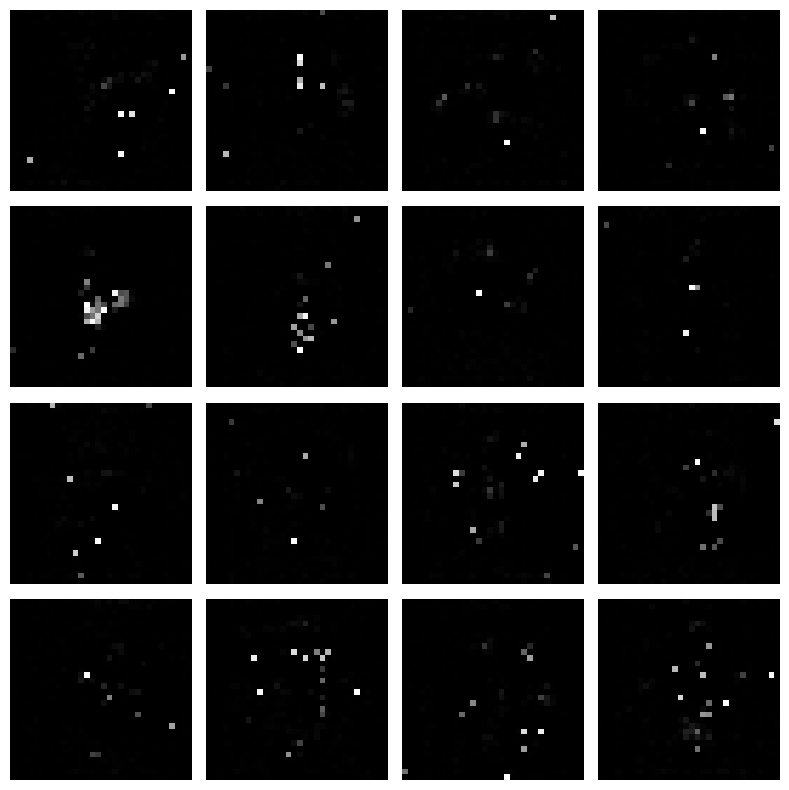

100%|██████████| 2000/2000 [10:35:58<00:00, 19.08s/it] 


In [3]:

for step in tqdm(range(init_step + 1, config.total_train_steps + 1)):
    print("Iteration:", step)

    #batch = fn_data_preprocess(next(train_ds))
    batch = next(train_ds)
    process_rng_key, step_key = jax.random.split(process_rng_key)
    process_step_rng_key = jax.random.fold_in(step_key, step)
    
    # for cpu: 
    # process_rng_key = jax.random.fold_in(process_rng_key, step)
    #step_rng_keys = process_rng_key
    #step_rng_keys = utils.shard_prng_key(process_rng_key)
    
    state, aux = train_step_fn(state, process_step_rng_key, batch)

    #if step % config.log_every_steps == 0:
    #    aux = jax.device_get(flax.jax_utils.unreplicate(aux))
    #    aux["train/lr"] = lr_schedule(step)
    if (step) % config.checkpoint_freq == 0 or step == config.total_train_steps:
        bookkeeping.save_model(config.save_dir, state, step)
    
    if step % config.sample_freq == 0 or step == config.total_train_steps:
        sample_key, sub_sample_key = jax.random.split(sample_key)
        process_sample_rng_key = jax.random.fold_in(sub_sample_key, step)
        
        samples = model.sample_loop(state, process_sample_rng_key, n_samples, conditioner=None)
        #  samples = utils.all_gather(samples)
        samples = jnp.reshape(samples, (n_samples, config.image_size, config.image_size, 1))
        saving_plot_path = os.path.join(config.sample_plot_path, f"samples_epoch_{step}.png")
        datasets_utils.plot_mnist_batch(samples, saving_plot_path)
    
        
    

In [4]:
# config.image_size = 28
#saving_plot_path = os.path.join(config.sample_plot_path, f"samples_epoch_{0}.png")
#datasets_utils.plot_mnist_batch(jnp.reshape(next(train_ds), (64, config.image_size, config.image_size, 1)), saving_plot_path)
print("Finished!")

Finished!
